<a href="https://colab.research.google.com/github/chai-avi/hhh-h-h/blob/main/%5Bhabr_en%5D_Lingtrain_project_Creating_bilingual_parallel_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making parallel English-Russian edition of the book "To Kill a Mokingbird" by Harper Lee

This Colab is made by [@averkij](https://www.linkedin.com/in/averkieff/). It's part of the Lingtrain project the main aim of which is to help language learners around the world.

It is an open source project. You can take a part in it and find the code on ours [github page](https://github.com/averkij/lingtrain-aligner).

You can also support the project by making a donation [here](https://www.tinkoff.ru/collectmoney/crowd/averkiev.sergey7/wYn8f32996/).



![](https://habrastorage.org/webt/h8/yu/gb/h8yugbjrjwumeroz7ddtsgta7-s.png)

If you want to know more about models under the hood:

- [Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation](https://arxiv.org/abs/2004.09813)

- [Language-agnostic BERT Sentence Embedding](https://arxiv.org/abs/2007.01852)


## Preparing the texts

In [116]:
#@title Install

!pip install -U lingtrain-aligner==0.4.3
!pip install razdel dateparser sentence_transformers

In [117]:
import os

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper

## Input texts

Place your texts in the corresponding cells.

In [118]:
#@title First text

text1 = """
He was an old man who fished alone in a skiff in the Gulf Stream and he had gone eighty-four days now without taking a fish. In the first forty days a boy had been with him. But after forty days without a fish the boy’s parents had told him that the old man was now definitely and finally salao, which is the worst form of unlucky, and the boy had gone at their orders in another boat which caught three good fish the first week. It made the boy sad to see the old man come in each day with his skiff empty and he always went down to help him carry either the coiled lines or the gaff and harpoon and the sail that was furled around the mast. The sail was patched with flour sacks and, furled, it looked like the flag of permanent defeat.
The old man was thin and gaunt with deep wrinkles in the back of his neck. The brown blotches of the benevolent skin cancer the sun brings from its reflection on the tropic sea were on his cheeks. The blotches ran well down the sides of his face and his hands had the deep-creased scars from handling heavy fish on the cords. But none of these scars were fresh. They were as old as erosions in a fishless desert.
Everything about him was old except his eyes and they were the same color as the sea and were cheerful and undefeated.
“Santiago,” the boy said to him as they climbed the bank from where the skiff was hauled up. “I could go with you again. We’ve made some money.”
The old man had taught the boy to fish and the boy loved him.
“No,” the old man said. “You’re with a lucky boat. Stay with them.”
“But remember how you went eighty-seven days without fish and then we caught big ones every day for three weeks.”
“I remember,” the old man said. “I know you did not leave me because you doubted.”
“It was papa made me leave. I am a boy and I must obey him.”
“I know,” the old man said. “It is quite normal.” “He hasn’t much faith.”
“No,” the old man said. “But we have. Haven’t we.”
“Yes,” the boy said. “Can I offer you a beer on the Terrace and then we’ll take the stuff home.”
“Why not?” the old man said. “Between fishermen.”
They sat on the Terrace and many of the fishermen made fun of the old man and he was not angry. Others, of the older fishermen, looked at him and were sad. But they did not show it and they spoke politely about the current and the depths they had drifted their lines at and the steady good weather and of what they had seen. The successful fishermen of that day were already in and had butchered their marlin out and carried them laid full length across two planks, with two men staggering at the end of each plank, to the fish house where they waited for the ice truck to carry them to the market in Havana. Those who had caught sharks had taken them to the shark factory on the other side of the cove where they were hoisted on a block and tackle, their livers removed, their fins cut off and their hides skinned out and their flesh cut into strips for salting.
When the wind was in the east a smell came across the harbour from the shark factory; but today there was only the faint edge of the odour because the wind had backed into the north and then dropped off and it was pleasant and sunny on the Terrace.
“Santiago,” the boy said.
“Yes,” the old man said. He was holding his glass and thinking of many years ago.
“Can I go out to get sardines for you for tomorrow?”
“No. Go and play baseball. I can still row and Rogelio will throw the net.”
“I would like to go. If I cannot fish with you, I would like to serve in some way.”
“You bought me a beer,” the old man said. “You are already a man.”
“How old was I when you first took me in a boat?”
“Five and you nearly were killed when I brought the fish in too green and he nearly tore the boat to pieces. Can you remember?”
“I can remember the tail slapping and banging and the thwart breaking and the noise of the clubbing. I can remember you throwing me into the bow where the wet coiled lines were and feeling the whole boat shiver and the noise of you clubbing him like chopping a tree down and the sweet blood smell all over me.”
“Can you really remember that or did I just tell it to you?”
“I remember everything from when we first went together.”
The old man looked at him with his sun-burned, confident loving eyes.
“If you were my boy I’d take you out and gamble,” he said. “But you are your father’s and your mother’s and you are in a lucky boat.”
“May I get the sardines? I know where I can get four baits too.”
“I have mine left from today. I put them in salt in the box.”
“Let me get four fresh ones.”
“One,” the old man said. His hope and his confidence had never gone. But now they were freshening as when the breeze rises.
“Two,” the boy said.
“Two,” the old man agreed. “You didn’t steal them?”
“I would,” the boy said. “But I bought these
“Thank you,” the old man said. He was too simple to wonder when he had attained humility. But he knew he had attained it and he knew it was not disgraceful and it carried no loss of true pride.
“Tomorrow is going to be a good day with this current,” he said.
“Where are you going?” the boy asked.
“Far out to come in when the wind shifts. I want to be out before it is light.”
“I’ll try to get him to work far out,” the boy said. “Then if you hook something truly big we can come to your aid.”
“He does not like to work too far out.”
“No,” the boy said. “But I will see something that he cannot see such as a bird working and get him to come out after dolphin.”
“Are his eyes that bad?”
“He is almost blind.”
“It is strange,” the old man said. “He never went turtle-ing. That is what kills the eyes.”
“But you went turtle-ing for years off the Mosquito Coast and your eyes are good.”
“I am a strange old man.”
“But are you strong enough now for a truly big fish?”
“I think so. And there are many tricks.”
“Let us take the stuff home,” the boy said. “So I can get the cast net and go after the sardines.”
They picked up the gear from the boat. The old man carried the mast on his shoulder and the boy carried the wooden box; with the coiled, hard-braided brown lines, the gaff and the harpoon with its shaft. The box with the baits was under the stern of the skiff along with the club that was used to subdue the big fish when they were brought alongside. No one would steal from the old man but it was better to take the sail and the heavy lines home as the dew was bad for them and, though he was quite sure no local people would steal from him, the old man thought that a gaff and a harpoon were needless temptations to leave in a boat.
They walked up the road together to the old man’s shack and went in through its open door. The old man leaned the mast with its wrapped sail against the wall and the boy put the box and the other gear beside it. The mast was nearly as long as the one room of the shack. The shack was made of the tough budshields of the royal palm which are called guano and in it there was a bed, a table, one chair, and a place on the dirt floor to cook with charcoal. On the brown walls of the flattened, overlapping leaves of the sturdy fibered guano there was a picture in color of the Sacred Heart of Jesus and another of the Virgin of Cobre. These were relics of his wife. Once there had been a tinted photograph of his wife on the wall but he had taken it down because it made him too lonely to see it and it was on the shelf in the corner under his clean shirt.
“What do you have to eat?” the boy asked.
“A pot of yellow rice with fish. Do you want some?”
“No. I will eat at home. Do you want me to make the fire?”
“No. I will make it later on. Or I may eat the rice cold.”
“May I take the cast net?”
“Of course.”
There was no cast net and the boy remembered when they had sold it. But they went through this fiction every day. There was no pot of yellow rice and fish and the boy knew this too.
“Eighty-five is a lucky number,” the old man said. “How would you like to see me bring one in that dressed out over a thousand pounds?”
“I’ll get the cast net and go for sardines. Will you sit in the sun in the doorway?”
“Yes. I have yesterday’s paper and I will read the baseball.”
The boy did not know whether yesterday’s paper was a fiction too. But the old man brought it out from under the bed.
“Perico gave it to me at the bodega,” he explained.
“I’ll be back when I have the sardines. I’ll keep yours and mine together on ice and we can share them in the morning. When I come back you can tell me about the baseball.”
“The Yankees cannot lose.”
“But I fear the Indians of Cleveland.”
“Have faith in the Yankees my son. Think of the great DiMaggio.”
“I fear both the Tigers of Detroit and the Indians of Cleveland.”
“Be careful or you will fear even the Reds of Cincinnati and the White Sox of Chicago.”
“You study it and tell me when I come back.”
“Do you think we should buy a terminal of the lottery with an eighty-five? Tomorrow is the eighty-fifth day.”
“We can do that,” the boy said. “But what about the eighty-seven of your great record?”
“It could not happen twice. Do you think you can find an eighty-five?”
“I can order one.”
“One sheet. That’s two dollars and a half. Who can we borrow that from?”
“That’s easy. I can always borrow two dollars and a half.”
“I think perhaps I can too. But I try not to borrow. First you borrow. Then you beg.”
“Keep warm old man,” the boy said. “Remember we are in September.”
“The month when the great fish come,” the old man said. “Anyone can be fisherman in May.”
“I go now for the sardines,” the boy said.
When the boy came back the old man was asleep in the chair and the sun was down. The boy took the old army blanket off the bed and spread it over the back of the chair and over the old man’s shoulders. They were strange shoulders, still powerful although very old, and the neck was still strong too and the creases did not show so much when the old man was asleep and his head fallen forward. His shirt had been patched so many times that it was like the sail and the patches were faded to many different shades by the sun. The old man’s head was very old though and with his eyes closed there was no life in his face. The newspaper lay across his knees and the weight of his arm held it there in the evening breeze. He was barefooted.
The boy left him there and when he came back the old man was still asleep.
“Wake up old man,” the boy said and put his hand on one of the old man’s knees.
The old man opened his eyes and for a moment he was coming back from a long way away. Then he smiled.
“What have you got?” he asked.
“Supper,” said the boy. “We’re going to have supper.”
“I’m not very hungry.”
“Come on and eat. You can’t fish and not eat.”
“I have,” the old man said getting up and taking the newspaper and folding it. Then he started to fold the blanket.
“Keep the blanket around you,” the boy said. “You’ll not fish without eating while I’m alive.”
“Then live a long time and take care of yourself,” the old man said. “What are we eating?”
“Black beans and rice, fried bananas, and some stew.”
The boy had brought them in a two-decker metal container from the Terrace. The two sets of knives and forks and spoons were in his pocket with a paper napkin wrapped around each set.
“Who gave this to you?”
“Martin. The owner.”
“I must thank him.”
“I thanked him already,” the boy said. “You don’t need to thank him.”
“I’ll give him the belly meat of a big fish,” the old man said. “Has he done this for us more than once?”
“I think so.”
“I must give him something more than the belly meat then. He is very thoughtful for us.”
“He sent two beers.”
“I like the beer in cans best.”
“I know. But this is in bottles, Hatuey beer, and I take back the bottles.”
“That’s very kind of you,” the old man said. “Should we eat?”
“I’ve been asking you to,” the boy told him gently. “I have not wished to open the container until you were ready.”
“I’m ready now,” the old man said. “I only needed time to wash.”
Where did you wash? the boy thought. The village water supply was two streets down the road. I must have water here for him, the boy thought, and soap and a good towel. Why am I so thoughtless? I must get him another shirt and a jacket for the winter and some sort of shoes and another blanket.
“Your stew is excellent,” the old man said.
“Tell me about the baseball,” the boy asked him.
“In the American League it is the Yankees as I said,” the old man said happily.
“They lost today,” the boy told him.
“That means nothing. The great DiMaggio is himself again.”
“They have other men on the team.”
“Naturally. But he makes the difference. In the other league, between Brooklyn and Philadelphia I must take Brooklyn. But then I think of Dick Sisler and those great drives in the old park.”
“There was nothing ever like them. He hits the longest ball I have ever seen.”
“Do you remember when he used to come to the Terrace? I wanted to take him fishing but I was too timid to ask him. Then I asked you to ask him and you were too timid.”
“I know. It was a great mistake. He might have gone with us. Then we would have that for all of our lives.”
“I would like to take the great DiMaggio fishing,” the old man said. “They say his father was a fisherman. Maybe he was as poor as we are and would understand.”
“The great Sisler’s father was never poor and he, the father, was playing in the Big Leagues when he was my age.”
“When I was your age I was before the mast on a square rigged ship that ran to Africa and I have seen lions on the beaches in the evening.”
“I know. You told me.”
“Should we talk about Africa or about baseball?”
“Baseball I think,” the boy said. “Tell me about the great John J. McGraw.” He said Jota for J.
“He used to come to the Terrace sometimes too in the older days. But he was rough and harsh-spoken and difficult when he was drinking. His mind was on horses as well as baseball. At least he carried lists of horses at all times in his pocket and frequently spoke the names of horses on the telephone.”
“He was a great manager,” the boy said. “My father thinks he was the greatest.”
“Because he came here the most times,” the old man said. “If Durocher had continued to come here each year your father would think him the greatest manager.”
“Who is the greatest manager, really, Luque or Mike Gonzalez?”
“I think they are equal.”
“And the best fisherman is you.”
“No. I know others better.”
“Que va,” the boy said. “There are many good fishermen and some great ones. But there is only you.”
“Thank you. You make me happy. I hope no fish will come along so great that he will prove us wrong.”
“There is no such fish if you are still strong as you say.”
“I may not be as strong as I think,” the old man said. “But I know many tricks and I have resolution.”
“You ought to go to bed now so that you will be fresh in the morning. I will take the things back to the Terrace.”
“Good night then. I will wake you in the morning.” “You’re my alarm clock,” the boy said.
“Age is my alarm clock,” the old man said. “Why do old men wake so early? Is it to have one longer day?”
“I don’t know,” the boy said. “All I know is that young boys sleep late and hard.”
“I can remember it,” the old man said. “I’ll waken you in time.”
“I do not like for him to waken me. It is as though I were inferior.”
“I know.”
“Sleep well old man.”
The boy went out. They had eaten with no light on the table and the old man took off his trousers and went to bed in the dark. He rolled his trousers up to make a pillow, putting the newspaper inside them. He rolled himself in the blanket and slept on the other old newspapers that covered the springs of the bed.
He was asleep in a short time and he dreamed of Africa when he was a boy and the long golden beaches and the white beaches, so white they hurt your eyes, and the high capes and the great brown mountains. He lived along that coast now every night and in his dreams he heard the surf roar and saw the native boats come riding through it. He smelled the tar and oakum of the deck as he slept and he smelled the smell of Africa that the land breeze brought at morning.
Usually when he smelled the land breeze he woke up and dressed to go and wake the boy. But tonight the smell of the land breeze came very early and he knew it was too early in his dream and went on dreaming to see the white peaks of the Islands rising from the sea and then he dreamed of the different harbours and roadsteads of the Canary Islands.
He no longer dreamed of storms, nor of women, nor of great occurrences, nor of great fish, nor fights, nor contests of strength, nor of his wife. He only dreamed of places now and of the lions on the beach. They played like young cats in the dusk and he loved them as he loved the boy. He never dreamed about the boy. He simply woke, looked out the open door at the moon and unrolled his trousers and put them on. He urinated outside the shack and then went up the road to wake the boy. He was shivering with the morning cold. But he knew he would shiver himself warm and that soon he would be rowing.
The door of the house where the boy lived was unlocked and he opened it and walked in quietly with his bare feet. The boy was asleep on a cot in the first room and the old man could see him clearly with the light that came in from the dying moon. He took hold of one foot gently and held it until the boy woke and turned and looked at him. The old man nodded and the boy took his trousers from the chair by the bed and, sitting on the bed, pulled them on.
The old man went out the door and the boy came after him. He was sleepy and the old man put his arm across his shoulders and said, “I am sorry.”
“Que va,” the boy said. “It is what a man must do.”
They walked down the road to the old man’s shack and all along the road, in the dark, barefoot men were moving, carrying the masts of their boats.
When they reached the old man’s shack the boy took the rolls of line in the basket and the harpoon and gaff and the old man carried the mast with the furled sail on his shoulder.
“Do you want coffee?” the boy asked.
“We’ll put the gear in the boat and then get some.” They had coffee from condensed milk cans at an early morning place that served fishermen.
“How did you sleep old man?” the boy asked. He was waking up now although it was still hard for him to leave his sleep.
“Very well, Manolin,” the old man said. “I feel confident today.”
“So do I,” the boy said. “Now I must get your sardines and mine and your fresh baits. He brings our gear himself. He never wants anyone to carry anything.”
“We’re different,” the old man said. “I let you carry things when you were five years old.”
“I know it,” the boy said. “I’ll be right back. Have another coffee. We have credit here.”
He walked off, bare-footed on the coral rocks, to the ice house where the baits were stored.
The old man drank his coffee slowly. It was all he would have all day and he knew that he should take it. For a long time now eating had bored him and he never carried a lunch. He had a bottle of water in the bow of the skiff and that was all he needed for the day.
The boy was back now with the sardines and the two baits wrapped in a newspaper and they went down the trail to the skiff, feeling the pebbled sand under their feet, and lifted the skiff and slid her into the water.
“Good luck old man.”
“Good luck,” the old man said. He fitted the rope lashings of the oars onto the thole pins and, leaning forward against the thrust of the blades in the water, he began to row out of the harbour in the dark. There were other boats from the other beaches going out to sea and the old man heard the dip and push of their oars even though he could not see them now the moon was below the hills.
Sometimes someone would speak in a boat. But most of the boats were silent except for the dip of the oars. They spread apart after they were out of the mouth of the harbour and each one headed for the part of the ocean where he hoped to find fish. The old man knew he was going far out and he left the smell of the land behind and rowed out into the clean early morning smell of the ocean. He saw the phosphorescence of the Gulf weed in the water as he rowed over the part of the ocean that the fishermen called the great well because there was a sudden deep of seven hundred fathoms where all sorts of fish congregated because of the swirl the current made against the steep walls of the floor of the ocean. Here there were concentrations of shrimp and bait fish and sometimes schools of squid in the deepest holes and these rose close to the surface at night where all the wandering fish fed on them.
In the dark the old man could feel the morning coming and as he rowed he heard the trembling sound as flying fish left the water and the hissing that their stiff set wings made as they soared away in the darkness. He was very fond of flying fish as they were his principal friends on the ocean. He was sorry for the birds, especially the small delicate dark terns that were always flying and looking and almost never finding, and he thought, the birds have a harder life than we do except for the robber birds and the heavy strong ones. Why did they make birds so delicate and fine as those sea swallows when the ocean can be so cruel? She is kind and very beautiful. But she can be so cruel and it comes so suddenly and such birds that fly, dipping and hunting, with their small sad voices are made too delicately for the sea.
He always thought of the sea as la mar which is what people call her in Spanish when they love her. Sometimes those who love her say bad things of her but they are always said as though she were a woman. Some of the younger fishermen, those who used buoys as floats for their lines and had motorboats, bought when the shark livers had brought much money, spoke of her as el mar which is masculine. They spoke of her as a contestant or a place or even an enemy. But the old man always thought of her as feminine and as something that gave or withheld great favours, and if she did wild or wicked things it was because she could not help them. The moon affects her as it does a woman, he thought.
He was rowing steadily and it was no effort for him since he kept well within his speed and the surface of the ocean was flat except for the occasional swirls of the current. He was letting the current do a third of the work and as it started to be light he saw he was already further out than he had hoped to be at this hour.
I worked the deep wells for a week and did nothing, he thought. Today I’ll work out where the schools of bonito and albacore are and maybe there will be a big one with them.
Before it was really light he had his baits out and was drifting with the current. One bait was down forty fathoms. The second was at seventy-five and the third and fourth were down in the blue water at one hundred and one hundred and twenty-five fathoms. Each bait hung head down with the shank of the hook inside the bait fish, tied and sewed solid and all the projecting part of the hook, the curve and the point, was covered with fresh sardines. Each sardine was hooked through both eyes so that they made a half-garland on the projecting steel. There was no part of the hook that a great fish could feel which was not sweet smelling and good tasting.
The boy had given him two fresh small tunas, or albacores, which hung on the two deepest lines like plummets and, on the others, he had a big blue runner and a yellow jack that had been used before; but they were in good condition still and had the excellent sardines to give them scent and attractiveness. Each line, as thick around as a big pencil, was looped onto a green-sapped stick so that any pull or touch on the bait would make the stick dip and each line had two forty-fathom coils which could be made fast to the other spare coils so that, if it were necessary, a fish could take out over three hundred fathoms of line.
Now the man watched the dip of the three sticks over the side of the skiff and rowed gently to keep the lines straight up and down and at their proper depths. It was quite light and any moment now the sun would rise.
The sun rose thinly from the sea and the old man could see the other boats, low on the water and well in toward the shore, spread out across the current. Then the sun was brighter and the glare came on the water and then, as it rose clear, the flat sea sent it back at his eyes so that it hurt sharply and he rowed without looking into it. He looked down into the water and watched the lines that went straight down into the dark of the water. He kept them straighter than anyone did, so that at each level in the darkness of the stream there would be a bait waiting exactly where he wished it to be for any fish that swam there. Others let them drift with the current and sometimes they were at sixty fathoms when the fishermen thought they were at a hundred.
But, he thought, I keep them with precision. Only I have no luck any more. But who knows? Maybe today. Every day is a new day. It is better to be lucky. But I would rather be exact. Then when luck comes you are ready.
The sun was two hours higher now and it did not hurt his eyes so much to look into the east. There were only three boats in sight now and they showed very low and far inshore.
All my life the early sun has hurt my eyes, he thought. Yet they are still good. In the evening I can look straight into it without getting the blackness. It has more force in the evening too. But in the morning it is painful.
Just then he saw a man-of-war bird with his long black wings circling in the sky ahead of him. He made a quick drop, slanting down on his back-swept wings, and then circled again.
“He’s got something,” the old man said aloud. “He’s not just looking.”
He rowed slowly and steadily toward where the bird was circling. He did not hurry and he kept his lines straight up and down. But he crowded the current a little so that he was still fishing correctly though faster than he would have fished if he was not trying to use the bird.
The bird went higher in the air and circled again, his wings motionless. Then he dove suddenly and the old man saw flying fish spurt out of the water and sail desperately over the surface.
“Dolphin,” the old man said aloud. “Big dolphin.”
He shipped his oars and brought a small line from under the bow. It had a wire leader and a medium-sized hook and he baited it with one of the sardines. He let it go over the side and then made it fast to a ring bolt in the stern. Then he baited another line and left it coiled in the shade of the bow. He went back to rowing and to watching the long-winged black bird who was working, now, low over the water.
As he watched the bird dipped again slanting his wings for the dive and then swinging them wildly and ineffectually as he followed the flying fish. The old man could see the slight bulge in the water that the big dolphin raised as they followed the escaping fish. The dolphin were cutting through the water below the Bight of the fish and would be in the water, driving at speed, when the fish dropped. It is a big school of dolphin, he thought. They are widespread and the flying fish have little chance. The bird has no chance. The flying fish are too big for him and they go too fast.
He watched the flying fish burst out again and again and the ineffectual movements of the bird. That school has gotten away from me, he thought. They are moving out too fast and too far. But perhaps I will pick up a stray and perhaps my big fish is around them. My big fish must be somewhere.
The clouds over the land now rose like mountains and the coast was only a long green line with the gray blue hills behind it. The water was a dark blue now, so dark that it was almost purple. As he looked down into it he saw the red sifting of the plankton in the dark water and the strange light the sun made now. He watched his lines to see them go straight down out of sight into the water and he was happy to see so much plankton because it meant fish. The strange light the sun made in the water, now that the sun was higher, meant good weather and so did the shape of the clouds over the land. But the bird was almost out of sight now and nothing showed on the surface of the water but some patches of yellow, sun-bleached Sargasso weed and the purple, formalized, iridescent, gelatinous bladder of a Portuguese man-of-war floating close beside the boat. It turned on its side and then righted itself. It floated cheerfully as a bubble with its long deadly purple filaments trailing a yard behind it in the water.
“Agua mala,” the old man said. “You whore.”
From where he swung lightly against his oars he looked down into the water and saw the tiny fish that were coloured like the trailing filaments and swam between them and under the small shade the bubble made as it drifted. They were immune to its poison. But men were not and when some of the filaments would catch on a line and rest there slimy and purple while the old man was working a fish, he would have welts and sores on his arms and hands of the sort that poison ivy or poison oak can give. But these poisonings from the agua mala came quickly and struck like a whiplash.
The iridescent bubbles were beautiful. But they were the falsest thing in the sea and the old man loved to see the big sea turtles eating them. The turtles saw them, approached them from the front, then shut their eyes so they were completely carapaced and ate them filaments and all. The old man loved to see the turtles eat them and he loved to walk on them on the beach after a storm and hear them pop when he stepped on them with the horny soles of his feet.
He loved green turtles and hawk-bills with their elegance and speed and their great value and he had a friendly contempt for the huge, stupid loggerheads, yellow in their armour-plating, strange in their lovemaking, and happily eating the Portuguese men-of-war with their eyes shut.
He had no mysticism about turtles although he had gone in turtle boats for many years. He was sorry for them all, even the great trunk backs that were as long as the skiff and weighed a ton. Most people are heartless about turtles because a turtle’s heart will beat for hours after he has been cut up and butchered. But the old man thought, I have such a heart too and my feet and hands are like theirs. He ate the white eggs to give himself strength. He ate them all through May to be strong in September and October for the truly big fish.
He also drank a cup of shark liver oil each day from the big drum in the shack where many of the fishermen kept their gear. It was there for all fishermen who wanted it. Most fishermen hated the taste. But it was no worse than getting up at the hours that they rose and it was very good against all colds and grippes and it was good for the eyes.
Now the old man looked up and saw that the bird was circling again.
“He’s found fish,” he said aloud. No flying fish broke the surface and there was no scattering of bait fish. But as the old man watched, a small tuna rose in the air, turned and dropped head first into the water. The tuna shone silver in the sun and after he had dropped back into the water another and another rose and they were jumping in all directions, churning the water and leaping in long jumps after the bait. They were circling it and driving it.
If they don’t travel too fast I will get into them, the old man thought, and he watched the school working the water white and the bird now dropping and dipping into the bait fish that were forced to the surface in their panic.
“The bird is a great help,” the old man said. Just then the stern line came taut under his foot, where he had kept a loop of the line, and he dropped his oars and felt the weight of the small tuna’s shivering pull as he held the line firm and commenced to haul it in. The shivering increased as he pulled in and he could see the blue back of the fish in the water and the gold of his sides before he swung him over the side and into the boat. He lay in the stern in the sun, compact and bullet shaped, his big, unintelligent eyes staring as he thumped his life out against the planking of the boat with the quick shivering strokes of his neat, fast-moving tail. The old man hit him on the head for kindness and kicked him, his body still shuddering, under the shade of the stern.
“Albacore,” he said aloud. “He’ll make a beautiful bait. He’ll weigh ten pounds.”
He did not remember when he had first started to talk aloud when he was by himself. He had sung when he was by himself in the old days and he had sung at night sometimes when he was alone steering on his watch in the smacks or in the turtle boats. He had probably started to talk aloud, when alone, when the boy had left. But he did not remember. When he and the boy fished together they usually spoke only when it was necessary. They talked at night or when they were storm-bound by bad weather. It was considered a virtue not to talk unnecessarily at sea and the old man had always considered it so and respected it. But now he said his thoughts aloud many times since there was no one that they could annoy.
“If the others heard me talking out loud they would think that I am crazy,” he said aloud. “But since I am not crazy, I do not care. And the rich have radios to talk to them in their boats and to bring them the baseball.”
Now is no time to think of baseball, he thought.
Now is the time to think of only one thing. That which I was born for. There might be a big one around that school, he thought. I picked up only a straggler from the albacore that were feeding. But they are working far out and fast. Everything that shows on the surface today travels very fast and to the north-east. Can that be the time of day? Or is it some sign of weather that I do not know?
He could not see the green of the shore now but only the tops of the blue hills that showed white as though they were snow-capped and the clouds that looked like high snow mountains above them. The sea was very dark and the light made prisms in the water. The myriad flecks of the plankton were annulled now by the high sun and it was only the great deep prisms in the blue water that the old man saw now with his lines going straight down into the water that was a mile deep.
The tuna, the fishermen called all the fish of that species tuna and only distinguished among them by their proper names when they came to sell them or to trade them for baits, were down again. The sun was hot now and the old man felt it on the back of his neck and felt the sweat trickle down his back as he rowed.
I could just drift, he thought, and sleep and put a bight of line around my toe to wake me. But today is eighty-five days and I should fish the day well.
Just then, watching his lines, he saw one of the projecting green sticks dip sharply.
“Yes,” he said. “Yes,” and shipped his oars without bumping the boat. He reached out for the line and held it softly between the thumb and forefinger of his right hand. He felt no strain nor weight and he held the line lightly. Then it came again. This time it was a tentative pull, not solid nor heavy, and he knew exactly what it was. One hundred fathoms down a marlin was eating the sardines that covered the point and the shank of the hook where the hand-forged hook projected from the head of the small tuna.
The old man held the line delicately, and softly, with his left hand, unleashed it from the stick. Now he could let it run through his fingers without the fish feeling any tension.
This far out, he must be huge in this month, he thought. Eat them, fish. Eat them. Please eat them. How fresh they are and you down there six hundred feet in that cold water in the dark. Make another turn in the dark and come back and eat them.
He felt the light delicate pulling and then a harder pull when a sardine’s head must have been more difficult to break from the hook. Then there was nothing.
“Come on,” the old man said aloud. “Make another turn. Just smell them. Aren’t they lovely? Eat them good now and then there is the tuna. Hard and cold and lovely. Don’t be shy, fish. Eat them.”
He waited with the line between his thumb and his finger, watching it and the other lines at the same time for the fish might have swum up or down. Then came the same delicate pulling touch again.
“He’ll take it,” the old man said aloud. “God help him to take it.”
He did not take it though. He was gone and the old man felt nothing.
“He can’t have gone,” he said. “Christ knows he can’t have gone. He’s making a turn. Maybe he has been hooked before and he remembers something of it.”
Then he felt the gentle touch on the line and he was happy.
“It was only his turn,” he said. “He’ll take it.”
He was happy feeling the gentle pulling and then he felt something hard and unbelievably heavy. It was the weight of the fish and he let the line slip down, down, down, unrolling off the first of the two reserve coils. As it went down, slipping lightly through the old man’s fingers, he still could feel the great weight, though the pressure of his thumb and finger were almost imperceptible.
“What a fish,” he said. “He has it sideways in his mouth now and he is moving off with it.”
Then he will turn and swallow it, he thought. He did not say that because he knew that if you said a good thing it might not happen. He knew what a huge fish this was and he thought of him moving away in the darkness with the tuna held crosswise in his mouth. At that moment he felt him stop moving but the weight was still there. Then the weight increased and he gave more line. He tightened the pressure of his thumb and finger for a moment and the weight increased and was going straight down.
“He’s taken it,” he said. “Now I’ll let him eat it well.”
He let the line slip through his fingers while he reached down with his left hand and made fast the free end of the two reserve coils to the loop of the two reserve coils of the next line. Now he was ready. He had three forty-fathom coils of line in reserve now, as well as the coil he was using.
“Eat it a little more,” he said. “Eat it well.”
Eat it so that the point of the hook goes into your heart and kills you, he thought. Come up easy and let me put the harpoon into you. All right. Are you ready? Have you been long enough at table?
“Now!” he said aloud and struck hard with both hands, gained a yard of line and then struck again and again, swinging with each arm alternately on the cord with all the strength of his arms and the pivoted weight of his body.
Nothing happened. The fish just moved away slowly and the old man could not raise him an inch. His line was strong and made for heavy fish and he held it against his back until it was so taut that beads of water were jumping from it. Then it began to make a slow hissing sound in the water and he still held it, bracing himself against the thwart and leaning back against the pull. The boat began to move slowly off toward the north-west.
The fish moved steadily and they travelled slowly on the calm water. The other baits were still in the water but there was nothing to be done.
“I wish I had the boy,” the old man said aloud. “I’m being towed by a fish and I’m the towing bitt. I could make the line fast. But then he could break it. I must hold him all I can and give him line when he must have it. Thank God he is travelling and not going down.”
What I will do if he decides to go down, I don’t know. What I’ll do if he sounds and dies I don’t know. But I’ll do something. There are plenty of things I can do.
He held the line against his back and watched its slant in the water and the skiff moving steadily to the north-west.
This will kill him, the old man thought. He can’t do this forever. But four hours later the fish was still swimming steadily out to sea, towing the skiff, and the old man was still braced solidly with the line across his back.
“It was noon when I hooked him,” he said. “And I have never seen him.”
He had pushed his straw hat hard down on his head before he hooked the fish and it was cutting his forehead. He was thirsty too and he got down on his knees and, being careful not to jerk on the line, moved as far into the bow as he could get and reached the water bottle with one hand. He opened it and drank a little. Then he rested against the bow. He rested sitting on the un-stepped mast and sail and tried not to think but only to endure.
Then he looked behind him and saw that no land was visible. That makes no difference, he thought. I can always come in on the glow from Havana. There are two more hours before the sun sets and maybe he will come up before that. If he doesn’t maybe he will come up with the moon. If he does not do that maybe he will come up with the sunrise. I have no cramps and I feel strong. It is he that has the hook in his mouth. But what a fish to pull like that. He must have his mouth shut tight on the wire. I wish I could see him. I wish I could see him only once to know what I have against me.
The fish never changed his course nor his direction all that night as far as the man could tell from watching the stars. It was cold after the sun went down and the old man’s sweat dried cold on his back and his arms and his old legs. During the day he had taken the sack that covered the bait box and spread it in the sun to dry. After the sun went down he tied it around his neck so that it hung down over his back and he cautiously worked it down under the line that was across his shoulders now. The sack cushioned the line and he had found a way of leaning forward against the bow so that he was almost comfortable. The position actually was only somewhat less intolerable; but he thought of it as almost comfortable.
I can do nothing with him and he can do nothing with me, he thought. Not as long as he keeps this up.
Once he stood up and urinated over the side of the skiff and looked at the stars and checked his course. The line showed like a phosphorescent streak in the water straight out from his shoulders. They were moving more slowly now and the glow of Havana was not so strong, so that he knew the current must be carrying them to the eastward. If I lose the glare of Havana we must be going more to the eastward, he thought. For if the fish’s course held true I must see it for many more hours. I wonder how the baseball came out in the grand leagues today, he thought. It would be wonderful to do this with a radio. Then he thought, think of it always. Think of what you are doing. You must do nothing stupid.
Then he said aloud, “I wish I had the boy. To help me and to see this.”
No one should be alone in their old age, he thought. But it is unavoidable. I must remember to eat the tuna before he spoils in order to keep strong. Remember, no matter how little you want to, that you must eat him in the morning. Remember, he said to himself.
During the night two porpoises came around the boat and he could hear them rolling and blowing. He could tell the difference between the blowing noise the male made and the sighing blow of the female.
“They are good,” he said. “They play and make jokes and love one another. They are our brothers like the flying fish.”
Then he began to pity the great fish that he had hooked. He is wonderful and strange and who knows how old he is, he thought. Never have I had such a strong fish nor one who acted so strangely. Perhaps he is too wise to jump. He could ruin me by jumping or by a wild rush. But perhaps he has been hooked many times before and he knows that this is how he should make his fight. He cannot know that it is only one man against him, nor that it is an old man. But what a great fish he is and what will he bring in the market if the flesh is good. He took the bait like a male and he pulls like a male and his fight has no panic in it. I wonder if he has any plans or if he is just as desperate as I am?
He remembered the time he had hooked one of a pair of marlin. The male fish always let the female fish feed first and the hooked fish, the female, made a wild, panic-stricken, despairing fight that soon exhausted her, and all the time the male had stayed with her, crossing the line and circling with her on the surface. He had stayed so close that the old man was afraid he would cut the line with his tail which was sharp as a scythe and almost of that size and shape. When the old man had gaffed her and clubbed her, holding the rapier bill with its sandpaper edge and clubbing her across the top of her head until her colour turned to a colour almost like the backing of mirrors, and then, with the boy’s aid, hoisted her aboard, the male fish had stayed by the side of the boat. Then, while the old man was clearing the lines and preparing the harpoon, the male fish jumped high into the air beside the boat to see where the female was and then went down deep, his lavender wings, that were his pectoral fins, spread wide and all his wide lavender stripes showing. He was beautiful, the old man remembered, and he had stayed.
That was the saddest thing I ever saw with them, the old man thought. The boy was sad too and we begged her pardon and butchered her promptly.
“I wish the boy was here,” he said aloud and settled himself against the rounded planks of the bow and felt the strength of the great fish through the line he held across his shoulders moving steadily toward whatever he had chosen.
When once, through my treachery, it had been necessary to him to make a choice, the old man thought.
His choice had been to stay in the deep dark water far out beyond all snares and traps and treacheries. My choice was to go there to find him beyond all people. Beyond all people in the world. Now we are joined together and have been since noon. And no one to help either one of us.
Perhaps I should not have been a fisherman, he thought. But that was the thing that I was born for. I must surely remember to eat the tuna after it gets light.
Some time before daylight something took one of the baits that were behind him. He heard the stick break and the line begin to rush out over the gunwale of the skiff. In the darkness he loosened his sheath knife and taking all the strain of the fish on his left shoulder he leaned back and cut the line against the wood of the gunwale. Then he cut the other line closest to him and in the dark made the loose ends of the reserve coils fast. He worked skillfully with the one hand and put his foot on the coils to hold them as he drew his knots tight. Now he had six reserve coils of line. There were two from each bait he had severed and the two from the bait the fish had taken and they were all connected.
After it is light, he thought, I will work back to the forty-fathom bait and cut it away too and link up the reserve coils. I will have lost two hundred fathoms of good Catalan cardel and the hooks and leaders. That can be replaced. But who replaces this fish if I hook some fish and it cuts him off? I don’t know what that fish was that took the bait just now. It could have been a marlin or a broadbill or a shark. I never felt him. I had to get rid of him too fast.
Aloud he said, “I wish I had the boy.”
But you haven’t got the boy, he thought. You have only yourself and you had better work back to the last line now, in the dark or not in the dark, and cut it away and hook up the two reserve coils.
So he did it. It was difficult in the dark and once the fish made a surge that pulled him down on his face and made a cut below his eye. The blood ran down his cheek a little way. But it coagulated and dried before it reached his chin and he worked his way back to the bow and rested against the wood. He adjusted the sack and carefully worked the line so that it came across a new part of his shoulders and, holding it anchored with his shoulders, he carefully felt the pull of the fish and then felt with his hand the progress of the skiff through the water.
I wonder what he made that lurch for, he thought. The wire must have slipped on the great hill of his back. Certainly his back cannot feel as badly as mine does. But he cannot pull this skiff forever, no matter how great he is. Now everything is cleared away that might make trouble and I have a big reserve of line; all that a man can ask.
“Fish,” he said softly, aloud, “I’ll stay with you until I am dead.”
He’ll stay with me too, I suppose, the old man thought and he waited for it to be light. It was cold now in the time before daylight and he pushed against the wood to be warm. I can do it as long as he can, he thought. And in the first light the line extended out and down into the water. The boat moved steadily and when the first edge of the sun rose it was on the old man’s right shoulder.
“He’s headed north,” the old man said. The current will have set us far to the eastward, he thought. I wish he would turn with the current. That would show that he was tiring.
When the sun had risen further the old man realized that the fish was not tiring. There was only one favorable sign. The slant of the line showed he was swimming at a lesser depth. That did not necessarily mean that he would jump. But he might.
“God let him jump,” the old man said. “I have enough line to handle him.”
Maybe if I can increase the tension just a little it will hurt him and he will jump, he thought. Now that it is daylight let him jump so that he’ll fill the sacks along his backbone with air and then he cannot go deep to die.
He tried to increase the tension, but the line had been taut up to the very edge of the breaking point since he had hooked the fish and he felt the harshness as he leaned back to pull and knew he could put no more strain on it. I must not jerk it ever, he thought. Each jerk widens the cut the hook makes and then when he does jump he might throw it. Anyway I feel better with the sun and for once I do not have to look into it.
There was yellow weed on the line but the old man knew that only made an added drag and he was pleased. It was the yellow Gulf weed that had made so much phosphorescence in the night.
“Fish,” he said, “I love you and respect you very much. But I will kill you dead before this day ends.”
Let us hope so, he thought.
A small bird came toward the skiff from the north. He was a warbler and flying very low over the water. The old man could see that he was very tired.
The bird made the stern of the boat and rested there. Then he flew around the old man’s head and rested on the line where he was more comfortable.
“How old are you?” the old man asked the bird. “Is this your first trip?”
The bird looked at him when he spoke. He was too tired even to examine the line and he teetered on it as his delicate feet gripped it fast.
“It’s steady,” the old man told him. “It’s too steady. You shouldn’t be that tired after a windless night. What are birds coming to?”
The hawks, he thought, that come out to sea to meet them. But he said nothing of this to the bird who could not understand him anyway and who would learn about the hawks soon enough.
“Take a good rest, small bird,” he said. “Then go in and take your chance like any man or bird or fish.”
It encouraged him to talk because his back had stiffened in the night and it hurt truly now.
“Stay at my house if you like, bird,” he said. “I am sorry I cannot hoist the sail and take you in with the small breeze that is rising. But I am with a friend.”
Just then the fish gave a sudden lurch that pulled the old man down onto the bow and would have pulled him overboard if he had not braced himself and given some line.
The bird had flown up when the line jerked and the old man had not even seen him go. He felt the line carefully with his right hand and noticed his hand was bleeding.
“Something hurt him then,” he said aloud and pulled back on the line to see if he could turn the fish. But when he was touching the breaking point he held steady and settled back against the strain of the line.
“You’re feeling it now, fish,” he said. “And so, God knows, am I.”
He looked around for the bird now because he would have liked him for company. The bird was gone.
You did not stay long, the man thought. But it is rougher where you are going until you make the shore. How did I let the fish cut me with that one quick pull he made? I must be getting very stupid. Or perhaps I was looking at the small bird and thinking of him. Now I will pay attention to my work and then I must eat the tuna so that I will not have a failure of strength.
“I wish the boy were here and that I had some salt,” he said aloud.
Shifting the weight of the line to his left shoulder and kneeling carefully he washed his hand in the ocean and held it there, submerged, for more than a minute watching the blood trail away and the steady movement of the water against his hand as the boat moved.
“He has slowed much,” he said.
The old man would have liked to keep his hand in the salt water longer but he was afraid of another sudden lurch by the fish and he stood up and braced himself and held his hand up against the sun. It was only a line burn that had cut his flesh. But it was in the working part of his hand. He knew he would need his hands before this was over and he did not like to be cut before it started.
“Now,” he said, when his hand had dried, “I must eat the small tuna. I can reach him with the gaff and eat him here in comfort.”
He knelt down and found the tuna under the stern with the gaff and drew it toward him keeping it clear of the coiled lines. Holding the line with his left shoulder again, and bracing on his left hand and arm, he took the tuna off the gaff hook and put the gaff back in place. He put one knee on the fish and cut strips of dark red meat longitudinally from the back of the head to the tail. They were wedge-shaped strips and he cut them from next to the back bone down to the edge of the belly. When he had cut six strips he spread them out on the wood of the bow, wiped his knife on his trousers, and lifted the carcass of the bonito by the tail and dropped it overboard.
“I don’t think I can eat an entire one,” he said and drew his knife across one of the strips. He could feel the steady hard pull of the line and his left hand was cramped. It drew up tight on the heavy cord and he looked at it in disgust.
“What kind of a hand is that,” he said. “Cramp then if you want. Make yourself into a claw. It will do you no good.”
Come on, he thought and looked down into the dark water at the slant of the line. Eat it now and it will strengthen the hand. It is not the hand’s fault and you have been many hours with the fish. But you can stay with him forever. Eat the bonito now.
He picked up a piece and put it in his mouth and chewed it slowly. It was not unpleasant.
Chew it well, he thought, and get all the juices. It would not be bad to eat with a little lime or with lemon or with salt.
“How do you feel, hand?” he asked the cramped hand that was almost as stiff as rigor mortis. “I’ll eat some more for you.”
He ate the other part of the piece that he had cut in two. He chewed it carefully and then spat out the skin.
“How does it go, hand? Or is it too early to know?” He took another full piece and chewed it.
“It is a strong full-blooded fish,” he thought. “I was lucky to get him instead of dolphin. Dolphin is too sweet. This is hardly sweet at all and all the strength is still in it.”
There is no sense in being anything but practical though, he thought. I wish I had some salt. And I do not know not know whether the sun will rot or dry what is left, so I had better eat it all although I am not hungry. The fish is calm and steady. I will eat it all and then I will be ready.
“Be patient, hand,” he said. “I do this for you.”
I wish I could feed the fish, he thought. He is my brother. But I must kill him and keep strong to do it. Slowly and conscientiously he ate all of the wedge-shaped strips of fish.
He straightened up, wiping his hand on his trousers. “Now,” he said. “You can let the cord go, hand, and I will handle him with the right arm alone until you stop that nonsense.” He put his left foot on the heavy line that the left hand had held and lay back against the pull against his back.
“God help me to have the cramp go,” he said. “Because I do not know what the fish is going to do.”
But he seems calm, he thought, and following his plan. But what is his plan, he thought. And what is mine? Mine I must improvise to his because of his great size. If he will jump I can kill him. But he stays down forever. Then I will stay down with him forever.
He rubbed the cramped hand against his trousers and tried to gentle the fingers. But it would not open. Maybe it will open with the sun, he thought. Maybe it will open when the strong raw tuna is digested. If I have to have it, I will open it, cost whatever it costs. But I do not want to open it now by force. Let it open by itself and come back of its own accord. After all I abused it much in the night when it was necessary to free and untie the various lines.
He looked across the sea and knew how alone he was now. But he could see the prisms in the deep dark water and the line stretching ahead and the strange undulation of the calm. The clouds were building up now for the trade wind and he looked ahead and saw a flight of wild ducks etching themselves against the sky over the water, then blurring, then etching again and he knew no man was ever alone on the sea.
He thought of how some men feared being out of sight of land in a small boat and knew they were right in the months of sudden bad weather. But now they were in hurricane months and, when there are no hurricanes, the weather of hurricane months is the best of all the year.
If there is a hurricane you always see the signs of it in the sky for days ahead, if you are at sea. They do not see it ashore because they do not know what to look for, he thought. The land must make a difference too, in the shape of the clouds. But we have no hurricane coming now.
He looked at the sky and saw the white cumulus built like friendly piles of ice cream and high above were the thin feathers of the cirrus against the high September sky.
“Light brisa,” he said. “Better weather for me than for you, fish.”
His left hand was still cramped, but he was unknotting it slowly.
I hate a cramp, he thought. It is a treachery of one’s own body. It is humiliating before others to have a diarrhoea from ptomaine poisoning or to vomit from it. But a cramp, he thought of it as a calambre, humiliates one- self especially when one is alone.
If the boy were here he could rub it for me and loosen it down from the forearm, he thought. But it will loosen up.
Then, with his right hand he felt the difference in the pull of the line before he saw the slant change in the water. Then, as he leaned against the line and slapped his left hand hard and fast against his thigh he saw the line slanting slowly upward.
“He’s coming up,” he said. “Come on hand. Please come on.”
The line rose slowly and steadily and then the surface of the ocean bulged ahead of the boat and the fish came out. He came out unendingly and water poured from his sides. He was bright in the sun and his head and back were dark purple and in the sun the stripes on his sides showed wide and a light lavender. His sword was as long as a baseball bat and tapered like a rapier and he rose his full length from the water and then re-entered it, smoothly, like a diver and the old man saw the great scythe-blade of his tail go under and the line commenced to race out.
“He is two feet longer than the skiff,” the old man said. The line was going out fast but steadily and the fish was not panicked. The old man was trying with both hands to keep the line just inside of breaking strength. He knew that if he could not slow the fish with a steady pressure the fish could take out all the line and break it.
He is a great fish and I must convince him, he thought. I must never let him learn his strength nor what he could do if he made his run. If I were him I would put in everything now and go until something broke. But, thank God, they are not as intelligent as we who kill them; although they are more noble and more able.
The old man had seen many great fish. He had seen many that weighed more than a thousand pounds and he had caught two of that size in his life, but never alone. Now alone, and out of sight of land, he was fast to the biggest fish that he had ever seen and bigger than he had ever heard of, and his left hand was still as tight as the gripped claws of an eagle.
It will uncramp though, he thought. Surely it will uncramp to help my right hand. There are three things that are brothers: the fish and my two hands. It must uncramp. It is unworthy of it to be cramped. The fish had slowed again and was going at his usual pace.
I wonder why he jumped, the old man thought. He jumped almost as though to show me how big he was. I know now, anyway, he thought. I wish I could show him what sort of man I am. But then he would see the cramped hand. Let him think I am more man than I am and I will be so. I wish I was the fish, he thought, with everything he has against only my will and my intelligence.
He settled comfortably against the wood and took his suffering as it came and the fish swam steadily and the boat moved slowly through the dark water. There was a small sea rising with the wind coming up from the east and at noon the old man’s left hand was uncramped.
“Bad news for you, fish,” he said and shifted the line over the sacks that covered his shoulders.
He was comfortable but suffering, although he did not admit the suffering at all.
“I am not religious,” he said. “But I will say ten Our Fathers and ten Hail Marys that I should catch this fish, and I promise to make a pilgrimage to the Virgin of Cobre if I catch him. That is a promise.”
He commenced to say his prayers mechanically. Sometimes he would be so tired that he could not remember the prayer and then he would say them fast so that they would come automatically. Hail Marys are easier to say than Our Fathers, he thought.
“Hail Mary full of Grace the Lord is with thee. Blessed art thou among women and blessed is the fruit of thy womb, Jesus. Holy Mary, Mother of God, pray for us sinners now and at the hour of our death. Amen.” Then he added, “Blessed Virgin, pray for the death of this fish. Wonderful though he is.”
With his prayers said, and feeling much better, but suffering exactly as much, and perhaps a little more, he leaned against the wood of the bow and began, mechanically, to work the fingers of his left hand.
The sun was hot now although the breeze was rising gently.
“I had better re-bait that little line out over the stern,” he said. “If the fish decides to stay another night I will need to eat again and the water is low in the bottle. I don’t think I can get anything but a dolphin here. But if I eat him fresh enough he won’t be bad. I wish a flying fish would come on board tonight. But I have no light to attract them. A flying fish is excellent to eat raw and I would not have to cut him up. I must save all my strength now. Christ, I did not know he was so big.”
“I’ll kill him though,” he said. “In all his greatness and his glory.”
Although it is unjust, he thought. But I will show him what a man can do and what a man endures.
“I told the boy I was a strange old man,” he said. “Now is when I must prove it.”
The thousand times that he had proved it meant nothing. Now he was proving it again. Each time was a new time and he never thought about the past when he was doing it.
I wish he’d sleep and I could sleep and dream about the lions, he thought. Why are the lions the main thing that is left? Don’t think, old man, he said to himself. Rest gently now against the wood and think of nothing. He is working. Work as little as you can.
It was getting into the afternoon and the boat still moved slowly and steadily. But there was an added drag now from the easterly breeze and the old man rode gently with the small sea and the hurt of the cord across his back came to him easily and smoothly.
Once in the afternoon the line started to rise again. But the fish only continued to swim at a slightly higher level. The sun was on the old man’s left arm and shoulder and on his back. So he knew the fish had turned east of north.
Now that he had seen him once, he could picture the fish swimming in the water with his purple pectoral fins set wide as wings and the great erect tail slicing through the dark. I wonder how much he sees at that depth, the old man thought. His eye is huge and a horse, with much less eye, can see in the dark. Once I could see quite well in the dark. Not in the absolute dark. But almost as a cat sees.
The sun and his steady movement of his fingers had uncramped his left hand now completely and he began to shift more of the strain to it and he shrugged the muscles of his back to shift the hurt of the cord a little.
“If you’re not tired, fish,” he said aloud, “you must be very strange.”
He felt very tired now and he knew the night would come soon and he tried to think of other things. He thought of the Big Leagues, to him they were the Gran Ligas, and he knew that the Yankees of New York were playing the Tigres of Detroit.
This is the second day now that I do not know the result of the juegoes he thought. But I must have confidence and I must be worthy of the great DiMaggio who does all things perfectly even with the pain of the bone spur in his heel. What is a bone spur? he asked himself. Un espuela de hueso. We do not have them. Can it be as painful as the spur of a fighting cock in one’s heel? I do not think I could endure that or the loss of the eye and of both eyes and continue to fight as the fighting cocks do. Man is not much beside the great birds and beasts. Still I would rather be that beast down there in the darkness of the sea.
“Unless sharks come,” he said aloud. “If sharks come, God pity him and me.”
Do you believe the great DiMaggio would stay with a fish as long as I will stay with this one? he thought. I am sure he would and more since he is young and strong. Also his father was a fisherman. But would the bone spur hurt him too much?
“I do not know,” he said aloud. “I never had a bone spur.”
As the sun set he remembered, to give himself more confidence, the time in the tavern at Casablanca when he had played the hand game with the great negro from Cienfuegos who was the strongest man on the docks. They had gone one day and one night with their elbows on a chalk line on the table and their forearms straight up and their hands gripped tight. Each one was trying to force the other’s hand down onto the table. There was much betting and people went in and out of the room under the kerosene lights and he had looked at the arm and hand of the negro and at the negro’s face. They changed the referees every four hours after the first eight so that the referees could sleep. Blood came out from under the fingernails of both his and the negro’s hands and they looked each other in the eye and at their hands and forearms and the bettors went in and out of the room and sat on high chairs against the wall and watched. The walls were painted bright blue and were of wood and the lamps threw their shadows against them. The negro’s shadow was huge and it moved on the wall as the breeze moved the lamps.
The odds would change back and forth all night and they fed the negro rum and lighted cigarettes for him. Then the negro, after the rum, would try for a tremendous effort and once he had the old man, who was not an old man then but was Santiago El Campeón, nearly three inches off balance. But the old man had raised his hand up to dead even again. He was sure then that he had the negro, who was a fine man and a great athlete, beaten. And at daylight when the bettors were asking that it be called a draw and the referee was shaking his head, he had unleashed his effort and forced the hand of the negro down and down until it rested on the wood. The match had started on a Sunday morning and ended on a Monday morning. Many of the bettors had asked for a draw because they had to go to work on the docks loading sacks of sugar or at the Havana Coal Company. Otherwise everyone would have wanted it to go to a finish. But he had finished it anyway and before anyone had to go to work.
For a long time after that everyone had called him The Champion and there had been a return match in the spring. But not much money was bet and he had won it quite easily since he had broken the confidence of the negro from Cienfuegos in the first match. After that he had a few matches and then no more. He decided that he could beat anyone if he wanted to badly enough and he decided that it was bad for his right hand for fishing. He had tried a few practice matches with his left hand. But his left hand had always been a traitor and would not do what he called on it to do and he did not trust it.
The sun will bake it out well now, he thought. It should not cramp on me again unless it gets too cold in the night. I wonder what this night will bring.
An airplane passed overhead on its course to Miami and he watched its shadow scaring up the schools of flying fish.
“With so much flying fish there should be dolphin,” he said, and leaned back on the line to see if it was possible to gain any on his fish. But he could not and it stayed at the hardness and water-drop shivering that preceded breaking. The boat moved ahead slowly and he watched the airplane until he could no longer see it.
It must be very strange in an airplane, he thought. I wonder what the sea looks like from that height? They should be able to see the fish well if they do not fly too high. I would like to fly very slowly at two hundred fathoms high and see the fish from above. In the turtle boats I was in the cross-trees of the mast-head and even at that height I saw much. The dolphin look greener from there and you can see their stripes and their purple spots and you can see all of the school as they swim. Why is it that all the fast-moving fish of the dark current have purple backs and usually purple stripes or spots? The dolphin looks green of course because he is really golden. But when he comes to feed, truly hungry, purple stripes show on his sides as on a marlin. Can it be anger, or the greater speed he makes that brings them out?
Just before it was dark, as they passed a great island of Sargasso weed that heaved and swung in the light sea as though the ocean were making love with something under a yellow blanket, his small line was taken by a dolphin. He saw it first when it jumped in the air true gold in the last of the sun and bending and flapping wildly in the air. It jumped again and again in the acrobatics of its fear and he worked his way back to the stern and crouching and holding the big line with his right hand and arm, he pulled the dolphin in with his left hand, stepping on the gained line each time with his bare left foot. When the fish was at the stern, plunging and cutting from side to side in desperation, the old man leaned over the stern and lifted the burnished gold fish with its purple spots over the stern. Its jaws were working convulsively in’ quick bites against the hook and it pounded the bottom of the skiff with its long flat body, its tail and its head until he clubbed it across the shining golden head until it shivered and was still.
The old man unhooked the fish, re-baited the line with another sardine and tossed it over. Then he worked his way slowly back to the bow. He washed his left hand and wiped it on his trousers. Then he shifted the heavy line from his right hand to his left and washed his right hand in the sea while he watched the sun go into the ocean and the slant of the big cord.
“He hasn’t changed at all,” he said. But watching the movement of the water against his hand he noted that it was perceptibly slower.
“I’ll lash the two oars, together across the stern and that will slow him in the night,” he said. “He’s good for the night and so am I.”
It would be better to gut the dolphin a little later to save the blood in the meat, he thought. I can do that a little later and lash the oars to make a drag at the same time. I had better keep the fish quiet now and not disturb him too much at sunset. The setting of the sun is a difficult time for all fish.
He let his hand dry in the air then grasped the line with it and eased himself as much as he could and allowed himself to be pulled forward against the wood so that the boat took the strain as much, or more, than he did.
I’m learning how to do it, he thought. This part of it anyway. Then too, remember he hasn’t eaten since he took the bait and he is huge and needs much food. I have eaten the whole bonito. Tomorrow I will eat the dolphin. He called it dorado. Perhaps I should eat some of it when I clean it. It will be harder to eat than the bonito. But, then, nothing is easy.
“How do you feel, fish?” he asked aloud. “I feel good and my left hand is better and I have food for a night and a day. Pull the boat, fish.”
He did not truly feel good because the pain from the cord across his back had almost passed pain and gone into a dullness that he mistrusted. But I have had worse things than that, he thought. My hand is only cut a little and the cramp is gone from the other. My legs are all right. Also now I have gained on him in the question of sustenance.
It was dark now as it becomes dark quickly after the sun sets in September. He lay against the worn wood of the bow and rested all that he could. The first stars were out. He did not know the name of Rigel but he saw it and knew soon they would all be out and he would have all his distant friends.
“The fish is my friend too,” he said aloud. “I have never seen or heard of such a fish. But I must kill him. I am glad we do not have to try to kill the stars.”
Imagine if each day a man must try to kill the moon, he thought. The moon runs away. But imagine if a man each day should have to try to kill the sun? We were born lucky, he thought.
Then he was sorry for the great fish that had nothing to eat and his determination to kill him never relaxed in his sorrow for him. How many people will he feed, he thought. But are they worthy to eat him? No, of course not. There is no one worthy of eating him from the manner of his behaviour and his great dignity.
I do not understand these things, he thought. But it is good that we do not have to try to kill the sun or the moon or the stars. It is enough to live on the sea and kill our true brothers.
Now, he thought, I must think about the drag. It has its perils and its merits. I may lose so much line that I will lose him, if he makes his effort and the drag made by the oars is in place and the boat loses all her lightness. Her lightness prolongs both our suffering but it is my safety since he has great speed that he has never yet employed. No matter what passes I must gut the dolphin so he does not spoil and eat some of him to be strong.
Now I will rest an hour more and feel that he is solid and steady before I move back to the stern to do the work and make the decision. In the meantime I can see how he acts and if he shows any changes. The oars are a good trick; but it has reached the time to play for safety. He is much fish still and I saw that the hook was in the corner of his mouth and he has kept his mouth tight shut. The punishment of the hook is nothing. The punishment of hunger, and that he is against something that he does not comprehend, is everything. Rest now, old man, and let him work until your next duty comes.
He rested for what he believed to be two hours. The moon did not rise now until late and he had no way of judging the time. Nor was he really resting except comparatively. He was still bearing the pull of the fish across his shoulders but he placed his left hand on the gunwale of the bow and confided more and more of the resistance to the fish to the skiff itself.
How simple it would be if I could make the line fast, he thought. But with one small lurch he could break it. I must cushion the pull of the line with my body and at all times be ready to give line with both hands.
“But you have not slept yet, old man,” he said aloud.
“It is half a day and a night and now another day and you have not slept. You must devise a way so that you sleep a little if he is quiet and steady. If you do not sleep you might become unclear in the head.”
I’m clear enough in the head, he thought. Too clear. I am as clear as the stars that are my brothers. Still I must sleep. They sleep and the moon and the sun sleep and even the ocean sleeps sometimes on certain days when there is no current and a flat calm.
But remember to sleep, he thought. Make yourself do it and devise some simple and sure way about the lines. Now go back and prepare the dolphin. It is too dangerous to rig the oars as a drag if you must sleep.
I could go without sleeping, he told himself. But it would be too dangerous.
He started to work his way back to the stern on his hands and knees, being careful not to jerk against the fish. He may be half asleep himself, he thought. But I do not want him to rest. He must pull until he dies.
Back in the stern he turned so that his left hand held the strain of the line across his shoulders and drew his knife from its sheath with his right hand. The stars were bright now and he saw the dolphin clearly and he pushed the blade of his knife into his head and drew him out from under the stern. He put one of his feet on the fish and slit him quickly from the vent up to the tip of his lower jaw. Then he put his knife down and gutted him with his right hand, scooping him clean and pulling the gills clear. He felt the maw heavy and slippery in his hands and he slit it open. There were two flying fish inside. They were fresh and hard and he laid them side by side and dropped the guts and the gills over the stern. They sank leaving a trail of phosphorescence in the water. The dolphin was cold and a leprous gray-white now in the starlight and the old man skinned one side of him while he held his right foot on the fish’s head. Then he turned him over and skinned the other side and cut each side off from the head down to the tail.
He slid the carcass overboard and looked to see if there was any swirl in the water. But there was only the light of its slow descent. He turned then and placed the two flying fish inside the two fillets of fish and putting his knife back in its sheath, he worked his way slowly back to the bow. His back was bent with the weight of the line across it and he carried the fish in his right hand.
Back in the bow he laid the two fillets of fish out on the wood with the flying fish beside them. After that he settled the line across his shoulders in a new place and held it again with his left hand resting on the gun-wale. Then he leaned over the side and washed the flying fish in the water, noting the speed of the water against his hand. His hand was phosphorescent from skinning the fish and he watched the flow of the water against it. The flow was less strong and as he rubbed the side of his hand against the planking of the skiff, particles of phosphorus floated off and drifted slowly astern.
“He is tiring or he is resting,” the old man said. “Now let me get through the eating of this dolphin and get some rest and a little sleep.”
Under the stars and with the night colder all the time he ate half of one of the dolphin fillets and one of the flying fish, gutted and with its head cut off.
“What an excellent fish dolphin is to eat cooked,” he said. “And what a miserable fish raw. I will never go in a boat again without salt or limes.”
If I had brains I would have splashed water on the bow all day and drying, it would have made salt, he thought. But then I did not hook the dolphin until almost sunset. Still it was a lack of preparation. But I have chewed it all well and I am not nauseated.
The sky was clouding over to the east and one after another the stars he knew were gone. It looked now as though he were moving into a great canyon of clouds and the wind had dropped.
“There will be bad weather in three or four days,” he said. “But not tonight and not tomorrow. Rig now to get some sleep, old man, while the fish is calm and steady.”
He held the line tight in his right hand and then pushed his thigh against his right hand as he leaned all his weight against the wood of the bow. Then he passed the line a little lower on his shoulders and braced his left hand on it.
My right hand can hold it as long as it is braced, he thought. If it relaxes in sleep my left hand will wake me as the line goes out. It is hard on the right hand. But he is used to punishment. Even if I sleep twenty minutes or a half an hour it is good. He lay forward cramping himself against the line with all of his body, putting all his weight onto his right hand, and he was asleep.
He did not dream of the lions but instead of a vast school of porpoises that stretched for eight or ten miles and it was in the time of their mating and they would leap high into the air and return into the same hole they had made in the water when they leaped.
Then he dreamed that he was in the village on his bed and there was a norther and he was very cold and his right arm was asleep because his head had rested on it instead of a pillow.
After that he began to dream of the long yellow beach and he saw the first of the lions come down onto it in the early dark and then the other lions came and he rested his chin on the wood of the bows where the ship lay anchored with the evening off-shore breeze and he waited to see if there would be more lions and he was happy.
The moon had been up for a long time but he slept on and the fish pulled on steadily and the boat moved into the tunnel of clouds.
He woke with the jerk of his right fist corning up against his face and the line burning out through his right hand. He had no feeling of his left hand but he braked all he could with his right and the line rushed out. Finally his left hand found the line and he leaned back against the line and now it burned his back and his left hand, and his left hand was taking all the strain and cutting badly. He looked back at the coils of line and they were feeding smoothly. Just then the fish jumped making a great bursting of the ocean and then a heavy fall. Then he jumped again and again and the boat was going fast although line was still racing out and the old man was raising the strain to breaking point and raising it to breaking point again and again. He had been pulled down tight onto the bow and his face was in the cut slice of dolphin and he could not move.
This is what we waited for, he thought. So now let us take it.
Make him pay for the line, he thought. Make him pay for it.
He could not see the fish’s jumps but only heard the breaking of the ocean and the heavy splash as he fell. The speed of the line was cutting his hands badly but he had always known this would happen and he tried to keep the cutting across the calloused parts and not let the line slip into the palm nor cut the fingers.
If the boy was here he would wet the coils of line, he thought. Yes. If the boy were here. If the boy were here.
The line went out and out and out but it was slowing now and he was making the fish earn each inch of it. Now he got his head up from the wood and out of the slice of fish that his cheek had crushed. Then he was on his knees and then he rose slowly to his feet. He was ceding line but more slowly all the time. He worked back to where he could feel with his foot the coils of line that he could not see. There was plenty of line still and now the fish had to pull the friction of all that new line through the water.
Yes, he thought. And now he has jumped more than a dozen times and filled the sacks along his back with air and he cannot go down deep to die where I cannot bring him up. He will start circling soon and then I must work on him. I wonder what started him so suddenly? Could it have been hunger that made him desperate, or was he frightened by something in the night? Maybe he suddenly felt fear. But he was such a calm, strong fish and he seemed so fearless and so confident. It is strange.
“You better be fearless and confident yourself, old man,” he said. “You’re holding him again but you cannot get line. But soon he has to circle.”
The old man held him with his left hand and his shoulders now and stooped down and scooped up water in his right hand to get the crushed dolphin flesh off of his face. He was afraid that it might nauseate him and he would vomit and lose his strength. When his face was cleaned he washed his right hand in the water over the side and then let it stay in the salt water while he watched the first light come before the sunrise. He’s headed almost east, he thought. That means he is tired and going with the current. Soon he will have to circle. Then our true work begins.
After he judged that his right hand had been in the water long enough he took it out and looked at it.
“It is not bad,” he said. “And pain does not matter to a man.”
He took hold of the line carefully so that it did not fit into any of the fresh line cuts and shifted his weight so that he could put his left hand into the sea on the other side of the skiff.
“You did not do so badly for something worthless,” he said to his left hand. “But there was a moment when I could not find you.”
Why was I not born with two good hands? he thought. Perhaps it was my fault in not training that one properly. But God knows he has had enough chances to learn. He did not do so badly in the night, though, and he has only cramped once. If he cramps again let the line cut him off.
When he thought that he knew that he was not being clear-headed and he thought he should chew some more of the dolphin. But I can’t, he told himself. It is better to be light-headed than to lose your strength from nausea. And I know I cannot keep it if I eat it since my face was in it. I will keep it for an emergency until it goes bad. But it is too late to try for strength now through nourishment. You’re stupid, he told himself. Eat the other flying fish.
It was there, cleaned and ready, and he picked it up with his left hand and ate it chewing the bones carefully and eating all of it down to the tail.
It has more nourishment than almost any fish, he thought. At least the kind of strength that I need. Now I have done what I can, he thought. Let him begin to circle and let the fight come.
The sun was rising for the third time since he had put to sea when the fish started to circle.
He could not see by the slant of the line that the fish was circling. It was too early for that. He just felt a faint slackening of the pressure of the line and be commenced to pull on it gently with his right hand. It tightened, as always, but just when he reached the point where it would break, line began to come in. He slipped his shoulders and head from under the line and began to pull in line steadily and gently. He used both of his hands in a swinging motion and tried to do the pulling as much as he could with his body and his legs. His old legs and shoulders pivoted with the swinging of the pulling.
“It is a very big circle,” he said. “But he is circling.”
Then the line would not come in any more and he held it until he saw the drops jumping from it in the sun. Then it started out and the old man knelt down and let it go grudgingly back into the dark water.
“He is making the far part of his circle now,” he said. I must hold all I can, he thought. The strain will shorten his circle each time. Perhaps in an hour I will see him. Now I must convince him and then I must kill him.
But the fish kept on circling slowly and the old man was wet with sweat and tired deep into his bones two hours later. But the circles were much shorter now and from the way the line slanted he could tell the fish had risen steadily while he swam.
For an hour the old man had been seeing black spots before his eyes and the sweat salted his eyes and salted the cut over his eye and on his forehead. He was not afraid of the black spots. They were normal at the tension that he was pulling on the line. Twice, though, he had felt faint and dizzy and that had worried him.
“I could not fail myself and die on a fish like this,” he said. “Now that I have him coming so beautifully, God help me endure. I’ll say a hundred Our Fathers and a hundred Hail Marys. But I cannot say them now.”
Consider them said, he thought. I’ll say them later. Just then he felt a sudden banging and jerking on the line he held with his two hands. It was sharp and hard-feeling and heavy.
He is hitting the wire leader with his spear, he thought. That was bound to come. He had to do that. It made him jump through and I would rather he stayed circling now. The jumps were necessary for him to take air. But after that each one can widen the opening of the hook wound and he can throw the hook.
“Don’t jump, fish,” he said. “Don’t jump.”
The fish hit the wire several times more and each time he shook his head the old man gave up a little line.
I must hold his pain where it is, he thought. Mine does not matter. I can control mine. But his pain could drive him mad.
After a while the fish stopped beating at the wire and started circling slowly again. The old man was gaining line steadily now. But he felt faint again. He lifted some sea water with his left hand and put it on his head. Then he put more on and rubbed the back of his neck.
“I have no cramps,” he said. “He’ll be up soon and I can last. You have to last. Don’t even speak of it.”
He kneeled against the bow and, for a moment, slipped the line over his back again. I’ll rest now while he goes out on the circle and then stand up and work on him when he comes in, he decided.
It was a great temptation to rest in the bow and let the fish make one circle by himself without recovering any line. But when the strain showed the fish had turned to come toward the boat, the old man rose to his feet and started the pivoting and the weaving pulling that brought in all the line he gained.
I’m tireder than I have ever been, he thought, and now the trade wind is rising. But that will be good to take him in with. I need that badly.
“I’ll rest on the next turn as he goes out,” he said. “I feel much better. Then in two or three turns more I will have him.”
His straw hat was far on the back of his head and he sank down into the bow with the pull of the line as he felt the fish turn.
You work now, fish, he thought. I’ll take you at the turn.
The sea had risen considerably. But it was a fair-weather breeze and he had to have it to get home.
“I’ll just steer south and west,” he said. “A man is never lost at sea and it is a long island.”
It was on the third turn that he saw the fish first. He saw him first as a dark shadow that took so long to pass under the boat that he could not believe its length.
“No,” he said, “He can’t be that big.”
But he was that big and at the end of this circle he came to the surface only thirty yards away and the man saw his tail out of water. It was higher than a big scythe blade and a very pale lavender above the dark blue water. It raked back and as the fish swam just below the surface the old man could see his huge bulk and the purple stripes that banded him. His dorsal fin was down and his huge pectorals were spread wide.
On this circle the old man could see the fish’s eye and the two gray sucking fish that swam around him. Sometimes they attached themselves to him. Sometimes they darted off. Sometimes they would swim easily in his shadow. They were each over three feet long and when they swam fast they lashed their whole bodies like eels.
The old man was sweating now but from something else besides the sun. On each calm placid turn the fish made he was gaining line and he was sure that in two turns more he would have a chance to get the harpoon in.
But I must get him close, close, close, he thought. I mustn’t try for the head. I must get the heart.
“Be calm and strong, old man,” he said.
On the next circle the fish’s back was out but he was a little too far from the boat. On the next circle he was still too far away but he was higher out of water and the old man was sure that by gaining some more line he could have him alongside.
He had rigged his harpoon long before and its coil of light rope was in a round basket and the end was made fast to the bitt in the bow.
The fish was coming in on his circle now calm and beautiful looking and only his great tail moving. The old man pulled on him all that he could to bring him closer. For just a moment the fish turned a little on his side. Then he straightened himself and began another circle.
“I moved him,” the old man said. “I moved him then.”
He felt faint again now but he held on the great fish all the strain that he could. I moved him, he thought. Maybe this time I can get him over. Pull, hands, he thought. Hold up, legs. Last for me, head. Last for me. You never went. This time I’ll pull him over.
But when he put all of his effort on, starting it well out before the fish came alongside and pulling with all his strength, the fish pulled part way over and then righted himself and swam away.
“Fish,” the old man said. “Fish, you are going to have to die anyway. Do you have to kill me too?”
That way nothing is accomplished, he thought. His mouth was too dry to speak but he could not reach for the water now. I must get him alongside this time, he thought. I am not good for many more turns. Yes you are, he told himself. You’re good for ever.
On the next turn, he nearly had him. But again the fish righted himself and swam slowly away.
You are killing me fish, the old man thought. But you have a right to. Never have I seen a greater, or more beautiful, or calmer or more noble thing than you, brother. Come on and kill me. I do not care who kills who.
Now you are getting confused in the head, he thought. You must keep your head clear. Keep your head clear and know how to suffer like a man. Or a fish, he thought.
“Clear up, head,” he said in a voice he could hardly hear. “Clear up.”
Twice more it was the same on the turns.
I do not know, the old man thought. He had been on the point of feeling himself go each time. I do not know. But I will try it once more.
He tried it once more and he felt himself going when he turned the fish. The fish righted himself and swam off again slowly with the great tail weaving in the air.
I’ll try it again, the old man promised, although his hands were mushy now and he could only see well in flashes.
He tried it again and it was the same. So he thought, and he felt himself going before he started; I will try it once again.
He took all his pain and what was left of his strength and his long gone pride and he put it against the fish’s agony and the fish came over onto his side and swam gently on his side, his bill almost touching the planking of the skiff and started to pass the boat, long, deep, wide, silver and barred with purple and interminable in the water.
The old man dropped the line and put his foot on it and lifted the harpoon as high as he could and drove it down with all his strength, and more strength he had just summoned, into the fish’s side just behind the great chest fin that rose high in the air to the altitude of the man’s chest. He felt the iron go in and he leaned on it and drove it further and then pushed all his weight after it.
Then the fish came alive, with his death in him, and rose high out of the water showing all his great length and width and all his power and his beauty. He seemed to hang in the air above the old man in the skiff. Then he fell into the water with a crash that sent spray over the old man and over all of the skiff.
The old man felt faint and sick and he could not see well. But he cleared the harpoon line and let it run slowly through his raw hands and, when he could see, he saw the fish was on his back with his silver belly up. The shaft of the harpoon was projecting at an angle from the fish’s shoulder and the sea was discolouring with the red of the blood from his heart. First it was dark as a shoal in the blue water that was more than a mile deep. Then it spread like a cloud. The fish was silvery and still and floated with the waves.
The old man looked carefully in the glimpse of vision that he had. Then he took two turns of the harpoon line around the bitt in the bow and laid his head on his hands.
“Keep my head clear,” he said against the wood of the bow. “I am a tired old man. But I have killed this fish which is my brother and now I must do the slave work.”
Now I must prepare the nooses and the rope to lash him alongside, he thought. Even if we were two and swamped her to load him and bailed her out, this skiff would never hold him. I must prepare everything, then bring him in and lash him well and step the mast and set sail for home.
He started to pull the fish in to have him alongside so that he could pass a line through his gills and out his mouth and make his head fast alongside the bow. I want to see him, he thought, and to touch and to feel him. He is my fortune, he thought. But that is not why I wish to feel him. I think I felt his heart, he thought. When I pushed on the harpoon shaft the second time. Bring him in now and make him fast and get the noose around his tail and another around his middle to bind him to the skiff.
“Get to work, old man,” he said. He took a very small drink of the water. “There is very much slave work to be done now that the fight is over.”
He looked up at the sky and then out to his fish. He looked at the sun carefully. It is not much more than noon, he thought. And the trade wind is rising. The lines all mean nothing now. The boy and I will splice them when we are home.
“Come on, fish,” he said. But the fish did not come.
Instead he lay there wallowing now in the seas and the old man pulled the skiff up onto him.
When he was even with him and had the fish’s head against the bow he could not believe his size. But he untied the harpoon rope from the bitt, passed it through the fish’s gills and out his jaws, made a turn around his sword then passed the rope through the other gill, made another turn around the bill and knotted the double rope and made it fast to the bitt in the bow. He cut the rope then and went astern to noose the tail. The fish had turned silver from his original purple and silver, and the stripes showed the same pale violet colour as his tail. They were wider than a man’s hand with his fingers spread and the fish’s eye looked as detached as the mirrors in a periscope or as a saint in a procession.
“It was the only way to kill him,” the old man said.
He was feeling better since the water and he knew he would not go away and his head was clear. He’s over fifteen hundred pounds the way he is, he thought. Maybe much more. If he dresses out two-thirds of that at thirty cents a pound?
“I need a pencil for that,” he said. “My head is not that clear. ButIthink the great DiMaggio would be proud of me today. I had no bone spurs. But the hands and the back hurt truly.” I wonder what a bone spur is, he thought. Maybe we have them without knowing of it.
He made the fish fast to bow and stern and to the middle thwart. He was so big it was like lashing a much bigger skiff alongside. He cut a piece of line and tied the fish’s lower jaw against his bill so his mouth would not open and they would sail as cleanly as possible. Then he stepped the mast and, with the stick that was his gaff and with his boom rigged, the patched sail drew, the boat began to move, and half lying in the stern he sailed south-west.
He did not need a compass to tell him where south-west was. He only needed the feel of the trade wind and the drawing of the sail. I better put a small line out with a spoon on it and try and get something to eat and drink for the moisture. But he could not find a spoon and his sardines were rotten. So he hooked a patch of yellow Gulf weed with the gaff as they passed and shook it so that the small shrimps that were in it fell onto the planking of the skiff. There were more than a dozen of them and they jumped and kicked like sand fleas. The old man pinched their heads off with his thumb and forefinger and ate them chewing up the shells and the tails. They were very tiny but he knew they were nourishing and they tasted good.
The old man still had two drinks of water in the bottle and he used half of one after he had eaten the shrimps. The skiff was sailing well considering the handicaps and he steered with the tiller under his arm. He could see the fish and he had only to look at his hands and feel his back against the stern to know that this had truly happened and was not a dream. At one time when he was feeling so badly toward the end, he had thought perhaps it was a dream. Then when he had seen the fish come out of the water and hang motionless in the sky before he fell, he was sure there was some great strangeness and he could not believe it. Then he could not see well, although now he saw as well as ever.
Now he knew there was the fish and his hands and back were no dream. The hands cure quickly, he thought. I bled them clean and the salt water will heal them. The dark water of the true gulf is the greatest healer that there is. All I must do is keep the head clear. The hands have done their work and we sail well. With his mouth shut and his tail straight up and down we sail like brothers. Then his head started to become a little unclear and he thought, is he bringing me in or am I bringing him in? If I were towing him behind there would be no question. Nor if the fish were in the skiff, with all dignity gone, there would be no question either. But they were sailing together lashed side by side and the old man thought, let him bring me in if it pleases him. I am only better than him through trickery and he meant me no harm.
They sailed well and the old man soaked his hands in the salt water and tried to keep his head clear. There were high cumulus clouds and enough cirrus above them so that the old man knew the breeze would last all night. The old man looked at the fish constantly to make sure it was true. It was an hour before the first shark hit him.
The shark was not an accident. He had come up from deep down in the water as the dark cloud of blood had settled and dispersed in the mile deep sea. He had come up so fast and absolutely without caution that he broke the surface of the blue water and was in the sun. Then he fell back into the sea and picked up the scent and started swimming on the course the skiff and the fish had taken.
Sometimes he lost the scent. But he would pick it up again, or have just a trace of it, and he swam fast and hard on the course. He was a very big Mako shark built to swim as fast as the fastest fish in the sea and everything about him was beautiful except his jaws. His back was as blue as a swordfish’s and his belly was silver and his hide was smooth and handsome. He was built as a swordfish except for his huge jaws which were tight shut now as he swam fast, just under the surface with his high dorsal fin knifing through the water without wavering. Inside the closed double lip of his jaws all of his eight rows of teeth were slanted inwards. They were not the ordinary pyramid-shaped teeth of most sharks. They were shaped like a man’s fingers when they are crisped like claws. They were nearly as long as the fingers of the old man and they had razor-sharp cutting edges on both sides. This was a fish built to feed on all the fishes in the sea, that were so fast and strong and well armed that they had no other enemy. Now he speeded up as he smelled the fresher scent and his blue dorsal fin cut the water.
When the old man saw him coming he knew that this was a shark that had no fear at all and would do exactly what he wished. He prepared the harpoon and made the rope fast while he watched the shark come on. The rope was short as it lacked what he had cut away to lash the fish.
The old man’s head was clear and good now and he was full of resolution but he had little hope. It was too good to last, he thought. He took one look at the great fish as he watched the shark close in. It might as well have been a dream, he thought. I cannot keep him from hitting me but maybe I can get him. Dentuso, he thought. Bad luck to your mother.
The shark closed fast astern and when he hit the fish the old man saw his mouth open and his strange eyes and the clicking chop of the teeth as he drove forward in the meat just above the tail. The shark’s head was out of water and his back was coming out and the old man could hear the noise of skin and flesh ripping on the big fish when he rammed the harpoon down onto the shark’s head at a spot where the line between his eyes intersected with the line that ran straight back from his nose. There were no such lines. There was only the heavy sharp blue head and the big eyes and the clicking, thrusting all-swallowing jaws. But that was the location of the brain and the old man hit it. He hit it with his blood mushed hands driving a good harpoon with all his strength. He hit it without hope but with resolution and complete malignancy.
The shark swung over and the old man saw his eye was not alive and then he swung over once again, wrapping himself in two loops of the rope. The old man knew that he was dead but the shark would not accept it. Then, on his back, with his tail lashing and his jaws clicking, the shark plowed over the water as a speedboat does. The water was white where his tail beat it and three-quarters of his body was clear above the water when the rope came taut, shivered, and then snapped. The shark lay quietly for a little while on the surface and the old man watched him. Then he went down very slowly.
“He took about forty pounds,” the old’ man said aloud. He took my harpoon too and all the rope, he thought, and now my fish bleeds again and there will be others.
He did not like to look at the fish anymore since he had been, mutilated. When the fish had been hit it was as though he himself were hit.
But I killed the shark that hit my fish, he thought.
And he was the biggest dentuso that I have ever seen. And God knows that I have seen big ones.
It was too good to last, he thought. I wish it had been a dream now and that I had never hooked the fish and was alone in bed on the newspapers.
“But man is not made for defeat,” he said. “A man can be destroyed but not defeated.” I am sorry that I killed the fish though, he thought. Now the bad time is coming and I do not even have the harpoon. The dentuso is cruel and able and strong and intelligent. But I was more intelligent than he was. Perhaps not, he thought. Perhaps I was only better armed.
“Don’t think, old man,” he said aloud. “Sail on this course and take it when it comes.”
But I must think, he thought. Because it is all I have left. That and baseball. I wonder how the great DiMaggio would have liked the way I hit him in the brain? It was no great thing, he thought. Any man could do it. But do you think my hands were as great a handicap as the bone spurs? I cannot know. I never had anything wrong with my heel except the time the sting ray stung it when I stepped on him when swimming and paralyzed the lower leg and made the unbearable pain.
“Think about something cheerful, old man,” he said. “Every minute now you are closer to home. You sail lighter for the loss of forty pounds.”
He knew quite well the pattern of what could happen when he reached the inner part of the current. But there was nothing to be done now.
“Yes there is,” he said aloud. “I can lash my knife to the butt of one of the oars.”
So he did that with the tiller under his arm and the sheet of the sail under his foot.
“Now,” he said. “I am still an old man. But I am not unarmed.”
The breeze was fresh now and he sailed on well. He watched only the forward part of the fish and some of his hope returned.
It is silly not to hope, he thought. Besides I believe it is a sin. Do not think about sin, he thought. There are enough problems now without sin. Also I have no understanding of it.
I have no understanding of it and I am not sure that I believe in it. Perhaps it was a sin to kill the fish. I suppose it was even though I did it to keep me alive and feed many people. But then everything is a sin. Do not think about sin. It is much too late for that and there are people who are paid to do it. Let them think about it. You were born to be a fisherman as the fish was born to be a fish. San Pedro was a fisherman as was the father of the great DiMaggio.
But he liked to think about all things that he was involved in and since there was nothing to read and he did not have a radio, he thought much and he kept on thinking about sin. You did not kill the fish only to keep alive and to sell for food, he thought. You killed him for pride and because you are a fisherman. You loved him when he was alive and you loved him after. If you love him, it is not a sin to kill him. Or is it more?
“You think too much, old man,” he said aloud.
But you enjoyed killing the dentuso, he thought. He lives on the live fish as you do. He is not a scavenger nor just a moving appetite as some sharks are. He is beautiful and noble and knows no fear of anything.
“I killed him in self-defense,” the old man said aloud. “And I killed him well.”
Besides, he thought, everything kills everything else in some way. Fishing kills me exactly as it keeps me alive. The boy keeps me alive, he thought. I must not deceive myself too much.
He leaned over the side and pulled loose a piece of the meat of the fish where the shark had cut him. He chewed it and noted its quality and its good taste. It was firm and juicy, like meat, but it was not red. There was no stringiness in it and he knew that it would bring the highest price in the market. But there was no way to keep its scent out of the water and the old man knew that a very bad time was corning.
The breeze was steady. It had backed a little further into the north-east and he knew that meant that it would not fall off. The old man looked ahead of him but he could see no sails nor could he see the hull nor the smoke of any ship. There were only the flying fish that went up from his bow sailing away to either side and the yellow patches of Gulf weed. He could not even see a bird.
He had sailed for two hours, resting in the stern and sometimes chewing a bit of the meat from the marlin, trying to rest and to be strong, when he saw the first of the two sharks.
“Ay,” he said aloud. There is no translation for this word and perhaps it is just a noise such as a man might make, involuntarily, feeling the nail go through his hands and into the wood.
“Galanos,” he said aloud. He had seen the second fin now corning up behind the first and had identified them as shovel-nosed sharks by the brown, triangular fin and the sweeping movements of the tail. They had the scent and were excited and in the stupidity of their great hunger they were losing and finding the scent in their excitement. But they were closing all the time.
The old man made the sheet fast and jammed the tiller. Then he took up the oar with the knife lashed to it. He lifted it as lightly as he could because his hands rebelled at the pain. Then he opened and closed them on it lightly to loosen them, He closed them firmly so they would take the pain now and would not flinch and watched the sharks come. He could see their wide, flattened, shovel-pointed heads now and their white-tipped wide pectoral fins. They were hateful sharks, bad smelling, scavengers as well as killers, and when they were hungry they would bite at an oar or the rudder of a boat. It was these sharks that would cut the turtles’ legs and flippers off when the turtles were asleep on the surface, and they would hit a man in the water, if they were hungry, even if the man had no smell of fish blood nor of fish slime on him.
“Ay,” the old man said. “Galanos. Come on galanos.”
They came. But they did not come as the Mako had come. One turned and went out of sight under the skiff and the old man could feel the skiff shake as he jerked and pulled on the fish. The other watched the old man with his slitted yellow eyes and then came in fast with his half circle of jaws wide to hit the fish where he had already been bitten. The line showed clearly on the top of his brown head and back where the brain joined the spinal cord and the old man drove the knife on the oar into the juncture, withdrew it, and drove it in again into the shark’s yellow cat-like eyes. The shark let go of the fish and slid down, swallowing what he had taken as he died.
The skiff was still shaking with the destruction the other shark was doing to the fish and the old man let go the sheet so that the skiff would swing broadside and bring the shark out from under. When he saw the shark he leaned over the side and punched at him. He hit only meat and the hide was set hard and he barely got the knife in. The blow hurt not only his hands but his shoulder too. But the shark came up fast with his head out and the old man hit him squarely in the center of his flat-topped head as his nose came out of water and lay against the fish. The old man withdrew the blade and punched the shark exactly in the same spot again. He still hung to the fish with his jaws hooked and the old man stabbed him in his left eye. The shark still hung there.
“No?” the old man said and he drove the blade between the vertebrae and the brain. It was an easy shot now and he felt the cartilage sever. The old man reversed the oar and put the blade between the shark’s jaws to open them. He twisted the blade and as the shark slid loose he said, “Go on, galano. Slide down a mile deep. Go see your friend, or maybe it’s your mother.”
The old man wiped the blade of his knife and laid down the oar. Then he found the sheet and the sail filled and he brought the skiff onto her course.
“They must have taken a quarter of him and of the best meat,” he said aloud. “I wish it were a dream and that I had never hooked him. I’m sorry about it, fish. It makes everything wrong.” He stopped and he did not want to look at the fish now. Drained of blood and awash he looked the colour of the silver backing of a mirror and his stripes still showed.
“I shouldn’t have gone out so far, fish,” he said. “Neither for you nor for me. I’m sorry, fish.”
Now, he said to himself. Look to the lashing on the knife and see if it has been cut. Then get your hand in order because there still is more to come.
“I wish I had a stone for the knife,” the old man said after he had checked the lashing on the oar butt. “I should have brought a stone.” You should have brought many things, he thought. But you did not bring them, old man. Now is no time to think of what you do not have. Think of what you can do with what there is.
“You give me much good counsel,” he said aloud. “I’m tired of it.”
He held the tiller under his arm and soaked both his hands in the water as the skiff drove forward.
“God knows how much that last one took,” he said. “But she’s much lighter now.” He did not want to think of the mutilated underside of the fish. He knew that each of the jerking bumps of the shark had been meat torn away and that the fish now made a trail for all sharks as wide as a highway through the sea.
He was a fish to keep a man all winter, he thought. Don’t think of that. Just rest and try to get your hands in shape to defend what is left of him. The blood smell from my hands means nothing now with all that scent in the water. Besides they do not bleed much. There is nothing cut that means anything. The bleeding may keep the left from cramping.
What can I think of now? he thought. Nothing. I must think of nothing and wait for the next ones. I wish it had really been a dream, he thought. But who knows? It might have turned out well.
The next shark that came was a single shovelnose. He came like a pig to the trough if a pig had a mouth so wide that you could put your head in it. The old man let him hit the fish and then drove the knife on the oar down into his brain. But the shark jerked backwards as he rolled and the knife blade snapped.
The old man settled himself to steer. He did not even watch the big shark sinking slowly in the water, showing first life-size, then small, then tiny. That always fascinated the old man. But he did not even watch it now.
“I have the gaff now,” he said. “But it will do no good. I have the two oars and the tiller and the short club.”
Now they have beaten me, he thought. I am too old to club sharks to death. But I will try it as long as I have the oars and the short club and the tiller.
He put his hands in the water again to soak them. It was getting late in the afternoon and he saw nothing but the sea and the sky. There was more wind in the sky than there had been, and soon he hoped that he would see land.
“You’re tired, old man,” he said. “You’re tired inside.”
The sharks did not hit him again until just before sunset.
The old man saw the brown fins corning along the wide trail the fish must make in the water. They were not even quartering on the scent. They were headed straight for the skiff swimming side by side.
He jammed the tiller, made the sheet fast and reached under the stern for the club. It was an oar handle from a broken oar sawed off to about two and a half feet in length. He could only use it effectively with one hand because of the grip of the handle and he took good hold of it with his right hand, flexing his hand on it, as he watched the sharks come. They were both galanos.
I must let the first one get a good hold and hit him on the point of the nose or straight across the top of the head, he thought.
The two sharks closed together and as he saw the one nearest him open his jaws and sink them into the silver side of the fish, he raised the club high and brought it down heavy and slamming onto the top of the shark’s broad head. He felt the rubbery solidity as the club carne down. But he felt the rigidity of bone too and he struck the shark once more hard across the point of the nose as he slid down from the fish.
The other shark had been in and out and now carne in again with his jaws wide. The old man could see pieces of the meat of the fish spilling white from the corner of his jaws as he bumped the fish and closed his jaws. He swung at him and hit only the head and the shark looked at him and wrenched the meat loose. The old man swung the club down on him again as he slipped away to swallow and hit only the heavy solid rubberiness.
“Come on, galano, the old man said. “Come in again.”
The shark came in a rush and the old man hit him as he shut his jaws. He hit him solidly and from as high up as he could raise the club. This time he felt the bone at the base of the brain and he hit him again in the same place while the shark tore the meat loose sluggishly and slid down from the fish.
The old man watched for him to come again but neither shark showed. Then he saw one on the surface swimming in circles. He did not see the fin of the other.
I could not expect to kill them, he thought. I could have in my time. But I have hurt them both badly and neither one can feel very good. If I could have used a bat with two hands I could have killed the first one surely. Even now, he thought.
He did not want to look at the fish. He knew that half of him had been destroyed. The sun had gone down while he had been in the fight with the sharks.
“It will be dark soon,” he said. “Then I should see the glow of Havana. If I am too far to the eastward I will see the lights of one of the new beaches.”
I cannot be too far out now, he thought. I hope no one has been too worried. There is only the boy to worry, of course. But I am sure he would have confidence. Many of the older fishermen will worry. Many others too, he thought. I live in a good town.
He could not talk to the fish anymore because the fish had been ruined too badly. Then something came into his head.
“Half fish,” he said. “Fish that you were. I am sorry that I went too far out. I ruined us both. But we have killed many sharks, you and I, and ruined many others. How many did you ever kill, old fish? You do not have that spear on your head for nothing.”
He liked to think of the fish and what he could do to a shark if he were swimming free. I should have chopped the bill off to fight them with, he thought. But there was no hatchet and then there was no knife.
But if I had, and could have lashed it to an oar butt, what a weapon. Then we might have fought them together. What will you do now if they come in the night? What can you do?
“Fight them,” he said. “I’ll fight them until I die.”
But in the dark now and no glow showing and no lights and only the wind and the steady pull of the sail he felt that perhaps he was already dead. He put his two hands together and felt the palms. They were not dead and he could bring the pain of life by simply opening and closing them. He leaned his back against the stern and knew he was not dead. His shoulders told him.
I have all those prayers I promised if I caught the fish, he thought. But I am too tired to say them now. I better get the sack and put it over my shoulders.
He lay in the stern and steered and watched for the glow to come in the sky. I have half of him, he thought. Maybe I’ll have the luck to bring the forward half in. I should have some luck. No, he said. You violated your luck when you went too far outside.
“Don’t be silly,” he said aloud. “And keep awake and steer. You may have much luck yet.
“I’d like to buy some if there’s any place they sell it,” he said.
What could I buy it with? he asked himself. Could I buy it with a lost harpoon and a broken knife and two bad hands?
“You might,” he said. “You tried to buy it with eighty-four days at sea. They nearly sold it to you too.”
I must not think nonsense, he thought. Luck is a thing that comes in many forms and who can recognize her? I would take some though in any form and pay what they asked. I wish I could see the glow from the lights, he thought. I wish too many things. But that is the thing I wish for now. He tried to settle more comfortably to steer and from his pain he knew he was not dead.
He saw the reflected glare of the lights of the city at what must have been around ten o’clock at night. They were only perceptible at first as the light is in the sky before the moon rises. Then they were steady to see across the ocean which was rough now with the increasing breeze. He steered inside of the glow and he thought that now, soon, he must hit the edge of the stream.
Now it is over, he thought. They will probably hit me again. But what can a man do against them in the dark without a weapon?
He was stiff and sore now and his wounds and all of the strained parts of his body hurt with the cold of the night. I hope I do not have to fight again, he thought. I hope so much I do not have to fight again.
But by midnight he fought and this time he knew the fight was useless. They came in a pack and he could only see the lines in the water that their fins made and their phosphorescence as they threw themselves on the fish. He clubbed at heads and heard the jaws chop and the shaking of the skiff as they took hold below. He clubbed desperately at what he could only feel and hear and he felt something seize the club and it was gone.
He jerked the tiller free from the rudder and beat and chopped with it, holding it in both hands and driving it down again and again. But they were up to the bow now and driving in one after the other and together, tearing off the pieces of meat that showed glowing below the sea as they turned to come once more.
One came, finally, against the head itself and he knew that it was over. He swung the tiller across the shark’s head where the jaws were caught in the heaviness of the fish’s head which would not tear. He swung it once and twice and again. He heard the tiller break and he lunged at the shark with the splintered butt. He felt it go in and knowing it was sharp he drove it in again. The shark let go and rolled away. That was the last shark of the pack that came. There was nothing more for them to eat.
The old man could hardly breathe now and he felt a strange taste in his mouth. It was coppery and sweet and he was afraid of it for a moment. But there was not much of it.
He spat into the ocean and said, “Eat that, galanos. And make a dream you’ve killed a man.”
He knew he was beaten now finally and without remedy and he went back to the stern and found the jagged end of the tiller would fit in the slot of the rudder well enough for him to steer. He settled the sack around his shoulders and put the skiff on her course. He sailed lightly now and he had no thoughts nor any feelings of any kind. He was past everything now and he sailed the skiff to make his home port as well and as intelligently as he could. In the night sharks hit the carcass as someone might pick up crumbs from the table. The old man paid no attention to them and did not pay any attention to anything except steering. He only noticed how lightly and how well the skiff sailed now there was no great weight beside her.
She’s good, he thought. She is sound and not harmed in any way except for the tiller. That is easily replaced.
He could feel he was inside the current now and he could see the lights of the beach colonies along the shore. He knew where he was now and it was nothing to get home.
The wind is our friend, anyway, he thought. Then he added, sometimes. And the great sea with our friends and our enemies. And bed, he thought. Bed is my friend. Just bed, he thought. Bed will be a great thing. It is easy when you are beaten, he thought. I never knew how easy it was. And what beat you, he thought.
“Nothing,” he said aloud. “I went out too far.”
When he sailed into the little harbour the lights of the Terrace were out and he knew everyone was in bed. The breeze had risen steadily and was blowing strongly now. It was quiet in the harbour though and he sailed up onto the little patch of shingle below the rocks. There was no one to help him so he pulled the boat up as far as he could. Then he stepped out and made her fast to a rock.
He unstepped the mast and furled the sail and tied it. Then he shouldered the mast and started to climb. It was then he knew the depth of his tiredness. He stopped for a moment and looked back and saw in the reflection from the street light the great tail of the fish standing up well behind the skiff’s stern. He saw the white naked line of his backbone and the dark mass of the head with the projecting bill and all the nakedness between.
He started to climb again and at the top he fell and lay for some time with the mast across his shoulder. He tried to get up. But it was too difficult and he sat there with the mast on his shoulder and looked at the road. A cat passed on the far side going about its business and the old man watched it. Then he just watched the road.
Finally he put the mast down and stood up. He picked the mast up and put it on his shoulder and started up the road. He had to sit down five times before he reached his shack.
Inside the shack he leaned the mast against the wall. In the dark he found a water bottle and took a drink. Then he lay down on the bed. He pulled the blanket over his shoulders and then over his back and legs and he slept face down on the newspapers with his arms out straight and the palms of his hands up.
He was asleep when the boy looked in the door in the morning. It was blowing so hard that the drifting-boats would not be going out and the boy had slept late and then come to the old man’s shack as he had come each morning. The boy saw that the old man was breathing and then he saw the old man’s hands and he started to cry. He went out very quietly to go to bring some coffee and all the way down the road he was crying.
Many fishermen were around the skiff looking at what was lashed beside it and one was in the water, his trousers rolled up, measuring the skeleton with a length of line.
The boy did not go down. He had been there before and one of the fishermen was looking after the skiff for him.
“How is he?” one of the fishermen shouted. “Sleeping,” the boy called. He did not care that they saw him crying. “Let no one disturb him.”
“He was eighteen feet from nose to tail,” the fisherman who was measuring him called.
“I believe it,” the boy said.
He went into the Terrace and asked for a can of coffee.
“Hot and with plenty of milk and sugar in it.”
“Anything more?”
“No. Afterwards I will see what he can eat.”
“What a fish it was,” the proprietor said. “There has never been such a fish. Those were two fine fish you took yesterday too.”
“Damn my fish,” the boy said and he started to cry again.
“Do you want a drink of any kind?” the proprietor asked.
“No,” the boy said. “Tell them not to bother Santiago. I’ll be back.”
“Tell him how sorry I am.”
“Thanks,” the boy said.
The boy carried the hot can of coffee up to the old man’s shack and sat by him until he woke. Once it looked as though he were waking. But he had gone back into heavy sleep and the boy had gone across the road to borrow some wood to heat the coffee.
Finally the old man woke.
“Don’t sit up,” the boy said. “Drink this.” He poured some of the coffee in a glass.
The old man took it and drank it.
“They beat me, Manolin,” he said. “They truly beat me.”
“He didn’t beat you. Not the fish.” “No. Truly. It was afterwards.”
“Pedrico is looking after the skiff and the gear. What do you want done with the head?”
“Let Pedrico chop it up to use in fish traps.” “And the spear?”
“You keep it if you want it.”
“I want it,” the boy said. “Now we must make our plans about the other things.”
“Did they search for me?”
“Of course. With coast guard and with planes.”
“The ocean is very big and a skiff is small and hard to see,” the old man said. He noticed how pleasant it was to have someone to talk to instead of speaking only to himself and to the sea. “I missed you,” he said. “What did you catch?”
“One the first day. One the second and two the third.”
“Very good.”
“Now we fish together again.”
“No. I am not lucky. I am not lucky anymore.”
“The hell with luck,” the boy said. “I’ll bring the luck with me.”
“What will your family say?”
“I do not care. I caught two yesterday. But we will fish together now for I still have much to learn.”
“We must get a good killing lance and always have it on board. You can make the blade from a spring leaf from an old Ford. We can grind it in Guanabacoa. It should be sharp and not tempered so it will break. My knife broke.”
“I’ll get another knife and have the spring ground. How many days of heavy brisa have we?”
“Maybe three. Maybe more.”
“I will have everything in order,” the boy said. “You get your hands well old man.”
“I know how to care for them. In the night I spat something strange and felt something in my chest was broken.”
“Get that well too,” the boy said. “Lie down, old man, and I will bring you your clean shirt. And something to eat.”
“Bring any of the papers of the time that I was gone,” the old man said.
“You must get well fast for there is much that I can learn and you can teach me everything. How much did you suffer?”
“Plenty,” the old man said.
“I’ll bring the food and the papers,” the boy said.
“Rest well, old man. I will bring stuff from the drugstore for your hands.”
“Don’t forget to tell Pedrico the head is his.”
“No. I will remember.”
As the boy went out the door and down the worn coral rock road he was crying again.
That afternoon there was a party of tourists at the Terrace and looking down in the water among the empty beer cans and dead barracudas a woman saw a great long white spine with a huge tail at the end that lifted and swung with the tide while the east wind blew a heavy steady sea outside the entrance to the harbour.
“What’s that?” she asked a waiter and pointed to the long backbone of the great fish that was now just garbage waiting to go out with the tide.
“Tiburon,” the waiter said. “Eshark.” He was meaning to explain what happened.
“I didn’t know sharks had such handsome, beautifully formed tails.”
“I didn’t either,” her male companion said.
Up the road, in his shack, the old man was sleeping again. He was still sleeping on his face and the boy was sitting by him watching him. The old man was dreaming about the lions."""


text1 = text1.split("\n")
print("Первые 10 строк:")
for x in text1[:10]:
  print(x)

Первые 10 строк:

He was an old man who fished alone in a skiff in the Gulf Stream and he had gone eighty-four days now without taking a fish. In the first forty days a boy had been with him. But after forty days without a fish the boy’s parents had told him that the old man was now definitely and finally salao, which is the worst form of unlucky, and the boy had gone at their orders in another boat which caught three good fish the first week. It made the boy sad to see the old man come in each day with his skiff empty and he always went down to help him carry either the coiled lines or the gaff and harpoon and the sail that was furled around the mast. The sail was patched with flour sacks and, furled, it looked like the flag of permanent defeat.
The old man was thin and gaunt with deep wrinkles in the back of his neck. The brown blotches of the benevolent skin cancer the sun brings from its reflection on the tropic sea were on his cheeks. The blotches ran well down the sides of his fa

In [119]:
#@title Second text

text2 = """
他是个老人，孑然一身，驾着小船，在墨西哥湾流中钓鱼，如今已是连续八十四天一无所获了。最初的四十天里，有个男孩跟随他出海，但在整整四十天没有钓到鱼之后，男孩的父母对他说，这老人现在绝对是一条翻不了身的死咸鱼，倒霉透顶。在他们的安排下，男孩跟了另一条船，头一个星期那条船就弄到三条好鱼。老人的小船每天回来时都空空如也，男孩看见，心里难过，每次都走下海滩，帮着老人搬卷好的鱼线，搬拖钩和鱼叉，还有卷在桅杆上的船帆。那船帆用面粉口袋打着许多补丁，卷拢着，像一面永恒失败的旗帜。
老人消瘦而憔悴，颈后布满深深的皱纹。热带海洋上太阳反光造成的良性皮肤癌在他面颊上留下棕色斑点。那些斑点顺着面部两侧，一直延伸下去。他的双手布满很深的褶形伤疤，那是用鱼线拖曳大鱼时留下的，然而所有的伤疤，没有一处是新的，它们都很陈旧，如同无鱼的沙漠里，那些遭到侵蚀的痕迹。
他所有的一切都是苍老的，只有他那双眼睛除外。他的眼睛蓝得像海水，欢快而不屈。
“圣地亚哥，”当他们离开小船停靠处并向岸上走去时男孩对他说。“我又可以和你一起出海了。我们有了点钱。”
老人教男孩钓鱼，男孩喜欢他。
“不，”老人说。“你跟了一条幸运的船，就跟着他们吧。”
“可是你别忘记，你曾经八十七天没有钓到鱼，然后我们一起连续三个星期每天都钓到了大鱼。”
“我没忘记，”老人说。“我知道你离开我，不是因为对我没信心。”
“是爸爸让我离开的。我是个孩子，所以我要听他的。”
“我知道，”老人说。“这很正常。”
“他没有太多信心。”
“是啊，”老人说。“可我们有，不是吗？”
“当然，”男孩说。“我可以请你在露台酒吧喝杯啤酒吗？然后我们再把东西拿回家。”
“好得很，”老人说。“一个渔夫请另一个渔夫。”
他们坐在露台酒吧，许多渔夫拿老人寻开心，而老人并不生气。上了年纪的渔夫中，有一些看着老人，很难过。不过他们并没有表露出来。他们只是有礼貌地谈起了海流和他们放鱼钩的深度，还谈起了持续的好天气，以及他们在海上的见闻。当天有所收获的渔夫们已经回来了，并且已经收拾好他们的马林鱼。鱼放满了整整两块木板，每块木板的每一头由两个人抬着，颤颤巍巍地走向鱼库。在那里，这些鱼会被装上冷藏车，送往哈瓦那的市场。那些捕到鲨鱼的人会把鲨鱼们送到海湾对面的鲨鱼工厂，在那里，它们被吊在滑车上，它们的肝被取掉，它们的鱼翅被割掉，它们的皮被剥掉，它们的肉被切成条状，以备腌制。
刮东风的时候，鲨鱼工厂的气味会越过港湾飘过来；而今天，那种气味很微弱，因为转成了北风，又渐渐停息了，露台酒吧那儿阳光充足，令人愉快。
“圣地亚哥，”男孩说。
“嗯，”老人应道。他端着玻璃杯，正想起多年前的往事。
“我可以出去给你弄点明天用的沙丁鱼吗？”
“不用。去玩棒球吧。我还能划船，罗杰里奥会帮我撒网。”
“我还是想去。即使不能和你一起钓鱼，我还是想给你帮点儿忙。”
“你已经请我喝了啤酒，”老人说。“你是一个男子汉了。”
“你第一次带我上船的时候，我多大？”
“五岁，那天我过早地把鱼拖进了船舱，它几乎把小船撕成了碎片，害得你差点送了小命。你还记得吗？”
“我记得鱼的尾巴砰砰拍打着，船板都给拍断了，还有用棍子打鱼的声音。我还记得你把我扔到船头去，那儿堆着湿漉漉的鱼线。我觉得整条船都在颤抖，你用棍子啪啪打鱼的声音，就像是在砍倒一棵树。我浑身都是甜丝丝的血腥味。”
“你当真记得那些，还是后来我跟你说过？”
“从我们一起出海到现在，所有事情我都能记得。”
老人用他那双被太阳灼伤却充满自信和慈爱的眼睛看着他。
“如果你是我的孩子，我一定会带你出去赌一把，”他说。“可你是你父母的，而且你还跟了一条幸运的船。”
“我可以去弄点沙丁鱼吗？我还知道从哪儿能弄到四个鱼饵。”
“我今天还有剩下的。我把它们腌在盒子里。”
“让我给你弄四个新鲜的吧。”
“一个就好，”老人说。他的希望和他的自信从未消失。不过此刻，它们又重新焕发出来，如同一阵微风吹起。
“两个，”男孩说。
“就两个，”老人同意了。“你不是偷的吧？”
“我倒愿意去偷，”男孩说。“但这些是我买的。”
“谢谢你，”老人说。他心地单纯不曾去想他什么时候变得这样谦卑。但他知道自己的这种变化，而且他还知道，这不丢脸，也无损于真正的骄傲。
“看海流的情形，明天准是个好天，”他说。
“明天你要去到哪儿？”男孩问。
“能去多远去多远，等转风向的时候再回来。我想天不亮的时候就出海。”
“我试着让他到离岸远些的地方干活，”男孩说。“这样的话，如果你钓到真正的大鱼，我们好赶过来帮忙。”
“他可不想在离岸太远的地方干活。”
“是啊，”男孩说。“可是我会看见一些他根本看不见的东西，比如一只觅食的鸟儿，然后让他到离岸远的地方去追踪鲯鳅鱼。”
“他的眼睛那么糟糕吗？”
“他几乎是瞎子。”
“这就奇怪了，”老人说。“他从来没去捕过海龟。那活儿才伤眼睛呢。”
“可是你有很多年在蚊子海岸那一带捕海龟呢，而你的眼睛很好啊。”
“我这老头儿可不同寻常。”
“但是现在你还有力气去对付一条真正的大鱼吗？”
“我觉得可以。再说我还有不少窍门呢。”
“让我们把东西拿回家，”男孩说。“我可以拿上抛网去捕沙丁鱼。”
他们从船上拿起了家什。老人扛起了桅杆，男孩搬起了木箱，还有拖钩和长柄鱼叉。木箱里装着卷好的编得很牢的棕色鱼线。盛鱼饵的盒子和一根木棍并排放在船尾的舱里，那木棍是用来制服被拖到船边的大鱼的。没人会偷老人的东西，但是船帆和粗鱼线最好还是带回家，露水会打湿它们，而且尽管他确信当地没人会偷他的东西，老人还是认为把拖钩和鱼叉丢在船里是一种不必要的诱惑。
他们沿着大路一起走到老人的小屋，从敞开着的门走了进去。老人把卷着帆的桅杆靠墙放下，男孩把木箱和其他东西放在桅杆旁边。桅杆几乎有整个房间那么长。小屋是用大王棕叶子坚韧的包壳建造起来的。小屋里有一床，一桌，一椅，还有一处在泥地上烧木炭做饭的地方。在用平展的韧性十足的大王棕叶子交叠垒成的棕色墙壁上，挂着一幅彩色的《耶稣圣心图》和一幅《科布莱圣母图》。这是他妻子的遗物。那儿曾经挂着一幅他妻子的着色照片，但是他把它取了下来，因为他每次看到它都感到分外孤单。那照片如今放在墙角的架子上，上面盖着他干净的衬衫。
“你有什么吃的吗？”男孩问。
“有一锅黄米饭炖鱼。你想来点吗？”
“不了，我回家吃。需要我给你生火吗？”
“不用。我晚些再生。也许我就吃冷饭。”
“我可以拿走抛网吗？”
“当然。”
没有什么抛网，男孩还记得什么时候他们把它卖掉的。可是他们每天把这虚构重演一遍。男孩还知道也没有什么黄米饭和鱼。
“85是一个很吉利的数字，”老人说。“你想不想看到我带回一条光鱼肉就超过一千磅的大鱼呢？”
“我拿抛网去捕沙丁鱼。你要不要坐在门口晒太阳？”
“好的。我有昨天的报纸，我要看看棒球赛的消息。”
男孩不知道昨天的报纸是否另一个虚构。可是老人从床垫下面拿出了报纸。
“佩里科在酒吧给我的，”他解释道。
“我一弄到沙丁鱼就回来。我会把你的和我的一起冰起来，明天早上再分。等我回来，你可以跟我谈谈棒球赛的事儿。”
“洋基队不会输的。”
“可我怕克利夫兰印第安人队会赢。”
“对洋基队有点信心，我的孩子。想想伟大的迪马乔。”
“我怕底特律老虎和克利夫兰印第安人这两支队都不好惹。”
“别这么泄气，要不然就连辛辛那提红队和芝加哥白袜队你都会害怕的。”
“你好好看吧，等我回来后跟我说说。”
“你说我们要不要买一张尾数是85的彩票啊？明天是第八十五天了。”
“可以啊，”男孩说。“那你最长的八十七天的伟大记录又怎么说呢？”
“这不可能发生两次的。你能弄到尾数85的彩票吗？”
“我可以订一张。”
“一张，需要两块五。我们问谁借呢？”
“不要费心。我总是能借到两块五的。”
“我觉得也许我也行。不过我尽量不借钱。借钱的下一步就是乞讨啦。”
“注意保暖啊，老爹，”男孩说。“别忘了现在是九月了。”
“这可是出大鱼的月份啊，”老人说。“五月里人人可以做渔夫。”
“我现在去捕沙丁鱼了，”男孩说。
男孩回来的时候老人在椅子里睡着了，太阳也下山了。男孩从床上拿了一条旧军毯，铺在椅背上，盖住老人的双肩。这是一双奇怪的肩膀，虽然很老，却依然有力。脖颈也依然强壮，当老人向前耷拉着脑袋睡觉时，颈后的皱纹也不见了。他的衬衫像他的船帆一样，打了如此多的补丁，那些补丁由于阳光的照射，褪成了各种深浅不一的颜色。老人的头十分苍老，当他闭着眼睛时，脸上毫无生气。报纸摊在他膝盖上，被他的胳膊压着，才不至于被晚风吹走。他光着脚。
男孩离开了，当他再次回来的时候老人还睡着。
“醒醒，老爹，”男孩把手放在老人的一只膝盖上。
老人睁开眼睛，那一瞬间，他好像从非常遥远的地方回来。然后他笑了。
“你拿了什么来？”他问。
“晚饭，”男孩说。“我们吃晚饭吧。”
“我还不太饿。”
“快来吃吧。你不能空着肚子去钓鱼啊。”
“我也不是没这么干过，”老人说着站起来，拿起报纸，折叠好。然后他又开始折毯子。
“你就裹着毯子吧，”男孩说。“只要我还活着，你就不会空着肚子去钓鱼。”
“那就祝你长寿，你可要照顾好自己哦，”老人说。“我们吃什么？”
“黑豆和米饭，炸香蕉，还有点儿炖菜。”
这些吃的，男孩用双层金属饭盒装着，从露台酒吧带过来。他的口袋里还有两副刀叉和汤匙，都用餐巾纸包得好好的。
“是谁给你这些的？”
“马丁。那老板。”
“我必须去谢他。”
“我已经谢过他，”男孩说。“你不用再去谢他了。”
“我要给他一块大鱼的鱼腩肉，”老人说。“他不是头一回这样帮助我们了吧？”
“可不是嘛。”
“除了鱼腩，我还得送他些别的才好。他对我们真的很关心。”
“他还送了我们两瓶啤酒。”
“我最喜欢罐装啤酒。”
“我知道，可今天是瓶装的哈土伊牌啤酒，我得把瓶子还回去。”
“你想得周到，”老人说。“我们开始吧？”
“我刚才就问过你啦，”男孩轻声对他说。“你还没准备好之前，我可不愿意打开饭盒。”
“现在我准备好啦，”老人说。“我只不过花时间洗了洗手。”
你能在哪儿洗呢？男孩想。村子里有自来水的地方，从这儿沿大路走下去，还隔着两条街那么远呢。我真该给他带些水来，男孩想。还有肥皂和一条干净毛巾。我怎么这么粗心呢？我要想办法再弄件衬衫，还有外套，给他过冬。还得有一双像样的鞋子，再加上一条毯子。
“你弄来的炖菜真好吃，”老人说。
“跟我说说棒球赛吧，”男孩请求道。
“我跟你说过的，在美国联盟的球队中，洋基队是最棒的，”老人高兴地说道。
“可他们今天输了，”男孩提醒他。
“这不算什么。伟大的迪马乔还是伟大的迪马乔！”
“他们队里也还有其他人呢。”
“那自然。不过他可不是其他人。要说起另一个联盟的球队，在布鲁克林和费城两个里面，我会选布鲁克林。当然我也没忘记迪克·西斯勒在老公园球场打出的那些好球。”
“那些好球真是无与伦比。他是我见过的击球最远的人。”
“你还记得那时候他常来露台酒吧吗？我本想带他一起出海钓鱼，可我就是不好意思开口。我让你去问他，可是你也不好意思。”
“我记得。我们真是错过了大好机会。也许他会跟我们去钓鱼的，那样的话，我们一辈子都会记得这件事。”
“我很想带上伟大的迪马乔去钓鱼，”老人说。“他们说他的父亲是个打鱼的，没准他当初也跟我们一样穷，能够理解我们。”
“伟大的西斯勒他爸可从来没穷过，像我这么大的时候，他爸都在大联盟里打球了。”
“我像你这么大的时候，已经在一条开往非洲的横帆大船上当水手了，还在傍晚时看见那些海滩上的狮子了。”
“我知道。你跟我讲过。”
“那我们是谈非洲还是谈棒球？”
“还是谈棒球吧，”男孩说。“给我说说伟大的约翰·J·麦格罗吧。”他把J说成西班牙语的Jota。
“老早以前，他有时候也会到露台酒吧来。但是只要一喝酒，他就变得脾气暴躁，说话刻薄，很不好相处。除了棒球，他还把心思用在赛马上。至少他口袋里一直揣着赛马的名单，还经常在打电话时提起那些马的名字。”
“他是个了不起的经理，”男孩说。“我爸认为他是最了不起的。”
“那是因为他来这儿的次数最多，”老人说。“要是多罗彻每年都来，你爸又会认为他是最了不起的经理了。”
“说真的，那到底谁才是最了不起的经理呢？卢克，还是迈克·冈萨雷斯？”
“我觉得他们都差不多。”
“最好的渔夫是你。”
“不，我知道有比我更好的。”
“怎么会！”男孩说。“好渔夫很多，有些也很了不起，可是最好的还是你。”
“谢谢，你真让我开心。但愿不会来一条太厉害的鱼，让我难以招架。要不然它就证明，我们只不过嘴上了得。”
“只要你还像你说的那样强壮，就没有你对付不了的鱼。”
“也可能我没有自己想的那么强壮，”老人说。“可我知道不少窍门儿，而且我有决心。”
“这会儿你该上床睡觉了，明天早上你才会精力充沛。我会把这些东西送回露台酒吧去。”
“那就晚安吧。明天早上我去叫醒你。”
“你是我的闹钟，”男孩说。
“岁数是我的闹钟，”老人说。“为什么老年人都醒得早呢？是想拥有更长的一天吗？”
“这我说不好，”男孩说。“我只知道年轻人睡到很晚都起不来。”
“我会记得的，”老人说。“我会准时叫醒你。”
“我不喜欢让船主来叫醒我。那样显得我像个佣人。”
“我懂的。”
“睡个好觉吧老爹。”
男孩出去了。没有点灯，他们摸黑吃了晚饭。现在老人脱了长裤，在黑暗中上了床。他把长裤卷起来，做成一个枕头，又在里面塞了些报纸。他裹着毯子，在铺着旧报纸的床垫上睡下。
他很快就睡着了，他梦到了自己还是个孩子时看到的非洲，他梦到了长长的金色沙滩和白色沙滩，白得刺痛你的眼睛，高高的海岬，雄伟的褐色群山。如今他每天夜里都活在非洲海岸，在梦里他听见海浪呼啸，他看见当地人的小船破浪而来。当他睡着的时候，他能闻到甲板上沥青和麻絮的味道，他还闻到陆地上的晨风吹来非洲的气息。
通常，当他闻到这种气息时他就醒了，穿上衣服，去叫醒男孩。但是今夜这种气息来得很早，他在梦里就知道，它来得太早，于是他继续做梦，他梦见岛屿上的白色山峰在海面冉冉升起，他梦见加纳利群岛的各处港湾和锚地。
他不再梦见风暴，不再梦见女人，不再梦见重大事件，不再梦见大鱼，不再梦见打架，不再梦见斗力气，也不再梦见他的妻子。他现在只梦见一些地方和沙滩上的狮子。那些狮子在黄昏中像小猫一样嬉戏，他喜爱它们如同他喜爱那男孩。他从未梦见过男孩。他就这样醒来，透过敞开的门看了看月亮，展开长裤，穿上。他在小屋外撒了泡尿，就沿着大路往上走，去叫醒男孩。他在清晨的寒气中打着哆嗦。不过他知道打哆嗦会让他暖和起来，而且不久之后，他就要划船了。
男孩家的大门没有上锁，他推开门，光着脚，轻轻走了进去。男孩睡在头一个房间的帆布床上，残月的光照进来，老人能够清清楚楚地看见他。他轻轻握住男孩的一只脚，握着它，直到男孩醒来转身看他。老人点点头，男孩从床边的椅子上拿起长裤，坐在床上，穿上了。
老人走到门外，男孩跟着他。男孩很困，老人用胳膊搭着他的双肩说，“真抱歉。”
“别这么说，”男孩说。“男人该当如此。”
他们沿路走回老人的小屋，一路上，在黑暗里，光脚的人们在走动，扛着他们的桅杆。
来到老人的小屋，男孩拿起装在篮子里的鱼线卷儿、鱼叉和拖钩，老人把卷着帆的桅杆扛在肩上。
“你想喝咖啡吗？”男孩问。
“我们先把东西拿到船上，然后再喝吧。”
在一家大清早就开门招待渔夫的小馆子里，他们用旧炼乳罐子喝着咖啡。
“你睡得怎么样，老爹？”男孩问。这会儿他渐渐清醒了，虽然那困劲儿很难过去。
“睡得很好，马诺林，”老人说。“我今天觉得很有信心。”
“我也是，”男孩说。“现在我要去拿我们的沙丁鱼和你的新鲜鱼饵。他会自己去搬那条船上用的东西，他从来不要任何人帮他搬任何东西。”
“我和他不一样，”老人说。“你才五岁的时候，我就让你搬东西了。”
“我记得，”男孩说。“我马上就回来。再喝杯咖啡吧。在这儿我们可以赊账。”
他走开了，光脚踩在珊瑚岩上，走向存放鱼饵的冷库。
老人慢慢地喝着咖啡。这就是他一整天的食物，他知道他必须喝。好长一段时间了，吃东西对他来说成了一件烦心事，他从来不带午饭。他在船头放了一瓶水，这就是他一天所需。
现在男孩拿着裹在报纸里的沙丁鱼和两个鱼饵回来了。他们沿着小路走向小船，一路上他们能感觉到脚下的沙砾。他们抬起小船，让她滑进海水。
“祝你好运，老爹。”
“祝你好运，”老人说。他将船桨的绳扣套在桨座的栓钉上，他身子前倾，顶着船桨在海水中的阻力，在黑暗中，他将小船划出了港湾。在别处的海滩上，有别的船在出海，老人看不见它们，因为现在月亮已经下山了，他只能听到船桨入水和划水的声音。
偶尔也有人在船上说话。但是多数的小船都是安静的，只传来船桨入水的动静。一出港口，它们就四散开去，每一条船都驶向了他们认为有鱼的地方。老人知道他要去很远的地方，他已经把陆地的气息抛在身后，将小船驶进了清晨大海纯净的气息中。当他划到一片水域时，他看到磷光闪现，那是水中的马尾藻，那片水域，渔夫们都叫它“大井”，那儿的水深突然达到七百英寻。水流冲击海底陡峭的岩壁所形成的漩涡，使各种各样的鱼儿在那儿聚集。那儿有大群的海虾和可作鱼饵的小鱼，那些成群结队地生活在水底极深洞穴里的鱿鱼，有时在夜间会浮到靠近海面的地方，而在那里出没的较大的鱼类会把它们作为食物。
黑暗中，老人能感受到早晨的临近。当他划船的时候，能听到飞鱼脱离水面时震颤的声音，还有它们在黑暗中高飞时，坚硬的鳍翅所发出的咝咝的声音。他非常喜爱飞鱼。它们是他在海上最重要的朋友。他为鸟儿感到难过，尤其那些小巧柔弱的黑色燕鸥，它们一直飞，一直寻找，却几乎什么也找不到。他认为，鸟儿的日子比我们更艰难。也许猛禽和强壮的大鸟除外。既然大海有时会如此残酷，为什么像海燕那样的鸟儿却生来如此柔弱而精巧呢？大海既仁慈又美丽，可是她也会突然就变得极其残酷。这些飞翔的小鸟，伴随着它们细弱哀婉的鸣叫声，从空中落下，在海水里觅食，对于大海来说，它们生得过于柔弱了。
他一直把大海看作是la mar，这是个西班牙语的词，人们喜欢大海时，就这么称呼她。喜欢大海的人，有时也会说她的坏话，不过在他们的谈论中，大海总仿佛是一位女性。在年轻的渔夫当中，有些人用这个词的阳性形式，把大海叫作el mar，那些人用浮筒当鱼线的浮子，靠卖鲨鱼肝赚了大钱后，就买起了摩托艇。他们谈起大海，如同谈起一个比赛对手，一处地方，甚至是一个敌人。但是老人一直把大海看作是女性，无论她给予极大的恩惠，或是拒绝给予，或是变得野蛮而邪恶，都是因为她身不由己。他想，月亮影响着她，如同月亮影响着女人。
他平稳地划着小船，保持着均匀的速度，所以也不特别费力。除了偶尔几个小旋流，海面十分平静。他让海流帮着出了三分之一的力气。天亮的时候，他发现小船已经离岸很远，超出了自己的预期。
他想，我在大井这一带忙了整整一个礼拜，却一无所获。今天我可要弄清楚那些鲣鱼和长鳍金枪鱼到底在哪里，说不定就有条大鱼跟它们在一块儿呢。
没等到天色大亮，他就放出鱼饵，然后顺着海流漂浮而去。第一个鱼饵放在四十英寻深的地方。第二个放在七十五英寻深的地方。第三个和第四个分别在蓝色海水中沉到一百英寻和一百二十五英寻的深处。每个鱼饵头朝下，里面穿着鱼钩，都已经绑好，还缝得牢牢的，鱼钩突出的部分，钩弯和钩尖处，都包了新鲜的沙丁鱼。每条沙丁鱼都被鱼钩贯穿双眼，这样鱼的身子在钢制鱼钩那些突出的部分，就形成了半环形。对一条大鱼来说，整个鱼钩无处不是香气和诱人的美味。
男孩给了他两条新鲜的小金枪鱼，也叫长鳍金枪鱼，它们如铅锤一样挂在两根最深的鱼线上，而在另外两根鱼线上，他分别挂上一条大青鲹和一条黄鲹，尽管它们是用过的旧饵，但依然完好，再加上新鲜的沙丁鱼，增添了气味，更有吸引力了。每根鱼线都有大号铅笔那么粗，系在一根新取的青木条上，只要鱼饵一被拉动或触碰，都会让木条朝下弯。每根鱼线有两卷四十英寻的备用线，随时可以接上其他的备用线，如此一来，在必要的情况下，一条鱼可以拖出超过三百英寻的鱼线。
现在，老人一边观察船边三根木条的动静，一边轻轻划动船桨，让鱼线尽量上下垂直，保持在合适的深度。天色已经大亮，太阳眼看就要升起来了。
太阳在海面上微微升起时，老人能看见其他船只了，它们低低地浮现在海面上，在较为近岸处，横跨海流，四散开来。然后太阳更加明亮，耀眼的阳光照射到海面上，随着太阳完全升起，光滑的海面将阳光反射到他的眼睛里，尖锐地刺痛他的眼睛，所以他划船时，避免去直视那些反光。他向海水中俯视，观察那几根鱼线，它们直直垂入海水深处的黑暗里。他比任何人都更加用心地让鱼线保持垂直，以便在黑暗的水流中，在每一个他所希望的深度，都有鱼饵在等着那里游动的鱼。有些渔夫让鱼线随海流漂浮，有时鱼饵只在六十英寻深的地方，而渔夫会误以为有一百英寻。
然而，他想，我要让它们保持精确。我只是不再那么幸运了。可谁知道呢？也许就是今天。每一天都是新的一天。有好运气当然好。可我宁愿做到准确无误。这样，当好运来临时，你已经准备好了。
太阳升起两个小时了，升到更高的地方，当他向东边眺望时，阳光已不再那么刺眼。在他的视野里，现在只有三条船，它们看上去就像在低矮处，离他很远，离海岸更近。
我这一生中，早晨的太阳老是刺痛我的眼睛。他心想，即便如此，我的眼睛还是很好。在傍晚时分，我可以直视太阳而不会眼前发黑。傍晚的阳光更有威力，早上的阳光却令人痛苦。
就在这时，他看见一只军舰鸟，展开长长的黑色翅膀，在他前方的天空中盘旋。突然间，它双翅后掠，倾斜着俯冲下去，然后又继续在空中盘旋。
“它逮住什么啦，”老人大声说。“它可不仅是看看而已。”
他缓慢而稳定地朝着鸟儿盘旋的地方划去。他一点也不匆忙。他让那些鱼线依然保持垂直。不过他稍稍加快了一点速度，想利用那只鸟儿的引导。虽然稍稍加快了一点，他依然要照着正确的方式去行动。
那只鸟儿飞到更高的地方继续盘旋，它展开的双翅一动也不动。然后只见它突然俯冲到海里。老人看见飞鱼从海水中疾速跃起，近乎绝望地在海面上掠过。
“鲯鳅，”老人大声说。“大鲯鳅鱼！”
他搁下双桨，从船头下面拿出一套小鱼线。这根鱼线连着一段金属导线和一只中号鱼钩，他在鱼钩上挂上一条沙丁鱼做鱼饵。他从船的一侧放出鱼线，将另一端牢牢地固定在船尾一颗带环的螺栓上。接着，他给另一套卷着的鱼线也挂上了鱼饵，将它放在船头的阴影里。他重新开始划船，并且注视着那只有长长的翅膀的黑色鸟儿，此刻，它低飞在水面上，正在劳作。
他正看着的时候，那鸟儿再次倾斜着翅膀，俯冲下来，然后猛烈而徒劳地拍打翅膀，追逐飞鱼。老人看见水面有些微微隆起，那是大鲯鳅在水中上浮，追逐着逃跑的飞鱼。鲯鳅正在飞鱼跃起的下方，破水而行，只等飞鱼落回水中，它们就会全速追赶。老人心想，这是多大一群鲯鳅啊，它们散布在非常宽广的一片海水里，飞鱼几乎没什么逃脱的机会。鸟儿没有机会抓到飞鱼。对鸟儿来说，那些飞鱼太大，也太快。
他看着飞鱼一次又一次飞快地闯出海面，他看着那只鸟儿徒然无功的动作，他心想，那一大群鲯鳅已经离我而去了。它们游得那么快，那么远。或许我能抓到一条离群落单的鲯鳅，又或许，我的大鱼就在它们附近。我的大鱼一定就在某个地方。
此时，云层如山峦一般在遥远的陆地上升起，海岸变成了一道长长的绿线，后面是灰蓝色的丘陵。此时海水是深蓝色的，蓝得几乎发紫。当他俯视海水，看见浮游生物像红色粉末在幽暗海水中纷纷扬扬，看见照进海水的阳光，此时奇幻如梦。他观察他的鱼线，看见鱼线笔直地垂入水下，直至视线之外。他很高兴能看见这么多的浮游生物，因为他知道，这意味着鱼的存在。此时太阳升得更高了，阳光照进海水中产生的奇幻光线，还有陆地上云层的形状，都预告着好天气。可是那只鸟儿现在几乎看不到了，水面上也看不到任何东西，只有几条被晒得发白的黄色海藻和一只紧挨着船边漂浮的僧帽水母，它的胶状气囊是紫色的，装模作样，闪闪发光。它来回翻滚着，像个大气泡儿似的，愉快地在水中漂浮，那些致命的紫色触须在它身后蔓延，足有一码长。
“Agua mala（毒水母），”老人骂道。“你这婊子！”
他轻轻晃动身体，摇着船桨，顺着船桨朝水中望去，看见一些小鱼，颜色和水里蔓延的触须差不多，游动在那些触须之间和气囊漂浮时投下的小小阴影里。它们对水母的毒素有免疫力。人可没有。当那些触须缠在鱼线上，就会留下紫色的黏液。如果老人钓鱼时触碰到这种黏液，他的胳膊和手掌就会红肿和溃疡，就像触碰了臭藤和毒葛。而且这种水母的毒素发作得更快，一旦触碰，就疼得像挨了鞭打一般。
这些闪着虹彩的大气泡非常美丽。可它们是海洋中最虚伪的家伙。老人很乐意看到海龟把它们吃掉的情形。海龟看到它们时，迎面向它们靠过去，还会闭上眼睛，这样就能让自己完全处于龟甲的保护下，然后把它们连同触须一起吃掉。老人喜欢海龟吃掉它们，也喜欢在暴风雨过后的海滩上踩着它们走路，听它们在长满老茧的脚掌下，发出噼噼啪啪的爆裂声。
他喜爱绿海龟和玳瑁，它们优雅而敏捷，价格又好。对又大又笨的红海龟，他却有着善意的轻蔑，因为它们总是胆怯地缩在甲壳里，做爱的方式也怪怪的，在吃水母时，还会幸福地合上眼睛。
虽然他曾经在捕龟船上干了很多年，他对海龟倒也没什么神秘主义的想法。他同情所有的海龟，甚至那些身躯像小船一样长、体重以吨计的大家伙。多数人对海龟麻木不仁，因为海龟在被剖开、宰杀之后，心脏还能继续跳动几个小时。可是老人想我也有这么一颗心脏，我也有它们那样的手和脚。为了让自己长力气，他吃白色的海龟蛋。他整个五月都吃海龟蛋，好让自己在九月和十月里足够强壮，可以应付真正的大鱼。
在许多渔夫存放渔具的棚屋里，他每天都从大圆桶里舀一杯鱼肝油喝下去。鱼肝油就在那儿，渔夫们谁想喝就喝。多数渔夫都讨厌那个味道。可是这也不会比那么早就要起床更难受，何况鲨鱼肝油能抵御风寒和流感，还对眼睛有好处。
此刻老人抬头望去，看见那只鸟儿又在空中盘旋。
“它已经找到鱼啦！”他大声道。这时并没有飞鱼冲破水面，也没有四散开去的小鱼。然而就在老人观察的时候，一条金枪鱼跃在空中，一转身，头朝下扎入水中。那条金枪鱼在阳光下银光闪耀，当它扎入水中后，又有一些金枪鱼，一条接一条从水里跳出来，它们到处都是，跳动着，搅动着海水，还追着鱼饵做长距离的跳跃。它们围绕着鱼饵，追赶着鱼饵。
老人心想，要不是它们游得太快，我就赶上它们了。他注视着这群金枪鱼搅得海水变成白色，这时那只鸟儿也俯冲下来，啄食那些在惊慌中被迫浮向水面的小鱼。
“这鸟儿可真帮了大忙，”老人说。就在这时，船尾那根鱼线在他脚下突然绷紧了。之前他在那根鱼线上结了一个圈儿，套在脚上。他放下船桨，握紧鱼线，当他着手收回鱼线时，感觉到小金枪鱼颤抖的拉力。他用力往回收线时，那颤抖越发剧烈。在他将鱼越过船舷甩进船舱前，他看见了水中那条鱼蓝色的背和金色的两侧。现在那条鱼躺在船尾，在阳光里，它显得短小精悍，形如子弹，瞪着一双无知的大眼睛，正用它光滑灵活的尾巴，带着颤抖，快速拍打着船板，像是要把自己的生命拍打出来似的。出于仁慈，老人照它头上打了一下，然后把它踢到船尾的阴凉处，而它的身体依然颤抖着。
“长鳍金枪鱼，”他大声说。“可以用它做个漂亮的鱼饵。看上去有十磅重。”
他记不起自己究竟什么时候开始，在独处的时候，大声对自己说话。从前当他孤身一人时，他总是唱歌，有时还会在夜里唱歌，那是他在小渔船或者捕龟船上值班的时候。大概是在那男孩离开他之后，开始一个人大声自言自语的吧。可他已经不记得了。当他和男孩一起钓鱼时，通常只在必要时才说话。他们在夜里说话，或是在坏天气里受困于暴风雨的时候。在海上，少言寡语被视为一种美德。老人对此一向认同，并且尊重。可是现在他已经许多次大声说出心里所想的，反正他也不会打扰到任何人。
“如果别人听到我这样大声自言自语，一定当我疯了，”他大声说。“既然我没有真的发疯，我才不在乎他们怎么想。有钱人的船上有无线电和他们说话，还能带来棒球赛的消息呢。”
现在可不是想棒球的时候，他想。现在只能去想单独一件事。那是我天生要做的事。也许那鱼群的附近就有一条大鱼。在那群正在捕食的金枪鱼中，我只是抓到一条掉队离群的。可是现在它们游出很远去捕食了，游得很快。今天海面上出现的所有东西都游得很快，都往东北方向游去。难道一天中的某个时刻就会如此？或者，这是某种我不懂的有关天气的征兆？
这时候他已经看不到海岸的绿色了，只能看见蓝色山丘的顶部，显出白色，仿佛覆盖了积雪，而那上方的云层，看起来像是高耸的雪山。海水的颜色很幽暗，阳光在其中变化多端。太阳升高了，数不清的浮游生物的微粒，都消隐不见了，老人只看到蓝色海水里延伸到深处的绚丽的巨大光带，还有他的几根鱼线，笔直垂入水中，垂到很深很深的地方。
金枪鱼沉回深处去了。渔夫们把所有这种类型的鱼都叫作金枪鱼，只有拿去售卖或者交换鱼饵时，才用正式名称把它们区分开来。这会儿太阳变得炙热了，老人划船时，能感觉到脖颈后面阳光的暴晒，还有背后缓缓滴落的汗水。
我本可以让小船就这样顺水漂着，他想，我可以把鱼线系在脚趾上，一有动静就能把我弄醒。但是今天是第八十五天了，今天一整天，我都应该好好钓鱼。
就在这时，当他注视着鱼线，他看见伸向水面的青木条当中，有一根正急剧地下沉。
“来了，”他说。“来了！”他放下手中的船桨，没让小船有一丝颠簸，然后伸手抓起鱼线，将鱼线轻轻地握在右手的拇指和食指之间。他没有感觉到张力，也没有感觉到重量。他轻轻握着鱼线。这时鱼线又动了一下。这是试探性的一拉，既不强硬，也不沉重。但他确知这是怎么一回事了。在一百英寻的海水深处，一条马林鱼正在吃鱼钩上的沙丁鱼，那些沙丁鱼包裹着钩尖和钩柄，正是手工打制的鱼钩穿过一条小金枪鱼头部后，突出在外面的部分。
老人仔细而柔和地握着鱼线，用他的左手，将鱼线从木条上解下来。这样鱼线就可以在他的手指间快速滑动，而不会让鱼感觉到任何张力。
离岸如此远，又在这样的月份，它一定非常大，他想。吃吧，鱼儿。请你吃了它们吧。这些沙丁鱼多么新鲜，而你孤零零待在六百英尺深的又冷又暗的海水里。你在黑暗中再转一圈，回来吧，把它们吃了吧。
他感觉到鱼线被很轻很小心地拉动了一下，接着是更有力的一次，或许是其中一条沙丁鱼的头更难从鱼钩上扯落吧。然后一切都安静了。
“快来呀，”老人大声说。“转身回来吧，闻一闻这些沙丁鱼，多么鲜美。趁着新鲜吃了吧。吃完了还有金枪鱼，吃起来又结实又爽口，而且也很鲜美呢。别害羞，鱼儿。吃了吧。”
他将鱼线握在大拇指和食指之间，等待着，在注视这根鱼线的同时，也观察着其他的鱼线，因为这条鱼说不定会上下游动。这时鱼线又像刚才那样，被很小心地拉了一下。
“它会吃的，”老人大声说。“上帝保佑它吃吧。”
但是它依然没有吃，它游走了。老人感觉不到任何动静了。
“它不可能游走的，”他说。“天晓得，它不可能游走的。它只是转一圈罢了。也许它以前曾经上过钩，到现在还心有余悸吧。”
这时候他感觉到鱼线再次被轻柔地触碰。他十分高兴。
“它刚才只是转了一圈，”他说。“它会吃的。”
他十分高兴地感受着鱼线轻柔的拉动，然后他感觉到这拉动变得有力而沉重，沉重得令人难以置信。这是那条鱼本身的重量，所以他让鱼线往下滑动，往下，往下，两卷备用鱼线中的一卷都放下去了。当鱼线往下滑动，当它从老人手指间轻轻滑过时，尽管老人在大拇指与食指间施加的压力微乎其微，还是感觉到极大的重量。
“好一条大鱼啊，”他说。“它把鱼饵斜叼在嘴里，它正要带着鱼饵离开呢。”
接着它就会转过身来吞吃鱼饵了，他想。他没有把这个想法说出来，因为他知道，如果你说破了一件好事，那好事就不会发生了。他知道这是多么巨大的一条鱼，他想象那条鱼嘴巴里斜叼着金枪鱼，在黑暗中企图离开。就在那一瞬间，他感觉它停止游动，然而那重量依然还在。接着他感到重量不断增加，就放出更多的鱼线。他加大了拇指与食指之间的力道，片刻间，鱼线越来越重，直向深处坠去。
“它上钩了，”他说。“现在我要让它把鱼饵好好吃下去。”
他让鱼线在他的手指间滑动。与此同时，他向下伸出左手，将这根鱼线的两卷备用鱼线空出来的一头，牢牢地系在了为另一根鱼线准备的两卷备用鱼线的绳圈里。现在他准备好了。除了手上正在用的那卷鱼线，他还有三卷四十英寻的鱼线可供备用呢。
“再多吃一点，”他说。“好好吃。”
把鱼饵吃下去，鱼钩的钩尖就会刺进你的心脏，就会杀死你，他想。然后乖乖浮上水面，让我将鱼叉扎进你的身体。就是这样。你准备好了吗？这顿美餐，你吃得够久了吗？
“是时候了！”他大声喊着，双手用力，将鱼线往回收了一码，然后再收，再收，他双臂交替摆动着，一次又一次，往回拉动鱼线，不仅使出了双臂的力气，还加上回转身体的力量。
然而，什么也没发生。那条鱼只是慢慢地游开去，老人竟不能把它向上拉动一英寸。他的鱼线很结实，是用来钓大鱼的。他把鱼线勒在背上，鱼线紧绷，甚至都迸出了水珠。随后鱼线在水里慢慢发出咝咝的响声。他依然没有松手，以小船的横梁为支撑，身体尽力后仰，用后背抵抗着鱼线的张力。小船渐渐离开原地，向西北方向移动。
大鱼很稳定地游着，他们在平静的水面上缓缓行进。其他几个鱼饵还在水里，但他已经无暇顾及了。
“真希望男孩在这儿，”老人大声道。“我竟被一条鱼拖着走，简直成了拴绳子的缆柱了！我可以把鱼线固定住，可那样就会被鱼挣断。我要尽可能把鱼线抓在手里，在必要的时候给它放出一些才行。感谢上帝，它在朝前游，而不是往下去。”
如果那鱼打算往下去，我还真不知道该怎么办。如果它潜入海底，死在那儿，我也不知道我该怎么办。不过我总该做点什么。我能做的事情还有很多。
他把鱼线勒在后背上，注视着鱼线在海水中的倾斜，而小船正平稳地向西北方向移动着。
这会让它送命的。老人想，它不可能一直拖着小船跑的。然而过了四个小时之后，那条鱼照样拖着小船，慢条斯理地，游向大海更远处。老人也依然将鱼线勒在后背上，顽强支撑着。
“我中午就钓上它了，”他说。“到现在我还没见过它呢。”
在没钓上大鱼之前，他一直把头上的草帽使劲儿往前拉，现在那草帽正割痛他的前额。而且他觉得口渴了，于是他双膝跪下，小心地不去扯动鱼线，尽可能地挪向船头，伸出一只手，够向装水的瓶子。他打开瓶盖，喝了点儿水。然后他坐在卷着船帆的桅杆上，靠着船头休息，努力让自己什么都不想，只是忍耐。
他回头望去，早已看不见陆地。这倒没什么两样，他想。依靠哈瓦那的灯火，我总能顺利回港。离太阳下山还有两个小时，也许在那之前，这条大鱼就会浮出水面。如果它还不上来，也许会随着月亮一起出来；如果它不随着月亮上来，也许它会随着明天的太阳一起出来。我没有抽筋，而且感觉自己很强壮。被鱼钩钩着嘴巴的可是它呀。不过能有力气拖着小船游这么长时间，那该是怎样的一条鱼啊。它一定用嘴巴死死咬住了鱼钩上的钢丝。我多么希望看见它，哪怕看见一次，我就能知道，我有着怎样一个对手了。
依靠对天上星辰的观察，老人可以看出，那条鱼一整夜都没有改变它的路线和方向。太阳下山后，海上很冷。老人身上的汗水都干了，这让他的后背和手臂，还有两条老腿，都觉得格外寒冷。白天的时候，老人把盖在鱼饵盒子上的麻袋拿下来，摊在阳光下晒干。太阳下山后，他把麻袋系在脖子上，让它披在背后。这会儿，他小心翼翼地将麻袋塞到勒在肩膀上的鱼线下面。有麻袋垫着鱼线，而且他还找到一种方式，将身体前倾着靠在船头，这样一来，他几乎觉得自己很舒服了。这种姿势充其量只是不再那么难以忍受罢了，但是他认为，能这样就算很舒服了。
我拿它没有办法，它也拿我没有办法，他想。这条鱼要是一直这么下去，谁都没办法。
有一次他站起身来，在船舷边撒尿，抬头望了望星星，确认自己现在的航向。鱼线像一道磷光，从他肩膀上笔直延伸到海水里。他们现在移动得更加缓慢了，哈瓦那的灯火已经越来越微弱，于是他知道，一定是海流正把他们带往偏东的方向。他想，如果我看不见哈瓦那的灯火，一定是因为我们正在往东去。假如沿着大鱼原来的路线，我还会有很长时间能看到哈瓦那的灯火。我很想知道棒球大联盟今天的比赛结果。钓鱼时能有台无线电该是多么美妙。然后他又转念道，你要永远想着一件事，那就是你正在做的事，它不容有错。
随即他大声说：“我真希望男孩在这儿，帮帮我，看看我正在做的这一切！”
任何人到了老年，都不应该孤单，他想。然而这件事无法避免。我一定要记住，趁金枪鱼还没烂掉，就把它吃下去，好保持体力。要记住，不管你多么不想吃，也要在早上把它吃下去。他对自己说，千万要记住。
在夜间，有两只鼠海豚来到小船附近，他能听见它们在海里打滚和喷水的声音。他能分辨出两只鼠海豚不同的喷水声，公海豚发出很大噪音，母海豚则轻如叹息。
“它们真好，”他说。“它们嬉戏打闹，它们彼此相爱。它们像飞鱼一样，是我们的兄弟。”
接着他开始同情他钓到的这条大鱼。它既美妙又奇怪，谁知道它有多大年纪呢。我还从来没有钓到过如此强壮的鱼，也没见过行为如此奇怪的鱼。也许它太聪明了，所以不愿意跳出海面。它只要跳出海面，或者往前猛冲，就会让我无法招架。也许它以前很多次被鱼钩困住过，它知道该用怎样的方式来战斗。它无法知道的是，它所对付的只是单独一人，而且是个老人。可它真是一条了不起的大鱼，如果肉质够新鲜，它在市场上能卖出怎样的好价钱啊。它吞吃鱼饵的方式像条公鱼，它拉动鱼线的方式像条公鱼，它在战斗中没有一丝慌乱。我真想知道，它究竟是有什么想好的计划，还是和我一样铤而走险，仅仅出于绝望？
他还记得有一回他曾经钓到一对马林鱼的其中一条。在马林鱼中，公鱼总是让母鱼先进食，而上钩的那一条正是母鱼，它惊慌失措，疯狂而绝望的挣扎很快就让它筋疲力竭了。那条公鱼始终待在它的身边，在鱼线边穿来穿去，和它一起在海面上转圈儿。公鱼离鱼线很近，老人很担心它的尾巴会割断鱼线，它尾巴的形状和大小都像一把长柄大镰刀，而且锋利异常。老人用拖钩把母鱼拖上来，用棍子打它，又握住它形如细剑、边缘像砂纸般割手的长嘴，敲击它的头部，直到它的颜色变得如同镜子背面的颜色一样，才在男孩的帮助下，把它拖进了船舱。直到那时，公鱼还待在船边没有离开。后来，当老人整理鱼线和鱼叉时，公鱼从船边高高跳起在空中，想看看母鱼在哪儿，然后沉入了深处。它淡紫色的翅膀，也就是它的胸鳍，充分地展开着，所有宽宽的淡紫色条纹都显露出来。它真漂亮，老人记得，它不忍离去。
老人想，这是我在鱼身上所见过的最悲伤的事情了。男孩也很悲伤，因此我们请求母鱼的原谅，当即就把它宰杀了。
“我真希望男孩能在这儿，”他大声说着，把身体倚靠在船头的圆弧形木板上，通过勒在肩膀上的鱼线，他感受到大鱼的力量，这股力量让他们一起向着大鱼选择的方向平稳地移动着。
一旦中了我的圈套，它就不得不做出选择了，老人心想。
它的选择就是坚持留在黑暗的深水里，远离一切圈套、陷阱和诡计。我的选择是超越所有人，到它藏身的地方找到它。超越世界上所有的人。现在我们结合在一起，而且从中午开始就这样了。而且我们各自都孤立无援。
也许我本不该成为一名渔夫，他想。可我就是为此而生的。我要确确实实地记住，天亮之后就把金枪鱼吃下去。
在天亮之前的某个时刻，有什么东西咬住了他身后一根鱼线上的鱼饵。他听到木条折断的声音，那根鱼线越过船舷飞快地向海里滑去。在黑暗中，他从刀鞘中拔出刀子，用左肩承担起大鱼所有的拉力，身体往后倾斜，就着船舷的木板，用刀子将那根鱼线割断。然后又割断离他最近的另一根鱼线，在黑暗中摸索着，将两卷备用鱼线的断头系在一起。他只用一只手就熟练地完成了这一切。他用一只脚踩在备用线卷上，稳住它们，拉紧系好的绳结。现在他有六卷备用鱼线了。每根割断的鱼线都有两卷备用鱼线，钓着大鱼的这一根也有两卷，它们全都接在一起了。
等天亮以后，他想，我要把鱼饵放在四十英寻深处的鱼线也割断，把那两卷备用鱼线也接上。这样一来，我会损失两百英寻上好的卡迪尔鱼线，还有鱼钩和鱼钩上的金属引线。这些都可以重新置备。如果我为了钓别的鱼而让钓上大鱼的这根鱼线被弄断，让大鱼逃脱了，谁来补偿这样的损失呢？我不知道刚才咬饵的是什么，有可能是一条马林鱼，一条剑鱼，或者是一条鲨鱼。我根本没有时间去感受它，因为我必须尽快摆脱它。
他大声说：“要是那男孩在这儿就好了！”
可是那男孩并不在你身边，他想。你只有你自己，你最好现在就去收拾最后剩下的那根鱼线，不管天亮还是天黑，你要把它割断，把那两卷备用鱼线也接上。
于是他就这样做了。在黑暗中做这些真是很困难，而且那鱼突然间向前猛蹿了一下，将他脸朝下拉倒在船上，眼睛下方破了一道口子。鲜血沿着脸颊流下来，但还没有流到下巴那儿，就凝结起来，干掉了。他设法挪回船头，靠在木板上休息。他调整好麻袋，很小心地将鱼线在肩上挪了一下位置。他一边仔细地感受着大鱼的拉力，一边将手伸进水里，感受小船前进的状态。
不知道那鱼刚才为什么突然猛蹿那么一下，他想。一定是钢丝在它高高隆起的脊背上滑过的缘故。它背上的疼痛一定比不上我背上的疼痛吧。但是不管它有多大，它也不可能永远拖着小船跑。现在我已经清理掉所有会惹麻烦的东西了，而且我还有足够的备用鱼线；一切令人满意。
“鱼啊，”他温柔地，却是大声地说。“我死也和你待在一起。”
我猜它也不会离开我的，老人这样想着，等待着天亮。眼下是天亮前最冷的时候，他将身体紧贴着船板取暖。他想，鱼能坚持多久，我就能坚持多久。在第一缕阳光中，鱼线延伸出去，沉入水中。小船平稳地移动着，当太阳露出最初的边缘，阳光正好照在老人右边的肩膀上。
“它在朝北去啊，”老人说。海流会把我们远远地带往东边，他想。我真希望它顺着海流改变方向。那样就说明它越来越疲乏了。
当太阳高高升起，老人却发现大鱼一点也不疲乏。眼下只有一个有利的征兆。鱼线的倾斜角度，表明大鱼在比原来更浅一些的地方游动。这不一定表示它会跳到水面上来，但却有这种可能。
“上帝啊，让它跳吧，”老人说。“我有足够长的鱼线来对付它。”
也许我把鱼线拉得再紧一点，就会弄疼它，就会让它跳出来，他想。既然现在已经是白天了，就让它跳吧，这样它脊骨两侧的气囊就会充满空气，它就不可能沉到海底去死在那儿了。
他试着将鱼线拉得更紧一些，可是自从他钓上这条鱼以来，鱼线就一直绷得很紧，几乎要绷断，所以当他后仰着身体拉动鱼线时，感到鱼线无比坚硬，就知道自己不可能把它拉得更紧了。我绝不可以突然猛拉一气，他想。每一次突然的猛拉，都会让鱼钩造成的伤口裂得更宽，等它真的跳出水面时，就有可能把鱼钩甩掉的。好在阳光让我感觉舒服多了，而且至少这会儿我无须一直盯着它了。
鱼线上粘了一些黄色的海藻，老人对此倒是高兴的，因为他知道，这对鱼来说是一种额外的负担。正是这种墨西哥湾的黄色海藻，在夜间发出很强的磷光。
“鱼啊，”他说。“我很爱你，也很尊重你。可是今天结束之前，我一定要杀死你。”
但愿如此，他想。
一只小鸟从北方向小船飞来。那是一只小小的鸣禽，它低低地飞行在水面上。老人看得出那鸟儿非常疲劳。
鸟儿飞到船尾，在那儿歇息片刻，然后绕着老人头顶飞了一圈，落在那根鱼线上，似乎觉得那儿更舒服。
“你有多大了？”老人问鸟儿。“这是你第一次出门远行吗？”
在他说话的时候，鸟儿一直看着他。它太累了，来不及仔细查看这根鱼线，就用纤细的爪子紧紧抓住，在上面晃来晃去。
“鱼线很稳的，”老人告诉它。“稳极了。昨天夜里一点风都没有，你不该累成这样啊。鸟儿也不如从前了吗？”
他想，那些飞到海上来的老鹰，会撞见它们的。他没跟小鸟说这些，反正它也听不懂，何况它很快就要领教老鹰的厉害了。
“好好歇会儿吧，小鸟，”他说。“然后你就得继续往前，去试试自己的运气了，就像每一个人、每一只鸟或者每一条鱼那样。”
他的背僵直了一整夜，这会儿正疼得厉害，和鸟儿说说话，让他精神起来。
“如果你愿意，就住在我家吧，鸟儿，”他说。“可惜我不能趁着现在吹起的微风升起帆来迎接你。因为我正在接待一个朋友。”
就在这时候，大鱼突然一个顿挫，把老人拖倒在船头上。要不是老人撑住身子，及时放出一些鱼线，恐怕就被拖到海里去了。
当鱼线被突然拉动时，鸟儿就飞走了，老人甚至来不及看到它离去。他用右手小心地触摸一下鱼线，却发现自己的手在流血。
“一定是什么东西把它弄疼了，”他大声说，同时他试着将鱼线往回拉，看看是否能让鱼转变方向。当他感觉到鱼线快要断裂的极限时，就用手稳住鱼线，仰坐着，顶住鱼线的张力。
“鱼啊，你现在感觉到疼痛了吧，”他说。“上帝知道，我也一样啊！”
他环顾四周，寻找那只小鸟，他已经喜欢上有它做伴了。可是鸟儿已经飞走了。
你在这儿没待多久啊，老人想。在你飞到岸上之前，还要经历更多的艰难呢。我怎么能让那鱼一个猛拉就弄伤自己呢？我一定是越来越蠢了。要不，就是因为我看着那小鸟，把心思放到了它的身上。现在我必须把注意力集中到工作上来，我还必须把金枪鱼吃下去，这样才不会缺少力气。
“要是男孩在这儿就好了，要是我带些盐来就好了，”他大声说。
他将鱼线的重量挪到左边肩膀上，然后小心地跪下来，在海水中洗手。随着小船的行进，海水平稳地冲刷着他的手。他让手浸泡在海水里，超过一分钟，看着血迹在海水里渐渐消失。
“它已经游得慢多了，”他说。
老人很想让他的手在海水里多泡一会儿，可是他担心那鱼再突然来一次猛拉，就站起身来，稳住自己，对着太阳举起那只受伤的手。只不过是被绷紧的鱼线割破了皮肉，然而却伤在了干活时要用到的地方。他知道自己需要这双手，直到干完这一切；他不喜欢一切还没开始前，自己的手就被弄伤了。
“这会儿呢，”等手晾干了，他说，“我得吃这条小金枪鱼了。我可以用拖钩把它拖过来，然后在这儿舒舒服服地吃。”
他跪下来，用拖钩在船尾找到那条金枪鱼，将它朝自己这边拉过来，小心翼翼地不让它碰到那些备用鱼线。他再次用左肩拉住鱼线，以左手和左臂为支撑，把金枪鱼从拖钩的钩齿上取下，又将拖钩放回了原处。他用一边的膝盖压在鱼的身上，然后从头到尾，沿着它的脊背，纵向割下一条条深红的鱼肉。鱼肉被割成了楔形，他沿着脊骨一直割到了鱼肚子的边缘。割下六条鱼肉之后，他将它们在船头木板上摊开，在裤子上擦了擦刀子，然后拎起鱼尾巴，把鱼骨扔到海里。
“我可不认为自己能吃下完整的一条，”他一边说着，一边用刀子将一条鱼肉切成两半。他可以感觉到鱼线稳定而沉重的拉力，还感觉到他的左手抽起筋来。他的左手在粗鱼线上紧紧地抽成一团。他充满厌恶地看着它。
“这算哪门子的手啊，”他说。“你要抽筋就随便抽吧。把自己弄成一副鸟爪子模样，对你有什么好！”
快点吧，他心想。他顺着倾斜的鱼线，向黑暗的深水里望去。现在就吃吧，它会让你的手恢复力量的。其实也不能怪这只手，你和大鱼已经僵持了好多个小时了。当然，你完全能够和它永远僵持下去。快把金枪鱼吃了吧。
他捡起一片鱼肉，放进嘴里，慢慢咀嚼着。倒也不那么难吃。
好好嚼一嚼，他想，把汁都嚼出来。要是能放上点儿酸橙或者柠檬，或者放点儿盐，味道就更好了。
“手啊，你感觉怎样啊？”他向那只抽筋的手问道，而它僵硬得如一具死尸。“我会为了你再多吃一点。”
他把刚才切好的另一半鱼肉也吃了。他仔细地咀嚼着，然后把鱼皮吐了出来。
“觉得怎么样了呢，手？或许现在还不知道吧？”
他又拿起一整条鱼肉，放进嘴里嚼起来。
“它真是一条强壮而鲜活的鱼啊，”他想。“我很幸运，钓到了它，而不是鲯鳅。鲯鳅的肉太甜了，而这条鱼几乎一点都不泛甜，还保留了十足的韧劲。”
任何东西，只有实用才有意义，他想。真希望我能有点儿盐。我不知道太阳会不会把剩下的鱼肉给晒烂，或者晒干。所以我最好把它们都吃下去。虽然我现在还不觉得饿。那条大鱼现在很平静，很稳定。我要把剩下的全吃掉，那样我就不慌了。
“有点耐心吧，手，”他说。“我做这些是为了你啊！”
我真希望也能喂一喂那条大鱼，他想。它是我的兄弟。可是我必须杀死它，还要保持精力来做这件事。他缓慢而尽责地把那些楔形的条状鱼肉全都吃了下去。
他伸直了腰，在裤子上擦手。
“现在，”他说。“你可以放下鱼线了，手啊，在你停止胡闹之前，我会用右手单独对付它。”他用左脚踩住原来由左手握着的粗鱼线，身体向后仰，抵抗着鱼线在后背上的拉力。
“上帝帮帮我，让我别再抽筋了吧！”他说。“谁都不知道那鱼接下来还要怎样呢。”
可是它看上去很镇定，好像照着它自己的计划在行动，他想。可它的计划是什么呢，我又有什么计划呢，他想。我的计划只好跟着它的计划随机应变，因为它的个头儿实在太大了。如果它跳出水面，我就能杀死它。可是，如果它坚持待在水下，我也只好坚持下去，奉陪到底。
他在裤子上来回摩擦那只抽筋的手，试图让手指变得柔和。然而那只手还是无法张开。也许在太阳下晒着，它就会张开，他想。也许等我消化了那些强壮的生鱼肉，它就能张开了。如果我不得不用这只手，我就要张开它，不管要付出多大的代价。不过眼下，我还不想强行张开它。还是等它自己张开，让它听从自己的意愿吧。不管怎么说，昨天夜里我把它用得太狠了，又要释放鱼线，又要防止几条鱼线相互纠结。
他放眼向海面上望去，发现自己此刻竟如此孤单。但是他能在幽暗深邃的海水里看见彩虹，看见笔直向前延伸的鱼线，还看见平静海面上奇异的波动。海上渐渐吹起信风，让云朵积聚起来。他向前方望去，看见一群海鸭飞过海水上方，它们的身影，刻画在天空背景中，一时鲜明，一时黯淡，然后又鲜明起来。于是他知道，没有谁在海上会永远孤单。
他想起，一些人多么害怕让小船去往看不见陆地的地方，他知道在那些天气会突如其来变得糟糕的月份里，那些人的担心是有道理的。可如今正是刮飓风的月份，在这样的月份，如果没有飓风，就会是一年当中天气最好的时候。
如果要刮飓风，而你又正好在海上，就会提前好几天看到各种预兆出现在天空中。在岸上人们却看不出来，因为他们不知道该看什么，他想。陆地一定也会改变这些云彩的形状吧。可是现在，我们不会遇上飓风的。
他抬头向天空中望去，看见积聚起来的白色云朵仿佛是一大团可爱的冰激凌，而在更高处，则是稀疏羽毛般的卷云，映衬着九月的万里晴空。
“吹起了东北风，”他说。“鱼啊，这样的天气对我来说是好事，对你来说可算不上什么好事啊。”
他的左手还抽着筋，但是他正慢慢地将它舒展开。
我真讨厌抽筋，他想。这就是自己的身体在背叛自己。要是因为食物中毒导致腹泻或者呕吐，那是在人前丢脸；然而要是抽筋，他想起抽筋时用的是西班牙语的calambre，就是自己在羞辱自己，尤其当一个人独自待着的时候。
如果男孩在这儿，他会替我按摩一下，好让我从小臂起都放松下来，他想。不过它总会放松下来的。
这时，他的右手感觉到鱼线上的拉力起了变化，然后他看见鱼线在水里的倾斜角度也在改变着。当他倚靠着鱼线，将左手快速地在大腿上狠狠拍打的时候，看见倾斜的鱼线正缓慢地向上升起。
“它要上来了，”他说。“手啊，快点儿，请你快点儿好吧！”
鱼线缓慢而平稳地升起，接着船头前的海水鼓了起来，那条鱼浮出了水面。它的上浮过程几乎无休无止，水流从它身体两侧倾泻而下。它在阳光下闪闪发光，它的脑袋和背部是深紫色，而身体两侧的条纹，呈现出薰衣草般淡淡的紫色，在阳光下显得很宽阔。它的尖嘴有棒球棍那么长，逐渐变细，像一把长剑。它的整个身体完整地浮出水面之后，又流畅地重返水中，像一艘潜艇。老人看到它那大镰刀般的尾巴没入水下，鱼线也开始飞快地滑动。
“它比这小船还要长上两英尺呢，”老人说。鱼线滑得很快却很平稳，说明这鱼一点也不慌张。老人试着用双手拉住鱼线，又要保证鱼线不被拉断。他明白，要平稳地施加压力，让这鱼慢下来。否则它就会把所有鱼线都拉出去，还会把鱼线弄断。
这是一条大鱼，我一定要制服它，他想。我一定不能让它了解自身有多强大，也不能让它知道，如果它全力逃跑，事情会怎样。如果换了我是它，这会儿我就会孤注一掷，拼命向前，直到鱼线被弄断。可是，感谢上帝，它并没有我们这些要杀它的人聪明；尽管它们比人更高贵，更有才能。
老人也曾见过不少大鱼。他见过不少体重超过一千磅的大鱼，而且还抓到过两条那么大的，不过都不是独自一人。现在他是独自一人，看不见陆地，和一条大鱼紧紧纠缠着，这鱼是他见过的最大的鱼，甚至比他听说过的还要大。而他的左手，紧缩着，像老鹰紧缩的爪子一般。
它的抽筋会好的，他想。它的抽筋一定会好，那样就能帮助我的右手。有三样东西是兄弟：那条鱼，和我的两只手。这时候抽筋也太说不过去了。这时，那鱼又重新慢了下来，恢复了原来的速度。
我真弄不懂它为什么要跳出水面，老人想。它跳上来好像就为了给我看看它有多么大。总之我现在是知道了，他想。真希望我也能让它了解我是一个怎样的人，不过那样它会看到我抽筋的手。还是让它以为我是一个更强壮的人吧。我会比现在更强壮的。但愿我是那条鱼，他想，那条鱼竭尽全力要对付的，只不过是我一个人的决心和智慧。
他让自己舒服地靠在木板上，忍受着不时袭来的疼痛。那鱼平稳地游着，小船在幽暗深邃的海面上缓缓前进。东边吹来的风，让海面上起了小小的波浪。到了中午，老人的左手不再抽筋了。
“鱼啊，这对你来说可是个坏消息，”他说着，将鱼线在盖着肩部的麻袋上换了换位置。
他觉得舒服，但又忍受着疼痛，尽管他根本就不承认这疼痛的存在。
“我没那么虔诚，”他说。“但是如果能抓住这条鱼，我就念十遍天主经和十遍万福玛利亚，如果抓住它，我还会去朝拜科布莱圣母，我发誓。”
他开始机械地念起他的祷告来。有时因为太过疲倦，他竟然记不起祷告词。于是他就故意念得特别快，让句子自动地顺嘴溜出来。万福玛利亚要比我们在天之父好念些，他想。
“万福玛利亚，你充满圣宠，主与你同在，你在妇女中受赞颂，你的亲子耶稣同受赞颂。天主圣母玛利亚，求你现在和我们临终时，为我们祈求天主。阿门。”然后他又加上两句，“万福童贞圣母，求你让这条大鱼死去吧。虽然它是那样美好。”
当他念完祈祷，感觉好多了，然而疼痛依旧，也许还更厉害了一些。他靠在船头的木板上，开始机械地活动着左手的手指。
尽管微风正轻柔地吹过，但此时的阳光已经变得灼热。
“我最好还是把船尾那根小鱼线重新装上鱼饵吧，”他说。“如果那鱼打算再这样耗上一夜的话，我就需要再吃点东西，瓶里的水也不多了。除了鲯鳅，我在这儿也钓不到别的了。可是如果趁着新鲜吃，鲯鳅的味道也不算差。我希望今天夜里能有条飞鱼跳到船上来。可惜我没有灯光来吸引它们。飞鱼生吃起来很美味，而且还无须我切成小块。现在我得保存好所有的体力。上帝啊，我可不知道那鱼竟有如此巨大。”
“那我也得杀了它，”他说。“不管它有多么巨大，多么了不起。”
虽然这很不公平，他想。可我要让它知道，一个人能做到什么，能忍受什么。
“我对男孩说过，我是个不同寻常的老头儿，”他说。“现在是我证明这一点的时候。”
他已经证明过上千次了，但那不算什么。如今他要再一次证明。每一次都是重新来过，当他这么做的时候，他从不回想过去。
但愿那鱼会睡觉，这样我也可以睡觉，梦见那些狮子。为什么梦里留下的最重要的东西是那些狮子呢？别想了，老家伙，他对自己说。靠着船头，静静地休息吧，什么也别想。那鱼正忙着呢。那你就尽量歇着吧。
时间已到了下午，小船依旧缓慢而平稳地前进着。不过，从东边吹来的微风给小船增添了阻力，老人在不大的风浪中漂浮，斜勒在后背上的鱼线，也不再让他那么疼痛，那么难以忍受了。
下午某一个时候，鱼线再次开始上升。但是，那鱼只不过在水面下稍高一些的地方继续往前游。阳光照着老人左边的手臂和肩膀，还有他的后背，所以他知道，那鱼游动的路线，已转成了东北方向。
既然那鱼他已见过一回，他现在就可以想象它在水里游动的情景了。他想象那鱼张开翅膀一样宽阔的胸鳍，挺直的巨大尾鳍划破黑暗的海水。我很想知道它在那样的深处能看见多少东西，老人想。那鱼有着极大的眼睛，而一匹马的眼睛要小得多，都能在黑暗里看见东西。从前我的眼睛在黑暗中也能看得很清楚。不是说绝对的黑暗。但也和一只猫的视力相差无几。
他那抽筋的左手，由于阳光照射，加上他持续活动手指，已经完全恢复了。于是他尝试将鱼线的张力更多交给左手。他耸一耸背上的肌肉，稍稍转移一下鱼线造成的疼痛。
“你要是还不觉得累，鱼啊，”他大声说。“那你真是太不同寻常啦！”
这会儿他感到特别累，而且他知道，夜晚就快要降临了，所以他努力去想些别的事情。他想起棒球大联赛，他称之为Gran Ligas，他知道纽约洋基队正在迎战底特律老虎队。
现在已经是第二天了，可我还不知道juegos（比赛）的结果呢，他想。但我必须要有信心，我必须配得上伟大的迪马乔，即使脚后跟长了骨刺，他也忍着疼痛，把所有事情都做得完美无瑕。什么是骨刺呢？他问自己。Un espuela de hueso（骨刺）。我们身上没有。它会不会像斗鸡脚上的距铁扎进我们脚跟那样疼痛呢？我觉得自己无法忍受那样的疼痛，也无法像斗鸡那样，被啄掉一只眼珠甚至两只眼珠还继续战斗。与伟大的鸟兽相比，人并没有多少优越之处。比较起来，我还是更愿意做那只待在海水深处的黑暗中的动物。
“除非是来了鲨鱼，”他大声说。“如果来了鲨鱼，愿上帝怜悯它，也怜悯我。”
你相信伟大的迪马乔会像我这样，和一条大鱼相持这么长的时间吗？我相信他可以，而且能坚持更长的时间，因为他现在年轻力壮。他的父亲也曾是一名渔夫。但是骨刺会不会带给他太多的疼痛呢？
“我不知道，”他大声说。“我从来没长过骨刺。”
太阳下山时，为了给自己增添自信，他想起自己在卡萨布兰卡一家酒馆里的经历。他在那儿和一个从西恩富戈斯来的大个头黑人比赛扳手腕，那人是码头上最强壮的人。整整一天一夜，他们将手肘支在桌上画着的一条粉笔线上，小臂朝上伸直，两人的手紧紧握在一起。两人都试图将对方的手压倒在桌面上。很多人押了赌注，在煤油灯下进进出出，而他一直盯着那黑人的手臂，手，还有那黑人的脸。在过了最初八个小时之后，他们每隔四个小时更换一个裁判，好让裁判睡觉。他和黑人的指甲缝里都渗出血来，他们俩互相瞪着对方的手，小臂，还有眼睛。下赌注的人在屋子里走进走出，或是坐在靠墙的高脚椅上观战。屋里的墙壁是木质的，都刷了鲜蓝的油漆，灯光将他们的影子投射在墙壁上，那黑人的影子很庞大，当微风吹动煤油灯，他的影子就在墙上晃动着。
整个夜晚，他们的赔率反复地变来变去。那些人喂黑人喝朗姆酒，还替他点烟。喝了朗姆酒之后，黑人使出惊人的力气，一度将老人的手压下去将近三英寸。可是老人，当然那时候他还不是老人，而是冠军圣地亚哥，又将手抬起来，将双方拉回势均力敌的僵局中。然后他就确信自己能够战胜那黑人，尽管黑人是个好人，而且是个了不起的健将。天亮了，下注打赌的人都要求算作平局，裁判也直摇头，但是他使出浑身力气，将黑人的手一点一点往下压，一直压到桌面上。这场比赛是星期天早上开始的，直到星期一早上才结束。许多打赌的人要求算作平局，是因为他们还得去干活。他们要么在码头上搬运麻袋装的砂糖，要么在哈瓦那煤矿公司上班。要不然所有的人都想要看到比赛进行到底的。不过，他确实结束了比赛，而且赶在大家出工之前。
在那之后好长一段时间，所有人都喊他冠军，后来在春天的时候，又进行了一场复赛。不过人们下注的数目并不大，他相当轻松就赢了比赛，因为在第一次比赛时，他已经击垮了那个来自西恩富戈斯的黑人的自信心。从那以后，他又参加过几次比赛，之后就不再参加了。他认定，只要自己有足够的决心，就能打败所有人。不过，他也认定，这种比赛不利于他要用来钓鱼的右手。他也曾试着用左手参加了几次练习赛，但是他的左手总是背叛他，不会按照他的意愿行事，所以他也不信任它。
这会儿太阳已快将他的左手烤好了，他想。它不会再抽筋了，除非夜里变得太冷。谁知道今天夜里会发生什么呢。
有一架飞往迈阿密的飞机从他头顶上方飞过，他看着飞机的影子惊起了成群的飞鱼。
“这儿有这么多的飞鱼，就该会有鲯鳅的，”他一边说着，一边身体后仰着拉鱼线，想看看能否将鱼线再往回收一些。可他根本做不到，鱼线照旧绷得紧紧的，小水珠在上面颤抖着，鱼线眼看就要绷断了。小船依然缓慢地前进着。他一直盯着那架飞机看，直到再也看不见。
坐飞机的感觉一定很奇妙，他想。也不知道从那样的高处往下看，大海会是什么样子？如果不是飞得太高，他们一定能清楚地看见这条大鱼。我希望能在两百英寻的高度上很慢地飞行，可以从空中俯瞰这条鱼。当年在捕龟船上的时候，我曾经待在桅顶的桁杆上，即便只在那样的高度，也能看到更多。从那儿往下看，鲯鳅的颜色似乎更绿，你还能看见它们身上的条纹和紫色斑点，当它们游动时，你可以将整个鱼群尽收眼底。为什么在黑暗的深流中游得很快的鱼都有紫色后背，而且它们通常都有紫色条纹或者紫色的斑点呢？也难怪鲯鳅在水里看起来是绿色的，因为它本来是金黄的。可是当它们非常饥饿需要捕食的时候，身体两侧就会出现马林鱼那样的紫色条纹。会不会是因为愤怒，或者游得太快，它们才显出那些条纹呢？
就在天黑之前，他们经过一个由马尾藻堆积而成的小岛，这个小岛随着波浪在海面上起伏着，摇摆着，仿佛大海在一条黄色毯子下面，正和什么东西做爱。就在这时，他的小鱼线钓住了一条鲯鳅。他第一眼看见那条鲯鳅，是在它跃出水面的瞬间，在太阳的余晖里，它显出真正的金色。它一次又一次跳到空中，弯曲身体，拼命拍打着，就像在表演一种出于恐惧的杂技。老人想办法让自己回到船尾，蹲下来，用右手和右臂稳住那根粗鱼线，用左手将鲯鳅往回拉，每收回一段鱼线，他都用自己光着的左脚踩住。被拉到船尾时，鲯鳅绝望地来回乱窜乱跳。老人从船尾探出身去，把这条有紫色斑点的金光闪闪的鱼拎上了船尾。它的嘴巴痉挛着，急促地咬着鱼钩。它长而扁平的身体，它的尾巴和它的脑袋，都用力拍打着小船的舱底，直到老人用木棍敲击它金光闪耀的脑袋，才让它在颤抖中平静下来。
老人把鱼从鱼钩上卸下来，重新装上一条沙丁鱼做鱼饵，并将鱼线抛回海里。然后他又想办法慢慢回到船头。他洗了洗他的左手，在裤子上擦干。然后他把那根粗鱼线从右手交到左手，在海水里洗了洗右手。与此同时，他观察着太阳沉入大海，还有那根粗鱼线倾斜的角度。
“它完全没什么变化，”他说。但是当他观察拍打手掌的海水时，觉察到小船的速度明显慢了下来。
“我要把两支船桨绑起来横在船尾，这样在夜里就能减慢它的速度，”他说。“它为夜晚做好了准备，我也是。”
最好等一会儿再收拾这条鲯鳅，好让它的血多保留一点在肉里，他想。我可以等一会儿再弄，到时候一并把船桨也绑好，给小船添加些阻力。眼下我最好还是让这条鱼保持平静，日落时分可不能过多惊扰它。因为对所有的鱼来说，日落是它们的艰难时刻。
他举起手在空中晾干，又用它抓住鱼线，尽量地让自己放松下来，听任自己被鱼线朝前拉，直到将身体紧贴在船头木板上。这样，小船就承担了一半的张力，也许还更多。
我已渐渐学会了如何做，他想。至少这一方面是学会了。再说它从吞下鱼饵到现在，还没吃过任何东西呢。它如此庞大的身躯，一定需要吃很多食物才行。我已经吃了一整条金枪鱼。明天我会吃这条鲯鳅。他用西班牙语管这条鲯鳅叫作dorado。也许我把它收拾干净时就吃上一点儿。它是比金枪鱼更难吃，然而，又有什么是容易的呢。
“你现在感觉如何，鱼？”他大声问道。“我现在感觉很好，我还有够吃一天一夜的食物，你就继续拉着小船吧，鱼。”
他并非真的感觉很好，斜勒在背上的鱼线所造成的疼痛，似乎越过疼痛，进入了一种麻木的状态，这让他很不放心。不过他想，比这更糟的事情我都遇上过呢。我的手只是割破了一点点，另一只手也不再抽筋了。我的两条腿都没问题。而在食物方面，我可是比它占了优势啊。
现在天已经完全黑了，到了九月份，太阳一落山，天很快就黑了。他靠在船头破旧的木板上，尽可能让自己休息。第一簇星星出现了。他不知道猎户星座最亮的那颗星的名字，但是一看见它，老人就知道其他星星很快就都会出现的，所有这些遥远的朋友都会出现。
“这条鱼也是我的朋友，”他大声说。“这样的一条鱼，我真是见所未见，闻所未闻。可我又必须杀死它。幸亏我们还不必去捕杀那些星星。”
想象一下，如果人每天必须去杀死月亮，他想。月亮就会逃走。然而再想象一下，如果人每天都必须去杀死太阳，又会怎样？我们生来还算是幸运的，他想。
于是他为这条没有东西可吃的大鱼感到难过，然而要杀死它的决心，没有因为这种难过而减弱。这鱼能喂饱多少人啊，他想。可是那些人配吃它吗？不配，当然不配。从它的行为举止和它那伟大的尊严来看，没有一个人配得上吃它。
我弄不明白这些事，他想。我们无须去杀死太阳，杀死月亮或者星星，这是件好事。要靠着出海打鱼为生，要杀死我们真正的兄弟，已经够糟了。
眼下，他想，我得考虑一下用船桨增添阻力的事了。这么做有风险，也有好处。如果这条鱼用尽全力往前拉，而船桨产生了有效的阻力，使小船变得太过沉重的话，我有可能放出太多鱼线，以致让它逃脱。如果船的阻力小，就会延长我们双方的痛苦，对我来说却更加保险，因为这条鱼能够游得非常快，而它还不曾施展过这项本领呢。不过无论如何，我得把鲯鳅收拾干净，以免它烂掉，还要吃上一点，让自己有力气。
现在我要让自己再休息一个小时，等我感觉那鱼彻底平稳下来，再回船尾做这件事，还要为船桨的事做个决定。在这期间，我可以看看它如何行动，是否有什么变化。利用船桨是个好计策；可是到了这个时候，一切都要稳扎稳打，不能冒任何的风险。它依然很有活力。我看见鱼钩挂在它的嘴角上，而它紧闭着嘴巴。鱼钩带来的折磨不算什么。忍受饥饿的折磨，还要应付一个完全不了解的对手，才是它面临的最大考验。赶紧休息吧，老家伙，让它忙着吧，一直忙到你来换班的时候。
他认为自己已经休息了两个小时。月亮要到很晚才会升起，眼下他没有办法去判断时间。其实他并没有真正地休息过，也许只不过稍稍放松了片刻。他的肩膀还在忍受着大鱼的拉力，只是通过放在船头边缘的左手，他越来越多地依靠小船自身来抵御这种拉力。
如果我把鱼线固定在船上，事情就容易多了，他想。可是它只需一个猛冲，就有可能把鱼线挣断。我只能用自己的身体来缓冲鱼线的拉力，而且随时要准备着用双手往外放线。
“可是你还没有睡过觉呢，老家伙，”他大声地说。“已经过了半天和一整夜，现在又过了一天，你一直都没有睡觉。如果那鱼安静而又稳定，你必须想个法子让自己睡一会儿。如果你一直不睡，你的头脑就会变得不清楚。”
我的头脑够清楚的，他想。太清楚了。我的头脑就像星星一样清楚，而它们，都是我的兄弟。不过我还是要睡觉。星星会睡觉，月亮和太阳也睡觉，就连大海在那些特定的日子里有时也睡觉，那时没有海流的运动，大海风平浪静。
记住，要睡觉，他想。找一个简单而又稳妥的办法来处理鱼线，然后强迫自己睡一觉。现在还是回到船尾去，处理好那条鲯鳅。如果你非得睡觉的话，把船桨横绑在船尾来增加阻力的做法就太冒险了。
我不睡觉也能行的，他对自己说。可那样还是太冒险了。
他用他的方式回到船尾，双手和双膝着地，小心翼翼，不去惊动那条鱼。也许它这会儿正半梦半醒呢，他想。我可不想让它休息，它得一直拖着这条船，到死方休。
回到船尾后，他转身用左手拉住勒在肩上的鱼线，用右手从刀鞘里拔出刀来。此时星光很亮，他能清楚地看见那条鲯鳅。他将刀刃扎进鲯鳅的头部，把它从船尾下面拖出来。他一只脚踩在鱼身上，倏然一刀，从肛门一直划到下巴尖儿。然后他放下刀子，用右手掏出鱼的内脏，将鱼腹里面收拾干净，将鱼鳃也摘掉了。他觉得鱼的内脏拿在手里沉甸甸的，滑溜溜的，于是用刀将它剖开。原来这里面有两条飞鱼，还很新鲜紧实。他将飞鱼并排放好，然后把鲯鳅的内脏和鳃从船尾丢进水中。它们往下沉的时候，在水中留下一道磷光。鲯鳅在星光下冷冰冰的，呈现出麻风病似的灰白颜色。老人用右脚踩住鱼头，剥去一侧的鱼皮。然后将鱼翻个身，剥掉另一侧的鱼皮，又将两侧的鱼肉由头至尾割下来。
他把鱼骨丢到船外，观察它是否会在水里打旋。然而只有它慢慢下沉时泛起的磷光。他转过身来，把两条飞鱼夹在两片鱼肉中间，把刀子收回刀鞘，又用他的老办法慢慢移向船头。他用右手拿着鱼肉，鱼线的重量压在后背上，使他的身体有些佝偻。
回到船头，他将两片鱼肉摊在木板上，飞鱼就搁在旁边。然后，他将肩上的鱼线挪了一下位置，又用放在船沿上的左手抓着。他靠在船边，在海水里洗飞鱼，留意着海水从手上流过时的速度。因为剥过鱼皮，他手上发出磷光。他观察着手上流过的海水。水流的强度减弱了。当他在船边的木板上摩擦手掌时，星星点点的磷光飘散开来，慢慢漂向船尾。
“它要么是累了，要么在休息，”老人说。“现在我得把这鲯鳅吃下去，再休息一下，或者睡一会儿。”
在越来越冷的夜晚，在星光下，他吃下半片鲯鳅肉和一条挖去内脏、切掉头部的飞鱼。
“如果把鲯鳅煮熟了吃，该是多么美味，”他说。“而生吃是多么难吃啊。以后要不带上盐或者酸橙，我就不上船出海了！”
如果我有头脑的话，整个白天就会在船头泼上海水，让它晒干，就能做出些盐来，他想。可是等我钓到这条鲯鳅时，太阳都快要落山了。不管怎么说，还是准备得不够。但我还是细嚼着吃下去了，而且没有恶心想吐的感觉。
东边天空上，云彩越来越多，他熟悉的星星一颗接一颗消失不见。现在看上去，他好像正漂进一个云彩的大峡谷中，而风已经停息了。
“不出三四天，天气就要变坏了，”他说。“但是今天夜里不会，明天也不会。趁着那鱼现在安静又稳定，你赶紧设法睡一觉吧，老家伙。”
他用右手紧紧握住鱼线，又用大腿抵住右手，同时他将全身重量靠在船头木板上。然后他将肩上的鱼线稍稍向下移动，并用左手支撑着。
他想，只要鱼线有左手支撑着，我的右手就能拉得住它。如果在我睡着的时候，鱼线松开了，并且往外滑动，我的左手就会弄醒我。这样右手会很辛苦，可它早已习惯受折磨了。我哪怕只睡上二十分钟或者半个小时，就很好了。他身体前倾，蜷缩着，用全身拉住鱼线，又把全身的重量压到右手上，睡着了。
他没有梦见狮子，却梦见好大一群鼠海豚，它们的队伍延伸了足有八英里或者十英里，现在正是它们的交配季节，它们会高高跃起在空中，然后落回它们跳跃时形成的水涡里。
接着他又梦见自己回到村里，躺在自己的床上，北风呼啸，他感到非常冷，而且他右边的手臂有些麻木，因为他把手臂当作枕头，休息时，他的头一直压在上面。
之后，他开始梦见长长的黄色沙滩，在早早降临的暮色中，他看到最先来到沙滩上的那头狮子，然后其他狮子也来了。大船抛下铁锚停泊在那儿，岸上吹来徐徐的晚风。他把下巴靠在船头的木板上，他等着，想看看是否有更多狮子到海滩上来。他非常快乐。
月亮升起很久了，他还在睡着，那鱼平稳地拉着小船，而小船进入了云彩的隧道里。
突然间他被惊醒了，他紧握的右手突然向上撞在他的面部，鱼线飞快地从右手往外滑动，他的掌心像火烧一样。他的左手完全失去了知觉。他竭力用右手拉住鱼线，但鱼线依然迅猛地向外冲去。后来他的左手终于抓住了鱼线，他的背也向后顶住鱼线，于是他的后背和左手像火烧一样。他的左手由于承受了全部的张力，被伤得很厉害。他回头看看那些备用线卷，它们正顺畅地往外释放着鱼线。就在这时候，那鱼跳起来，破水而出，又重重地落回水中。然后它一次又一次跳出水面，尽管鱼线疾速向外滑动，小船还是很快地前进着，老人拉紧鱼线，几乎到了绷断的边缘，而且一次又一次，他拉到了鱼线的极限。他自己也被拖倒了，身体紧贴在船头上，他的脸埋在了那片鲯鳅肉里，动弹不得。
这就是我们一直等待的，他想。那我们就好好对付吧。
要让它为鱼线付出代价来，他想。一定要让它为此付出代价。
他看不到那条鱼的跳跃，只听得它冲破海面的迸裂声，还有落下时巨大的浪花飞溅的响动。鱼线以极高的速度往外滑动，严重伤害着他的双手，但他早已料到会发生这样的事情，尽量让鱼线勒在长老茧的部位，不让它滑到掌心去，也不让它割伤手指。
如果男孩在这儿，就会帮着把线卷打湿，他想。是啊，如果男孩在这儿，如果男孩在这儿。
鱼线依然在往外滑，往外滑，往外滑，不过现在正在慢下来，因为那鱼每拖走一英寸，他都让它付出代价。这时他从木板上抬起头，摆脱了那片被他的脸颊压烂的鱼肉。然后他双膝跪着，然后他慢慢地站立起来。他继续往外放着鱼线，但放得越来越慢。他设法挪动身子，虽然看不见，却能用脚够到那些备用的鱼线。还有足够的鱼线，而现在，那鱼不得不克服那些新增鱼线在海水中的阻力。
干得好，他想。那鱼已经跳了不下十几次，它后背两侧的那些囊泡里已经充满了空气，所以它不可能再沉入海底并且死在那儿了，要是那样，我还真没法把它弄上来。它很快就会开始转圈子了，我还要继续对付它。我挺好奇，是什么让它如此突然地开始跳跃呢？会不会是饥饿让它铤而走险，或者夜里受到什么惊吓？也许它突然间感到恐惧了。可它是一条如此镇定而强壮的鱼，看上去似乎无所畏惧而又信心十足。真是有点奇怪呢。
“你最好也无所畏惧，信心十足，老家伙，”他说。“你重新控制了它，但还没法收回鱼线。不过它很快就要转圈子了。”
老人用左手和双肩拉住鱼线，弯下身去，用右手抄起水来，洗去脸上粘着的被压烂的鲯鳅肉。他怕这东西令他反胃，他可能会呕吐，损耗自己的体力。把脸洗干净之后，他靠在船边洗他的右手，又将右手一直浸在海水里，这时他注视着日出之前的第一缕光线。它几乎是朝着正东方向，他想。这意味着它已经累了，正随着海流往前游。很快它就要转圈子了。那时我们真正的工作才会开始。
当他认为右手在海水里浸得够久了，就把它从海水里拿出来，看了看。
“还不算太糟，”他说。“疼痛对男人来说不算什么。”
他小心地握着鱼线，不让它嵌进那些刚被割破的新伤口里，然后转移一下身体的重心，这样他就可以从小船的另一边把左手伸进海水里。
“你这废物，干得还不算太差，”他对自己的左手说。“可是有好一会儿，我根本不知道你在哪里。”
为什么我生来没有两只好手呢？他想。也许是我自己的错，我没有好好训练这只手。可是上帝知道，它有足够的机会去学习。不过它在夜里干得还不错，而且它只抽过一回筋。要是它再抽筋的话，就让鱼线把它割断吧。
当他这么想的时候，他知道自己的头脑不太清醒了，于是他认为自己应该再吃一些鲯鳅肉。可是不行，他对自己说。头昏脑胀总比反胃要好，反胃会让你浑身乏力的。而且我知道，即使吃下去也会吐出来，因为我的脸刚刚被压在那片肉里。只要它不坏掉，我就留着应急吧。现在要想靠营养来增强体力已经太晚了。你真蠢，他对自己说。把另外那条飞鱼吃了吧。
它就在那儿，收拾干净了，随时能吃。于是他用左手把它捡起来，开始吃，仔细咀嚼着鱼骨，把它从头到尾吃光了。
它比其他所有的鱼都更有营养，他想。至少能给我现在需要的力气。现在我已经做了我能做的，让那鱼开始转它的圈子吧，让这场搏斗快来吧。
从他来到海上到现在，太阳正第三次升起来，而那鱼，就在此时转起了圈子。
根据鱼线的倾斜，他还不能看出鱼在转圈。那还为时过早。他只是感觉到鱼线的张力有一点点松弛，于是他开始用右手轻轻拉动鱼线。可是鱼线又像原来那样绷紧了。当他把鱼线拉得快要绷断时，它又开始松动了。他将鱼线从肩膀和头顶滑下来，缓慢而平稳地收着鱼线。他将双手拉住鱼线摇摆着，试图用身体和双腿的力气，尽量收回鱼线。他的两条老腿和双肩也随着双手的摇摆而扭动。
“这可真是一大圈，”他说。“不过它可算是转圈了。”
这时鱼线再也不能收回更多了，他依然用力拉着，直到在阳光里看到小水珠从鱼线上迸了出来。随后鱼线又开始向外滑动，老人跪下身子，很不情愿地将鱼线放回黑暗的海水中。
“它这会儿转到了圈子的外缘了，”他说。我一定要尽全力拉住鱼线，他想。鱼线的张力会让它的圈子越转越小。也许不出一个小时，我就能看见它了。现在我一定要制服它，然后我一定要杀死它。
然而那鱼一直转着圈子，两个小时之后，老人已是汗流浃背，浑身湿透，疲劳的感觉渗透了他的每一根骨头。不过那鱼转的圈子现在小多了，根据鱼线倾斜的角度，他看出那鱼在游动时开始稳定地上浮着。
大约一个小时之前，老人眼前开始出现黑色斑点，汗水腌痛他的双眼，腌痛眼睛上方和额头的伤口。他倒不担心眼前的黑色斑点，长时间这么拉着鱼线，由于过分的紧张，出现这种情况也算正常。可是已经有两次了，他感到自己头晕目眩，这让他真的很担心。
“我可不能让自己失望，就这么为一条鱼而送了性命，”他说。“既然我已经很漂亮地钓到如此不同凡响的大鱼，求上帝保佑我坚持下去。我会念一百遍天主经和一百遍万福玛利亚。只是我现在还没法儿念。”
就当我已经念过了吧，他想。我以后会念的。
就在这时，他感到双手握着的鱼线突然间传来剧烈的撞击和急促的拉动。这一次来势很猛，非常强劲而且沉重。
那鱼正用它的长嘴撞击鱼钩和鱼线之间的钢丝，他想。这是必然要发生的。它不得不这么干。这也许会让它跳起来，而我现在倒情愿它接着转圈。为了透气它必须跳出水面。但是它每跳一次，鱼钩造成的伤口就会裂开得更宽一些，最后它就有可能甩脱鱼钩。
“不要跳啊，鱼，”他说。“不要跳。”
那鱼又反复多次地撞击着钢丝，它的头每摆动一次，老人就只好再放出一点鱼线。
我不能再加剧它的疼痛了，他想。我的疼痛不算什么。我能控制自己，而它的疼痛却能让它发疯。
过了一会儿，那鱼不再撞击鱼钩上的钢丝，又开始慢慢地转起了圈子。老人现在正稳定地收进鱼线。然而他再次感到头晕。他用左手弄些海水上来，洒在头上。然后他又多洒一点水，揉擦自己的后脖颈。
“我没有抽筋，”他说。“它很快就会浮上来，我能坚持得住。你必须坚持住，这事可没什么好说的。”
他靠着船头跪了片刻之后，让鱼线重新滑到背上。趁着那鱼往外转圈的时候，我要休息一下，等它转回来，我要站起身来好好对付它。他这样下定了决心。
在船头休息一下，让那鱼自己转一圈，不用往回收鱼线，这可真是个大诱惑。可是，当鱼线上的张力表明那鱼正转身向小船游来的时候，他就站了起来，又开始扭动身体，摆动着双手，将他能够拉动的鱼线尽可能地收回来。
我从来没有这样疲劳过，他想，而现在正吹起信风来。我正好可以借着风势把那鱼拖回来。真是帮了我的大忙啊。
“等它下次转到远处时，我还要休息一下，”他说。“那样我的状态会好很多，等它再转上两三圈，我就会抓住它了。”
他的草帽被推到后脑勺上，当他感觉到鱼在转身向外，就拉着鱼线，在船头坐了下去。
你先忙着吧，鱼，他想。等你转回来，我再对付你。
海上的风浪已经大了起来。不过这只是晴朗天气里常常出现的东北风，他只有靠它才能回家。
“我只要往南往西航行就行，”他说。“真正的男人在海上不会迷失方向，何况这是个狭长的岛。”
当鱼转到第三圈，他看见了它。
起初他看见那鱼只是一道水下的暗影，花了好长时间从小船下面通过，而他几乎不敢相信，那鱼竟有如此的长度。
“不可能，”他说。“它不可能有这么大。”
但它确实就是这么大，当它转完这一圈，在离小船只有三十码远的地方浮向水面，老人看见它的尾巴从水里伸出来。那尾巴高耸在海面上，比一把长柄大镰刀还要高，在暗蓝的海水上方，呈现出很浅的淡紫色。那鱼将尾巴向后斜扫一下，贴着水面游动起来。这时老人能看见它庞大的身躯，还有环绕全身的紫色条纹。它的背鳍低垂，而巨大的胸鳍宽阔地张开着。
当鱼再转一圈回来，老人就能看见它的眼睛了，还看见两条乳臭未干的灰色小鱼，正跟在大鱼身边游动。它们时而依偎在大鱼身上，时而又倏然游开。有时候，它们从容地游动在大鱼的阴影里。它们每一条都有三英尺多长，当它们快速游动时，会像鳗鱼一样猛烈地甩动着身体。
老人这时汗如雨下，除了太阳晒，还有别的原因。那鱼每一次平静而沉着地转身回来时，他一直紧张地收着鱼线。他确信，等那鱼再转两圈，自己就有机会把鱼叉扎进它的身体。
但我必须将它拉得近一些，近一些，再近一些，他想。我不应当扎它的脑袋。我必须扎它的心脏。
“你要又稳又狠，老家伙，”他说。
又转了一圈，那鱼的背脊浮出水面了，但它离小船还是太远了些。它又再转了一圈，还是有些远。不过它浮出水面更高了。于是老人确信，只要再收回一些鱼线，就可以把它拖到船边来。
他早早地就准备好鱼叉了，系着鱼叉的那卷细绳装在一只圆筐里，绳子的另一端被牢牢地拴在船头的缆柱上。
这时那鱼再一次转了回来，平静而优美，只有它巨大的尾巴在摆动。老人竭尽全力拉动鱼线，想让它靠得更近一些。只有短短的片刻，那鱼的身体微微倾仄，然后就调整好身姿，继续转下一个圈子。
“我拉动它了，”老人说。“我刚刚拉动它了。”
现在他又感到头晕了，但是他尽力拉住大鱼。我刚刚拉动它了，他想。也许这一次我能把它拉过来。拉呀，我的手，他想。站稳呀，我的腿。给我坚持下去呀，我的头。给我坚持下去。你绝不可以现在晕倒，这一次我一定把它拉过来。
然而，当他拿出全身的力量，几乎用上吃奶的力气去拉动那鱼时，那鱼还是没有靠到船边来，而且那鱼还没有使出全力。那鱼只不过稍稍侧了一下身子，就又调整好姿态，兀自游开。
“鱼啊，”老人说。“鱼，无论如何你即将难免一死了。是否你也一定要杀死我呢？”
照这样下去终究一事无成，他想。他的嘴已经干得说不出话来，可是现在他够不到装水的瓶子。这一次我必须把它拉到船边来，他想。我现在的状态已经不能再对付它转更多的圈子了。不，你能，他对自己说。你永远都能。
在接下来的一圈，他几乎就要把它拉过来了。然而又一次，那鱼端正了身姿，缓缓游开去。
你在杀死我呀，鱼，老人想。不过你有权这么做。我从未见过比你更大更优美，或者更冷静更高贵的生物，我的兄弟。来吧，来杀死我。我一点都不在乎谁杀死谁。
你现在头脑糊涂了吧，他想。你必须保持头脑清醒。保持头脑清醒，像个男人那样，懂得如何去受苦。或者像条鱼那样，他想道。
“清醒吧，我的头，”他用连自己都听不见的声音说。“清醒吧。”
鱼又转了两圈，一切都是老样子。
我可能撑不住了，老人想。每一次他都觉得自己快要晕倒了。我可能不行了。但我一定要再试一次。
他又试了一次，当他已经迫使那鱼转身的时候，忽然觉得自己就要晕倒，那鱼调整好姿态，又缓慢地游开了，它巨大的尾巴在空气中摆动着。
我要再试一次，老人暗自发誓，尽管他的双手现在已是血肉模糊，而眼前的一切仿佛在不停地闪动。
他又试了一次，还是老样子。虽然他感觉到自己还没动手就要晕倒了，却想着：我还要再试一次。
他拿出自己忍受的全部疼痛，和仅存的体力，和久已不见的骄傲，用来对付那鱼的殊死挣扎。然后那鱼被拉到他的身边，在他身边温和地游动着，喙形鱼嘴几乎碰到小船的船板，然后又沿着小船边游动，很长，很深，很宽，银色身体，有紫色的条纹，在水里似乎无穷无尽。
老人丢下鱼线，用脚踩住，尽可能地将鱼叉举向高处，然后使出全部的力气，加上他刚刚调动出来的力气，将它扎向那鱼身体的一侧，就在胸鳍的后面，那胸鳍高高升起在空中，和老人的胸部一般高。他感觉到鱼叉的铁齿已经扎入鱼的身体，于是他倚靠在鱼叉上，想扎得更深一些，然后他将全身的重量都压了上去。
这时那鱼忽然活跃起来，尽管死亡已在它体内，它仍然从水中高高跃起，将它令人赞叹的长度和宽度，还有它的力量和美丽，完全展示出来。老人站在小船上，那鱼仿佛悬挂在他头顶上方的半空里。然后，它轰然一声跌入水中，猛烈撞击所激起的浪花，喷溅到老人身上，溅满了整条小船。
老人觉得头晕和恶心，而且他的眼睛也看不清了。不过他还是整理好系着鱼叉的绳子，让它从皮开肉绽的双手间慢慢滑出去，当他能看清的时候，他看见那鱼背部朝下，银色的肚皮朝上，鱼叉杆子从它肩部斜伸出来，从它心脏里流出的鲜血把海水都染红了，起初那血的颜色很深，就像蓝色海水中超过一英里深处的一处暗礁，然后像云彩一样扩散开来。那鱼泛着银色光泽，一动也不动，随波浪漂浮。
老人用他很弱的视力仔细看了看。然后他将鱼叉的绳子在船头的缆柱上绕了两圈，用双手托住自己的脑袋。
“要保持头脑清醒，”他靠在船头的木板上说道。“我是个累坏了的老家伙，可我已经杀死了这条鱼，尽管它是我的兄弟，而现在，我可要干些苦活儿了。”
现在我要准备套索和绳子，好把它绑在船边，他想。即使我有帮手，先将小船注满水，把鱼弄到船上来，再将水都舀出去，让小船浮起，即使采用这样的办法，这条小船也无法装下它。我要做好一切准备，然后把它拖过来，好好绑在船边，然后竖起桅杆，扬起帆，返航回家。
他开始动手将那鱼往船边拉，想让那鱼靠在船边，这样他就可以用一根绳子穿进它的鳃，再从嘴里抽出来，将它的脑袋紧紧绑在船头一侧。我要看看它，碰碰它，摸摸它。它是我的财产。但这不是我要摸一摸它的理由。我觉得我已经碰到它的心脏了，他想。那是我第二次用力压向鱼叉杆子的时候。现在就把它拖过来，牢牢地绑起来，用一根套索绑住它的尾巴，再用一根套索绑住它的中段，把它和小船牢牢地绑在一起。
“开始干活吧，老家伙，”他说。他喝了很小一口水。“战斗结束了，还有许多苦活儿等着你干呢。”
他抬头望望天空，又看看那鱼。他仔细看了看太阳。他想，中午才过去没多久。而且刮起了信风。这些鱼线都用不上了。等回到家里，男孩和我会一起再将它们拼接起来。
“过来吧，鱼，”他说。但是那鱼并没有过来，反而在海里翻滚起来。老人只好把小船靠到它那儿去。
当他和那鱼靠拢在一起，并让鱼头靠着船头时，他简直不能相信它有这么大。他从缆柱上解下连着鱼叉的绳子，将它穿进鱼鳃，又从鱼嘴里抽出来，然后在鱼的尖嘴上绕了一圈，穿进另外一侧的鱼鳃，在鱼嘴上再绕一圈，将绳子两端打了个结，紧紧地拴到船头的缆柱上。他割下剩余的绳子，走到船尾去，用绳子套住鱼尾巴。那鱼已经从原来的紫色和银色变成了单一的银白色，它身上的那些条纹，显出和鱼尾一样的苍白的蓝紫色。那些条纹比一个人张开五指的手还宽，而那鱼的眼睛，看上去不带一丝感情，超然物外，仿佛是潜望镜的一枚镜片，或者是行进队列中的圣徒。
“只能这样杀死它，没有别的办法，”老人说。喝下一点水之后，他感觉好些了，他知道自己不再会晕倒，而且头脑很清醒。看起来它至少也有一千五百磅，如果去掉头尾和内脏还有三分之二的净重，按三角钱一磅来算，该是多少呢？
“我需要一支铅笔来算一算，”他说。“我的头脑可没那么清楚。不过我想，伟大的迪马乔今天该为我感到骄傲。虽然我没有长骨刺，但我的双手和我的背可真是痛得厉害。”我很想知道骨刺究竟是什么，他想。也许我们都有骨刺，而自己没有觉察罢了。
他将那鱼紧紧地绑在船头船尾和中间的坐板上。它是如此之大，看起来就像小船边上绑了另一条大得多的船。他割下一段鱼线，将鱼的下巴和它的长嘴绑在一起，这样它的嘴就不会张开了，小船行进起来就不会有额外的阻力。然后他升起桅杆，装上斜桁和帆脚杆，展开满是补丁的船帆，小船开始滑行了，于是他斜躺在船尾，朝着西南方向，返航而去。
他不需要罗盘来告诉他哪里是西南。仅凭着信风吹在身上的感觉和船帆牵引的动态，他就能辨明方向。我最好将一根细鱼线挂上假饵放出去，尝试着弄些吃的，或者喝点什么润一润嘴巴。但是他找不到假饵，他的沙丁鱼也都腐臭了。所以当小船从黄色马尾藻旁经过时，他用拖钩拉上一簇来，使劲地抖动，让海藻里的小虾掉落在船板上。小虾有十多只，它们活蹦乱跳，像沙蚤似的。老人用拇指和食指掐掉虾头，连壳带尾放进嘴里嚼着吃了。虾子虽然很小，但他知道这些虾子很有营养，再说味道也不错。
老人瓶子里的水只够喝两口了，吃完虾子，他喝了半口。如果考虑到小船极大的负荷，它现在算是行驶得很不错了。他将舵柄夹在胳膊下，驾驭着小船。他看得见那条鱼，而且只要他看看自己的双手，感觉一下靠在船尾的后背，就能知道这是真实发生过的事情，不是一场梦。在事情临近尾声的时候，他的感觉糟糕极了，那时他曾经想过，也许这就是一场梦。后来他看到那鱼跃出水面，在落下之前，静止不动地悬在半空里，才确认有一件奇妙的事情发生了，而他却不敢相信。当时他的眼睛还看不清楚，虽然现在他的视力已经恢复了。
现在他知道那鱼是存在的，他双手和后背的疼痛也不是梦。他想，这双手很快就会好的。我把伤口的坏血都放干净了，带盐的海水会治好它们。真正墨西哥湾的深色海水是这世上最了不起的良药。我只需要让头脑保持清醒就好。双手做完了它们的工作，我们的航行也顺利。那鱼紧闭着嘴巴，尾巴竖得笔直，我们一起航行，像一对兄弟。这时他的脑袋又有些糊涂了，他想，是那鱼正带着我回家，还是我带着它回家？如果我把它拖在船的后面，就不会有这种疑问了。如果那鱼被我拖到这条小船上来，弄得它尊严扫地，那也不会有什么疑问。可是他们现在肩并肩地绑在一起航行着，所以老人心想，如果能让它高兴，就算是它带着我回家吧。我不过是凭着诡计才占了上风，而它对我却毫无恶意。
他们航行得很顺利，老人将手浸泡在咸咸的海水里，努力保持着清醒。云朵堆聚得很高，上面还有很多卷云，老人由此看出，东北风会吹上一整夜。老人一直盯着那鱼，目不转睛，好确认它是真实的。此时正是第一条鲨鱼来袭击它的一个小时之前。
鲨鱼的出现并非偶然。当那一大片暗红色鱼血的云朵下沉并扩散在一英里深的海水中，它就从水底深处上来了。它上来得如此之快，如此肆无忌惮地冲破蓝色海面，出现在阳光下。然后它落回海里，找到血腥味的踪迹，开始沿着小船和那条鱼所走的路线尾随而来。
有时它会跟丢那气味。但它总是又重新找回，或者仅凭着一点蛛丝马迹，它也能快速地努力追赶过来。这是一条灰鲭鲨，它天生一副好身材，使它成为大海里游得最快的鱼类，除了双颚，它身上的一切都很美妙。它的背部和剑鱼的一样蓝，腹部是银色的，它的皮肤既光滑又漂亮。它的身材也很像剑鱼，除了快速游动时紧闭的大嘴巴。此刻他就在水面下飞快地游着，高高的背鳍切开水面，没有一丝犹豫。在它紧闭的双唇后面，它的八排牙齿全都向内倾斜。这些牙齿和多数别的鲨鱼那种金字塔形的牙齿不同。它们的形状就像人的手指蜷曲如鸟爪时那样，其长度几乎和老人的手指一样，而且两边都如剃刀般锋利。这种鱼生来就可以捕食大海里所有其他鱼类，它们迅捷而强壮，全副武装，几乎没有任何天敌。此刻它闻到了更加新鲜的血腥味，正加速前进，蓝色背鳍切开了水面。
当老人看见它游过来的时候，就知道这是一条无所畏惧的鲨鱼，只要它认准了，就没有不敢做的事情。老人准备好鱼叉，将绳子系紧，同时注视着跟上来的鲨鱼。绳子有点短，因为他曾经割下一截去绑那大鱼了。
老人的头脑现在不仅清醒，还很好用。他有满满的决心，却只有很少的希望。好景不长久，他想。他一边注视着鲨鱼的逼近，一边朝那大鱼看了一眼。这也许还是一场梦，他想。我无法阻止它袭击我，但也许我能干掉它。尖牙齿的家伙，他想，你他妈倒霉了。
鲨鱼飞快地逼近船尾，当它袭击那条鱼的时候，老人看见了它张开的嘴巴和奇怪的眼睛，当它冲向那条大鱼尾巴上方的部位时，牙齿发出嘎吱嘎吱的声音。鲨鱼的头露在水面上，它的背部也正浮出水面，老人能听见那条大鱼的皮肉被撕裂的响动，就在这一刻，老人奋力将鱼叉向下扎入鲨鱼的头部，正好扎在它两眼之间的连线和沿着鼻子一直向后的延长线相交叉的那一点上。这样的线当然不是真的存在。只有沉重而锐利的蓝色脑袋和两只大眼，还有嘎吱作响的凶猛推进的似乎要吞噬一切的双颚。那交叉点正好是脑子的所在，老人朝那儿扎了下去。他用自己血肉模糊的双手，将一支好鱼叉用尽全力扎了下去。他扎了下去，不带任何希望，只有决心和十足的恨意。
那鲨鱼翻了个身，老人看见它的眼睛里已经没有了生气，接着它又翻了个身，缠上了两道绳子。老人知道鲨鱼要死了，但是它还不肯接受这一点。它仰面躺着，尾巴不停扑打，双颚嘎吱作响，身体划开水面，像一条快艇那样。它的尾巴拍打海水，激起白色的浪花。当它四分之三的身体清晰地浮出水面时，绳子绷紧了，颤抖了一下，然后啪地一声断了。鲨鱼静静地在水面上躺了一会儿，老人注视着它。然后它缓慢地沉了下去。
“它吃了差不多有四十多磅，”老人大声说。它还带走了我的鱼叉，他想，而且我的鱼现在又开始流血，会引来其他的鲨鱼。
他不想朝那条鱼再多看一眼，因为它已是残缺不全。当那鱼遭到袭击，仿佛就是他自己遭到了袭击。
不管怎样我已经杀死了袭击这条大鱼的家伙，他想。而且那是我见过的最大的灰鲭鲨。上帝知道，我还是见识过一些大鲨鱼的。
太美好的事情无法长久，他想。我现在真希望这是一场梦，我从来没有钓到过这条鱼，我独自躺在铺着旧报纸的床上。
“不过，人可不是为失败而生，”他说。“人可以被毁灭，但不能被打败。”虽然我因为杀了那条鱼而难过，他想。现在又赶上艰难的时候了，我甚至连鱼叉都没有。那些灰鲭鲨残忍无比而又能力超群，既强壮又聪明。不过我还是比它更聪明。也许我不是比它聪明，而是武器更好。
“别想太多，老家伙，”他大声说。“保持这个航向，继续往前，来什么就对付什么吧。”
可我一定要想点什么，他想。因为我已经只剩下这个了。这个，还有棒球。我真想知道，伟大的迪马乔会不会喜欢我那样用鱼叉扎进鲨鱼的脑子？这也没什么了不起，他想。任何人都能做到。可是，你会不会认为我血肉模糊的双手和你的骨刺，是可以相提并论的困难呢？我无法知道你怎么想。我的脚后跟从来没出过任何毛病，除了有一次游泳时，我踩到一条鳐鱼，脚后跟被它刺中了，整个小腿都麻痹了，而且痛得难以忍受。
“想点儿高兴的事情吧，老家伙，”他说。“现在每过一分钟，你就离家更近了。你损失了四十磅鱼肉，可是小船也更轻快了。”
他心里早就很清楚，当小船驶进海流内部的水域，势必发生怎样的事情。但是现在他却什么办法都没有。
“不对，办法还是有的，”他大声道。“我可以把刀子绑在船桨的把儿上。”
于是他将舵柄夹在胳膊下，一只脚踩住帆索，腾出手来，做好了这件事。
“好了，”他说。“我还是那个老家伙。但我现在不再是手无寸铁了。”
此时微风送爽，他航行得也很顺利。他只注视着那鱼的前半段，他的一部分希望似乎也回来了。
不抱希望是很傻的，他想。再说我认为不抱希望是一种罪。别去想什么罪不罪了，他想。除了罪的事，如今还有一大堆问题呢。何况我对此也没多少理解。
我对此没多少理解，而且我也不认为自己真的相信这个。杀死这条鱼，也许就是罪。我想应该就是，即使我这样做是为了养活自己，还让许多人吃上鱼肉。可是如此一来，所有的事情都是罪。别再想关于罪的事。现在想这个，已经为时太晚，而且还有人专门为钱干这个。让他们去想吧。你生来是个渔夫，如同鱼生来就是鱼。圣佩德罗是个渔夫也不妨碍他是伟大的迪马乔的父亲。
但是他就喜欢去想与他有关的一切事，而且也因为他既没有报纸可读，也没有无线电可听，所以他一直在想着罪的事。你杀那条鱼，并非仅仅为了养活自己，或者因为要靠卖鱼换取食物，他想。你杀那条鱼，还为了自己的骄傲，因为你是个渔夫。当它活着的时候，你爱它；它死了之后，你也爱它。如果你是爱它的，那么杀死它就不是罪。又或者，是更大的罪？
“你想得太多了，老家伙，”他大声说道。
不过，你杀死那条灰鲭鲨倒很享受，他想。它靠捕食活鱼为生，和你一样。它既不是食腐动物，也不像有些鲨鱼那样，只是个移动的胃囊，什么都吃。它既漂亮又高贵，而且无所畏惧。
“我杀它是为了自卫，”老人大声说。“而且我干得很漂亮。”
再说，世上每一种事物都以某种方式在杀死其他的事物。钓鱼这件事无疑在杀死我，同时也让我活下来。是男孩让我活下来的，他想。我可别太自我欺骗了。
他倚靠在船边上，从那条鱼被鲨鱼咬过的地方撕下一块肉。他放在嘴里咀嚼着，留意着品尝它的肉质和鲜美的滋味。鱼肉既结实又汁液丰富，就像其他肉类，但是没有充血的红色。而且没有一点筋。他知道这样的肉在市场上能卖到最好的价钱。然而他无法阻挡大鱼的血腥味在海水里扩散。老人知道，最糟的时刻即将来临。
海风的风力很稳定，只是风向比先前稍稍偏回了一些。他知道，这意味着自己不会偏离航向。老人放眼向前望去，既看不到一片帆影，也看不到任何船只或者轮船冒出的烟。只有飞鱼从他的船头两边掠过，还有一小片一小片的黄色马尾藻。他甚至看不到一只鸟。
他继续航行了两个小时，靠在船尾休息着，有时会嚼一小块大马林鱼的鱼肉，试着让自己通过休息来恢复体力，而就在这时，他看见了两条鲨鱼中首先露面的那一条。
“Ay，”他大声说。这声惊呼难以言传，它也许只是一种声音，当钉子穿过一个人的双手被钉进木头时，也许那人会不自觉地发出那样的声音。
“扁头鲨，”他大声说。此时他已经看见，在第一条鲨鱼的后面，第二条鲨鱼的背鳍也浮出了水面。根据它们棕褐色的三角背鳍和尾巴扫来扫去的样子，他认出这是有着铲形鼻子的扁头虎鲨。它们嗅到了血腥味，亢奋起来，有时因为饿昏了头而跟丢了，接着又兴奋地重新找到了这种气味。不过它们始终在逼近着。
老人系紧帆索，卡住舵柄。然后他拿起绑着刀子的那支船桨。由于他的双手已经痛得不听使唤，他尽可能轻柔地举起船桨。他让握着船桨的双手轻轻地一张一合，好让它们放松下来。然后他一边紧紧地握住船桨，让双手忍受住疼痛，而不至于因为疼痛而退缩，一边注视着鲨鱼的到来。这时，他已经可以看见它们又宽又扁的铲形脑袋，和尖部呈白色的宽阔的胸鳍。它们是一种非常可恶的鲨鱼，气味难闻，既是食腐动物又是杀手，饿急了的时候，它们连船桨和船舵都会咬。它们是这样一种鲨鱼，会趁着海龟在水面上睡觉，咬断人家的腿和脚蹼。如果赶上它们饥饿的时候，也会袭击待在水里的人，即使这人身上既没有鱼血的味道，也没有沾上鱼的黏液。
“Ay，”老人说。“扁头鲨。快过来吧，扁头鲨。”
它们真的来了。但是它们过来的情形和那条灰鲭鲨不同。其中一条一转身，钻到小船下面不见了，当它一进一退地撕扯着大鱼的鱼肉时，老人能感觉到小船在晃动。另外一条先是用缝隙般狭长的黄眼睛盯着老人，然后飞快地游近前来，大张着它那半圆形的上下颚，朝大鱼身上已经被咬过的地方咬下去。它棕褐色的头顶和背部有清晰的线条，指示出大脑和脊髓的交汇处，老人便用船桨上绑着的刀子由那儿插进去，又抽回来，扎进鲨鱼像猫一样的黄眼睛。鲨鱼松开那条大鱼，一边往下滑，一边把它临死前咬下的鱼肉吞了下去。
小船还在不停地摇晃，因为另一条鲨鱼还在撕咬着大鱼。老人放松了帆索，让小船横摆过来，这样那条鲨鱼便从船底下露了出来。当他一看见那条鲨鱼，就从船边探出身子，用船桨猛戳过去。他只戳在了它的肉上，但是鲨鱼的皮很坚硬，刀子几乎戳不进去。这一记重击，不仅弄疼了他的双手，还弄疼了他的肩。不过那鲨鱼很快又浮上来，脑袋露出水面，趁它的鼻子露出水面又凑向那条大鱼时，老人将船桨上的刀子垂直插入它扁平脑袋的正中心。老人抽出刀子，然后又准确地扎向同一个地方。它依旧用嘴巴咬住大鱼，就像挂在大鱼的身上。老人又一刀捅进它的左眼。鲨鱼还是没有松开嘴巴。
“这还不够？”老人说着，将刀子由脊骨和脑子之间扎了进去。这一回很容易就扎进去了，他感觉到软骨的断裂。老人把船桨掉转过来，将刀片插入鲨鱼的上下颚之间，想把它们撬开。他转动刀刃，当那鲨鱼终于松开嘴并且滑开，他说，“滚吧，小扁头。滚到一英里深的地方去吧。去找你的朋友，或者找你老妈去吧。”
老人擦干净刀刃，放下船桨。然后他找到帆索，升起帆，又让小船回到原来的航线上。
“它们吃掉了这条鱼的四分之一，而且都是最好的肉，”他大声说。“我真希望这是一场梦，我从来没有钓到过这条鱼。我对此很抱歉，鱼啊。所有的事情都弄糟了。”他不再说下去，他也不再想看那条鱼。它的血流干了，由于海水的冲刷，它看上去就像镜子背面的那种银色，但它身上的条纹还依稀可辨。
“我不该出海这么远，鱼啊，”他说。“这对你对我都没好处。我很抱歉，鱼啊。”
算了，他对自己说。看看绑刀的绳子吧，看看它有没有被弄断。然后拾掇拾掇你的手，因为还会来更多的鲨鱼。
“我真希望能有块石头把刀磨一磨，”检查过绑在桨把儿上的刀子，老人说。“我该带一块石头来的。”你该带来的东西多着呢，他想。但是你都没带呀，老家伙。现在不是去想你缺少什么的时候。想想拿你现有的东西能够做什么吧。
“你给我太多忠告了，”他大声说。“我已经烦了。”
他把舵柄夹在胳膊下，将双手都浸泡在海水里，让小船继续向前航行。
“上帝才知道，第二条扁头鲨咬掉了多少鱼肉，”他说。“不过我的小船倒是轻快多了。”他不愿去想那条大鱼残缺不全的肚子。他知道，鲨鱼的每一次猛烈撕扯，都会从大鱼身上撕下很多肉来，而现在，大鱼留下的痕迹就像穿过大海的高速公路那么宽广，足以引来全部的鲨鱼。
这条大鱼本来够一个人吃上整整一个冬天，他想。别再想这个了，赶紧试着让你的手恢复状态吧，去保护它剩下的那些吧。跟水里的气味比起来，我手上的血腥味简直可以忽略不计。再说，我的手也没有流太多的血。伤口也没什么大不了。或许流点血还能让左手不再抽筋呢。
现在我还能想些什么呢？他想。没有了。我什么也别想，等着要来的鲨鱼吧。我真希望这真的是一场梦，他想。不过谁知道呢？说不定也能逢凶化吉。
接着来的是一条单独行动的扁头鲨。它来势凶猛，像一头奔向食槽的猪，如果说一头猪有那么宽大的嘴巴，甚至能装下你的脑袋。老人先让它咬住大鱼，然后用船桨上绑着的刀子朝它的脑子扎下去。但是那鲨鱼翻滚着身体，猛然向后退去，刀刃突然折断了。
老人坐定下来，掌着舵。他甚至都没有去看那条鲨鱼在水里慢慢下沉的情景，起初是真实的尺寸，然后变小，然后只剩一小点。这种情景总会吸引老人的。但是现在，他看都没看一眼。
“现在我还有那把拖钩，”他说。“可是它不太管用。我还有两支船桨，一根舵柄和一根短棍。”
现在它们已经打败我了，他想。我太老了，没法用短棍打死鲨鱼了。但是只要我还有船桨，还有短棍和舵柄，我就敢于一试。
他再次将双手放到水里浸泡着。现在已是午后向晚的时候了，他的视野中什么都没有，只有大海和天空。风比原先更大了，他希望着很快就能看见陆地。
“你累了，老家伙，”他说。“你心里也累坏了。”
鲨鱼没有再来袭击他，直到日落之前。
老人看见那些棕褐色的鲨鱼鳍沿着大鱼在水中留下的宽广的痕迹追了过来。它们甚至无须来回搜索大鱼的血腥味，肩并肩径直扑向了小船。
他卡住舵柄，系紧帆索，伸手到船尾下面拿出短棍。这原来是桨把儿，从一支断桨上锯下来的，长度只有两英尺半。因为太短，他只能单手持棍。于是他将棍子拿在右手，紧紧地攥着，注视着游过来的鲨鱼。来的这两条都是扁头鲨。
我要等第一条鲨鱼紧紧咬住大鱼之后，击打它的鼻头，或者直接打它的头顶，他想。
两条鲨鱼同时逼近，当他看见离他最近的那一条张开双颚，一头拱进大鱼银色的腹部，就高举短棍，重重地猛击它宽宽的头顶。棍子落下时，他感觉像是砸在了坚韧厚重的东西上。不过他也感觉到鲨鱼坚硬的骨头。当鲨鱼从那条大鱼身上滑落时，他又用力击打了它的鼻头。
另一条鲨鱼一直在大鱼身上进进出出地忙乎着，这时它又一次大张着嘴巴，扑了过来。当它狠狠撕扯大鱼又合上双颚，老人看见白花花的鱼肉从它的嘴角溢了出来。老人抡起棍子朝它打过去，只打中它的头，鲨鱼一边看着他，一边还把咬着的鱼肉撕下来。趁它滑开去吞吃嘴里的鱼肉，老人又抡起棍子打过去，却只打中了如橡胶般极其坚韧的地方。
“来啊，扁头鲨，”老人说。“再过来呀。”
那鲨鱼猛冲过来，趁它咬住大鱼时，老人再次击打。他将棍子尽力举到高处，结结实实打中了它。这一次，他感觉到鲨鱼脑子底部的骨头。他又照着同样的地方打了一棍，那鲨鱼慢吞吞撕下一块鱼肉，从大鱼身上滑了下去。
老人注视着，以防它再来，但是两条鲨鱼都没有出现。然后他看见其中一条在海面上转着圈子。他没有看见另一条的背鳍。
我已经不指望自己能够杀死它们了，他想。要是在当年，我会做到的。但是我把它们两个都伤得不轻，无论其中哪一条都不会太好受。如果我是用双手抡着一根棒球棍，我一定已经干掉第一条了。哪怕是现在也能做到，他想。
他不愿去看那条大鱼。他知道，大鱼的一半已经被毁掉了。就在他和两条鲨鱼搏斗的时候，太阳已经落下去了。
“天很快就要黑了，”他说。“很快我就能看见哈瓦那的灯火了。如果我往东偏得太远，我就会看见一处新开海滩上的亮光。”
现在我离陆地应该不会太远了，他想。我希望没有人太为我担心。当然，也只有那男孩会担心着我。可我相信，他对我有信心。许多老渔夫会担心我。还有很多其他人，他想。我生活在一个很好的镇子里。
他不能与那条大鱼说话了，因为它已经被摧残得不成样子了。这时，一个念头浮现在他的脑海里。
“半身鱼，”他说。“你曾是完整的鱼呀。我悔不该出海这么远。我把我们两个都毁了。但是我们杀死了很多条鲨鱼，你和我，还让另外一些半死不活了。你又曾经杀死过多少生命呢，我的老鱼？你头上那根长矛似的家伙，也不是白长的。”
他喜欢去想象那条鱼，当它还在大海里畅游时，会怎样对付一条鲨鱼呢。我该把它长矛似的尖嘴砍下来拿着，去和那些鲨鱼搏斗，他想。可是船上没有斧子，甚至刀也没了。
假如我取下它的尖嘴，就可以绑在船桨上，该是多好的一件武器。这样一来，我们或许能一起战斗。而现在，要是在夜里鲨鱼们来了，你该怎么办？你又能怎么办？
“跟它们斗，”他说。“跟它们斗到死。”
但是如今身处黑暗，灯火没有出现，也看不到任何亮光，只有风，只有船帆稳定的牵引，他觉得自己也许已经死了。他合拢双手，触摸着掌心。这双手还没死，只要把它们简单地张开又合拢，他就能领受生命之痛。他将后背靠向船尾，就知道自己还没有死。他的肩膀也分明告诉他这一点。
他想，我曾经许愿说，如果抓到了这条大鱼，就要念所有那些祈祷文。可我现在太累了，念不动了。我最好还是把麻袋拿过来披在肩上吧。
他躺在船尾，一边掌着舵，一边眺望着，期待着天空中出现灯火的微光。我只有那鱼的一半了，他想。要是运气好，也许我能把鱼的前半段带回去。我多少总该有一点好运气吧。不，没了，他说。你出海太远，把你的好运气给得罪了。
“别犯傻了，”他大声道。“保持清醒，掌好舵。你的好运气也许还多着呢。”
“如果有什么地方出售好运气，我倒想买它一些，”他说。
我能用什么去买呢？他问自己。一杆失去了的鱼叉，一把折断的刀子，还有两只破破烂烂的手，我能用这些去买吗？
“也许能，”他说。“你曾经想用在海上的八十四天去买，而且你几乎就买成了。”
不要再想这些无意义的东西了，他想。所谓好运气，她来临的方式多种多样，谁又能把她辨认出来呢？但是不管什么方式的好运气，我都想买一点，无论要付出什么代价。我希望我能看到灯火的亮光，他想。我的愿望太多了。可现在我只有这一个愿望。他试着让自己靠得更舒服，更利于驾驭小船，身上的疼痛告诉他，他没有死。
大约是在夜里的十点钟左右，他看见了城市灯火反射过来的亮光。一开始那亮光只是依稀可见，仿佛月亮升起之前，天空显露的微光。然后，亮光越来越稳定而清晰，虽然这时东北风渐渐增强，大海已是波涛汹涌。他将小船朝亮光里驶去，他想着，用不了多久，他就会碰上湾流的边缘了。
现在一切都结束了，他想。它们或许还要来袭击我。但是一个人手无寸铁，在这茫茫黑夜，如何抵抗它们呢？
此刻，他全身僵硬而酸痛，他身上的伤口，还有那些疲惫不堪的部位，在夜晚的寒气里，让他疼痛难忍。我希望自己不用再斗下去，他想。我多么希望不用再斗了。
然而到了午夜时分，他又开始搏斗了，而且这一次他知道，搏斗已无意义。它们成群结队而来，他只能看见它们的鳍在海面上划出的水线，还有它们猛力扑向大鱼时闪射的磷光。他不停击打它们的头部，他听见它们双颚撕咬的声音，小船不断摇晃的声音，他知道那些鲨鱼在小船下面，死死咬住大鱼不放。他不顾一切地抡起短棍，凡是他感觉到或是听到的东西，都猛打一气。他感觉到棍子被什么抓住了，接着就被拉走了。
他用力将舵柄从船舵上抽下来，双手紧握，用它又砸又砍，一次又一次挥舞着击打下去。可是鲨鱼们已经游向船头，一条接一条，或是同时扑上来，从大鱼身上扯下一块又一块的肉，那些肉在海水下面闪动着白色微光，接着它们转回身，重新扑过来。
终于，有一条鲨鱼独自奔向了鱼头，他明白，一切已然结束。当鲨鱼的双颚卡在沉重的鱼头里，无法扯脱出来的时候，他挥起舵柄，一次又一次，朝鲨鱼的脑袋打去。他听到了舵柄断裂的声音，于是他用断裂的一头向着鲨鱼猛刺过去。他感觉到它扎进去了，他明白断裂的那一头很锋利，于是他再次扎了进去。鲨鱼松了嘴，翻滚开去。它是这群鲨鱼中来得最晚的。这儿再也没有什么可吃的了。
老人现在几乎喘不上气来，他觉得嘴巴里有一种奇怪的味道，带着铜腥气，甜丝丝的，这让他一时有些担心。好在这味道不算太严重。
他向海里唾了一口，说道：“吃吧，扁头鲨。去做个白日梦，妄想你们已经干掉了这个人吧。”
他知道自己终于被打败，没有任何补救的余地了，所以他回到船尾，发现残缺的舵柄还能插进舵孔里，还能让他勉强地掌起舵来。他整理好围在肩上的麻袋，让小船顺着航线继续行驶。此时他的航行变得轻快了，他也没有任何的想法，甚至没有任何的感觉了。他似乎超脱于所有的一切，他只是尽可能明智地将小船平安驶向回家的港口。夜里，有几条鲨鱼又来袭击大鱼的骨骸，就像有些人从餐桌上捡食面包屑一样。老人对它们毫不理会，对所有的事情毫不理会，一心掌着舵。他只留意到，现在小船行驶得有多轻快，有多令人满意，因为船边再也没有沉重的负荷了。
她很好，他想。她几乎完好无损，除了那根舵柄，她没有受到任何损伤，而舵柄很轻松就可以换掉。
这时他能感觉到自己已然越过海流边缘，来到海流的内侧了，他能看见沿岸分布的海滨住宅区的灯光。他了解自己所在的位置，回家已非难事。
无论如何，风是我们的朋友，他想。接着他补充道，有时候是。还有大海，那里既有我们的朋友，也有我们的敌人。还有床，他想。床是我的朋友。只要一张床，他想。床是了不起的东西。当你被打败的时候，床让你舒服。我还从来都不知道，它有多舒服。可是，是什么打败了你呢，他想。
“没什么，”他大声道。“我自己去得太远了。”
当他驶入小港，露台酒吧的灯光已经熄灭了，他知道，所有的人都已经上床睡觉了。东北风不断增强着，这会儿已经刮得很猛了。港湾里却是静悄悄的，他将小船靠到礁岩下一处有鹅卵石的地方。没有人帮忙，他只能尽力将小船靠上去。然后他走下船来，将她牢牢地拴在一块岩石上。
他拔下桅杆，把帆卷起来，扎好。然后他扛起桅杆，向岸上爬去。现在他才知道自己有多累。他驻足片刻，回头看去，在街灯反射过来的光线下，他看见那条大鱼的尾巴，壮观地竖立在小船的船尾后面。他看见那鱼的脊骨像一条裸露的白线，还有黑暗一团的头部和向前伸出的细长的尖嘴，而在头尾之间，那鱼已是空无一物。
他又开始往上爬去，爬到高处时，他跌倒了，就那样肩扛着桅杆，在地上躺了一会儿。他试着要站起来，可是太难了。于是他肩上扛着桅杆，坐在那儿，两眼望着大路。一只猫从路的另一边走过，去忙它自己的事情。老人注视着它走远。然后他就只是望着大路。
终于，他放下桅杆，站起来。然后又举起桅杆，扛在肩膀上，开始沿着大路走去。在走到他的小屋之前，他不得不坐下来，歇了五次。
走进小屋，他将桅杆靠墙放下。黑暗中他找到一只装水的瓶子，喝了一口。然后他就躺倒在床上。他拉过毯子来，盖住双肩，盖住后背和双腿，俯身睡在那些旧报纸上，他的双臂直直地向前伸出，而他的双手，掌心朝天。
直到翌日的早上，男孩往门里张望的时候，他还熟睡着。因为风刮得太猛，那些依赖风力航行的渔船都不能出海了，所以男孩睡了个懒觉，然后像每天早上那样，起床后就到老人的小屋来探望一下。男孩看见老人还在呼吸，然后又看看他的双手，就哭了起来。他悄悄地走出来，去给老人拿点咖啡，当他沿着大路走下去，一路上都在哭。
许多渔夫正围着老人的小船，察看船边绑着的东西，其中一名渔夫卷着裤腿，站在水里，用鱼线测量着那副骨架的长度。
男孩没有走过去。他刚才已经去过了，其中一个渔夫正在那儿替他看守着这条小船。
“他怎么样了？”一名渔夫大声喊道。
“睡着呢，”男孩也喊着回答。他一点也不在乎别人看见他在哭。“谁也别去打扰他。”
“从鼻子到尾巴，它有十八英尺哪，”那个测量的渔夫喊道。
“我信，”男孩说。
他走进露台酒吧，要了一罐咖啡。
“要烫一点，再多放些牛奶和糖。”
“还要点别的吗？”
“不要了。待会儿我看看他能吃些什么。”
“那是好大一条鱼啊，”老板说。“从来没见过这么大的鱼。你昨天钓的那两条也是好鱼呢。”
“狗屁我的鱼，”男孩说着又哭了起来。
“你要不要喝点什么？”老板问道。
“不了，”男孩说。“让他们别去打扰圣地亚哥。我一会儿再来。”
“跟他说我有多么替他遗憾。”
“谢谢，”男孩说。
男孩拿着一罐滚热的咖啡走回老人的小屋，在老人身边坐下，等他醒来。有一次，他看上去仿佛就要醒了。但是他又沉沉睡去，男孩就穿过大路，到对面借了些柴火，将咖啡重新加热。
终于，老人醒了。
“别起身，”男孩说。“先喝点这个。”他往一只玻璃杯里倒了些咖啡。
老人接过咖啡，喝了下去。
“它们把我打败了，马诺林，”他说。“它们真的把我打败了。”
“它没有打败你。那鱼没有。”
“它没有。那倒是。那是之后发生的。”
“佩德里科在照看着小船，还有船上的东西。你想怎么处置那鱼头呢？”
“让佩德里科把它砍下来做鱼饵用吧。”
“还有那根标枪似的鱼嘴呢？”
“你想要，就拿去吧。”
“我当然想要，”男孩说。“可是这会儿我们得安排一下别的事情。”
“他们找过我吗？”
“当然。海岸警卫队和飞机都出动了。”
“海太大，而船太小，很难看得见，”老人说。他觉察到，能有个人说话，而不是只对自己或者只对着大海说话，是多么让人高兴。“我很想念你，”他说。“你们钓到了什么？”
“第一天一条，第二天一条，第三天两条。”
“真不错。”
“我们又可以一起钓鱼了。”
“不行。我运气不好。我不再有好运气了。”
“去他的好运吧，”男孩说。“我会给你带来好运的。”
“你家里人会怎么说？”
“我不在乎。昨天我已经钓到两条了。现在我们可以一起钓鱼了，我要向你请教的事情还多着呢。”
“我们一定要弄一支锋利的鱼矛，一直放在船上。你可以弄一块旧福特的弹簧片做矛头。我们把它拿到瓜纳巴科亚去打磨。如果磨得太锋利，又不经过回火加工的话，就容易折断。我的刀子就断掉了。”
“我会去找一把刀子来，把弹簧片也打磨好。这大风还要刮几天？”
“也许要三天，也许更久。”
“我会把一切都安排好，”男孩说。“你把手上的伤养养好，老爹。”
“我知道怎样照顾它们。夜里我吐了一些奇怪的东西，好像感到胸腔里有什么东西碎掉了。”
“也把那儿养养好，”男孩说。“躺下来吧，老爹，我去给你拿件干净的衬衫，再带点吃的来。”
“顺便带几张我不在时的报纸来，”老人说。
“你可一定要赶快好起来，我还有好多东西要向你学呢，你可以教我所有的事。你到底吃了多少苦啊？”
“足够多，”老人说。
“我去拿报纸和吃的东西，”男孩说。“好好休息，老爹。我会到药房去拿些药来，给你的手包扎一下。”
“别忘了告诉佩德里科，那鱼头给他了。”
“好的，我会记住的。”
当男孩走到门外，沿着那条破旧的珊瑚石路走去时，他又一次哭起来。
那天下午，露台酒吧来了一群游客，其中有个女人从一堆空啤酒罐和死梭子鱼之间朝下面的海水望去，她看见一条又粗又长的白色脊骨，它的末端，连着一个巨大的尾巴，当强劲的东风在港湾的入口外面不断掀起大浪，那尾巴就随着潮水起伏摇摆。
“那是什么呀？”她指着那条大鱼留下的长长的脊骨，问一名侍者。那脊骨如今只不过是垃圾，等着被潮水带走。
“Tiburon（鲨鱼），”侍者说。“哎鲨鱼。”他本来是想解释一下事情发生的经过。
“哦，我还从来都不知道鲨鱼会有这么气派造型这么优美的尾巴呢。”
“我也不知道啊，”她的男伴说。
路那头，在他小屋里，老人又睡着了。他照旧是脸朝下俯卧着，男孩坐在他旁边守候。此时老人正梦见那些狮子。
 """

text2 = text2.split("\n")
print("Первые 10 строк:")
for x in text2[:10]:
  print(x)

Первые 10 строк:

他是个老人，孑然一身，驾着小船，在墨西哥湾流中钓鱼，如今已是连续八十四天一无所获了。最初的四十天里，有个男孩跟随他出海，但在整整四十天没有钓到鱼之后，男孩的父母对他说，这老人现在绝对是一条翻不了身的死咸鱼，倒霉透顶。在他们的安排下，男孩跟了另一条船，头一个星期那条船就弄到三条好鱼。老人的小船每天回来时都空空如也，男孩看见，心里难过，每次都走下海滩，帮着老人搬卷好的鱼线，搬拖钩和鱼叉，还有卷在桅杆上的船帆。那船帆用面粉口袋打着许多补丁，卷拢着，像一面永恒失败的旗帜。
老人消瘦而憔悴，颈后布满深深的皱纹。热带海洋上太阳反光造成的良性皮肤癌在他面颊上留下棕色斑点。那些斑点顺着面部两侧，一直延伸下去。他的双手布满很深的褶形伤疤，那是用鱼线拖曳大鱼时留下的，然而所有的伤疤，没有一处是新的，它们都很陈旧，如同无鱼的沙漠里，那些遭到侵蚀的痕迹。
他所有的一切都是苍老的，只有他那双眼睛除外。他的眼睛蓝得像海水，欢快而不屈。
“圣地亚哥，”当他们离开小船停靠处并向岸上走去时男孩对他说。“我又可以和你一起出海了。我们有了点钱。”
老人教男孩钓鱼，男孩喜欢他。
“不，”老人说。“你跟了一条幸运的船，就跟着他们吧。”
“可是你别忘记，你曾经八十七天没有钓到鱼，然后我们一起连续三个星期每天都钓到了大鱼。”
“我没忘记，”老人说。“我知道你离开我，不是因为对我没信心。”
“是爸爸让我离开的。我是个孩子，所以我要听他的。”


Note that we provided the language codes ("en" and "ru"). This means that some language specific rules will be applied during the splitting. You can find all supported languages with **splitter.get_supported_languages()**. If your language is not here make an issue on ginhub or write in our group in telegram. You can also use the "xx" code to use some base rules for your text.

In [120]:
db_path = "full_cycle.db"

lang_from = "en"
lang_to = "zh"

models = ["sentence_transformer_multilingual", "sentence_transformer_multilingual_labse"]
model_name = models[0]

print(text1[:10])
print(text2[:10])

In [121]:
text1_prepared = preprocessor.mark_paragraphs(text1)
text2_prepared = preprocessor.mark_paragraphs(text2)

Checking the markup.

In [122]:
for x in text1_prepared[10:20]:
  print (x)

print("--------------\n")

for x in text2_prepared[10:20]:
  print (x)


“I know,” the old man said. “It is quite normal.” “He hasn’t much faith.”
“No,” the old man said. “But we have. Haven’t we.”
“Yes,” the boy said. “Can I offer you a beer on the Terrace and then we’ll take the stuff home.”
“Why not?” the old man said. “Between fishermen.”
They sat on the Terrace and many of the fishermen made fun of the old man and he was not angry. Others, of the older fishermen, looked at him and were sad. But they did not show it and they spoke politely about the current and the depths they had drifted their lines at and the steady good weather and of what they had seen. The successful fishermen of that day were already in and had butchered their marlin out and carried them laid full length across two planks, with two men staggering at the end of each plank, to the fish house where they waited for the ice truck to carry them to the market in Havana. Those who had caught sharks had taken them to the shark factory on the other side of the cove where they were hoisted o

## Split text into sentences

In [123]:
splitted_from = splitter.split_by_sentences_wrapper(text1_prepared, lang_from, leave_marks=True)
splitted_to = splitter.split_by_sentences_wrapper(text2_prepared, lang_to, leave_marks=True)

Create the database and fill it.

In [124]:
if os.path.isfile(db_path):
    os.unlink(db_path)

aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

Now we will align the texts. It's a batched process. Parts of texts size of *batch_size* with some extra lines size of *window* will align together with the primary alignment algorithm.

In [125]:
batch_ids = [0,1,2,3,4,5,6,7,8,9,10]

aligner.align_db(db_path, \
                model_name, \
                batch_size=100, \
                window=40, \
                batch_ids=batch_ids, \
                save_pic=False,
                embed_batch_size=10, \
                normalize_embeddings=True, \
                show_progress_bar=True
                )

batch: 0


Batches:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/109 [00:00<?, ?it/s]

batch: 1


Batches:   0%|          | 0/90 [00:00<?, ?it/s]

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

Let's plot a visualization

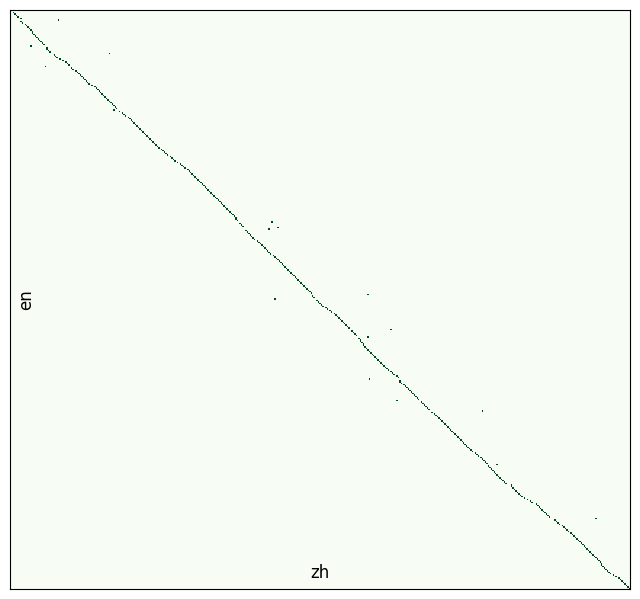

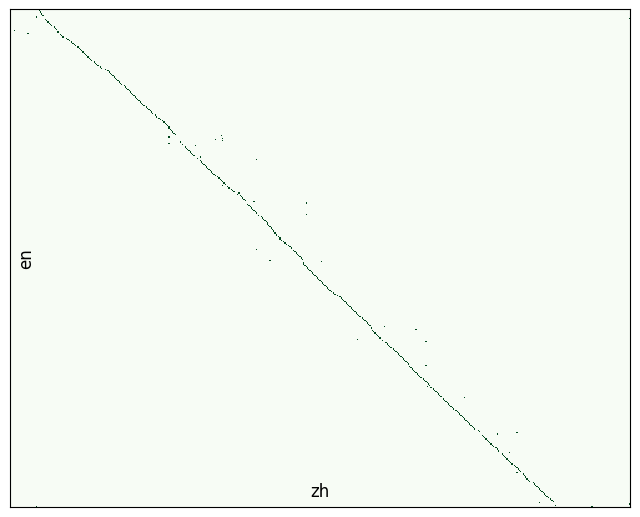

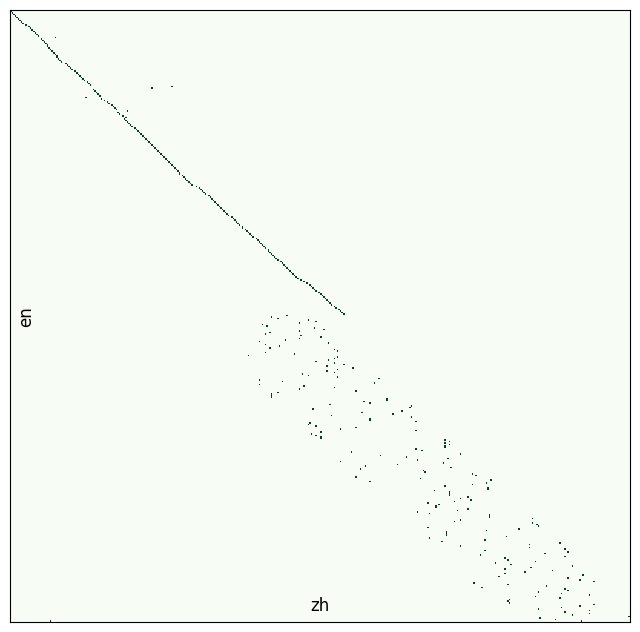

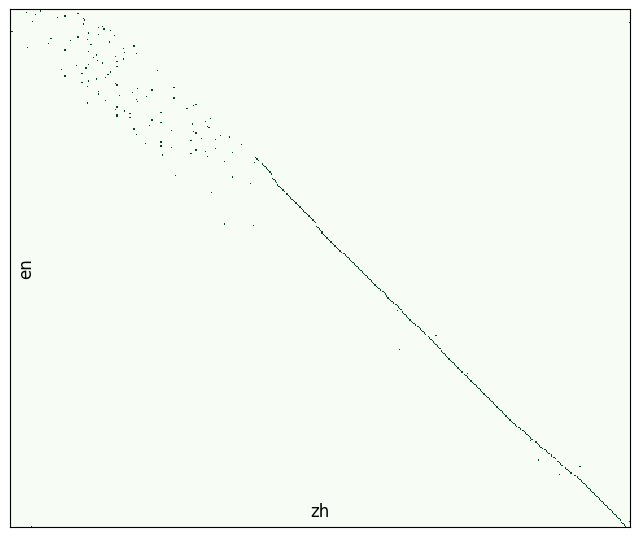

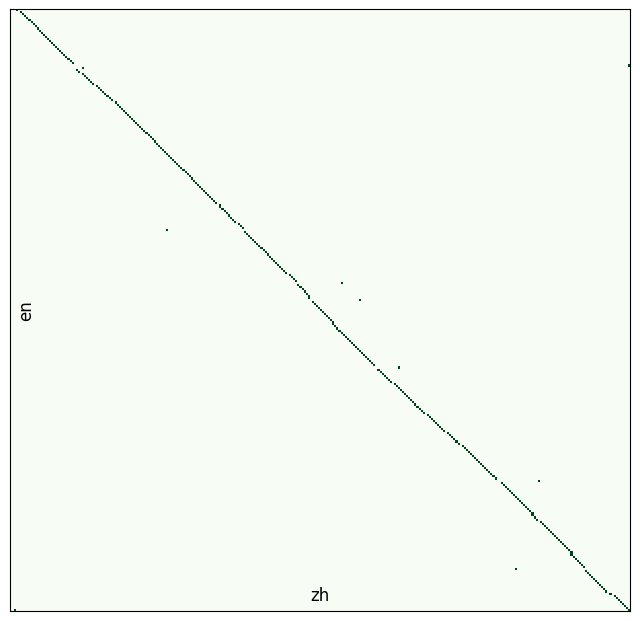

In [126]:
vis_helper.visualize_alignment_by_db(db_path, output_path="alignment_vis.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(800,800), plt_show=True)

Explore the conflicts

In [127]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=6, batch_id=-1)

resolver.get_statistics(conflicts_to_solve)
resolver.get_statistics(rest)

conflicts to solve: 166
total conflicts: 179
('2:3', 68)
('3:3', 22)
('2:1', 18)
('3:2', 11)
('4:3', 9)
('3:5', 7)
('4:5', 5)
('2:4', 5)
('3:4', 4)
('4:4', 4)
('5:6', 3)
('4:2', 2)
('3:6', 2)
('4:6', 2)
('5:2', 2)
('5:4', 1)
('5:3', 1)
('4:7', 3)
('11:9', 1)
('7:5', 1)
('5:9', 1)
('103:53', 1)
('35:74', 1)
('50:-19', 1)
('22:82', 1)
('50:25', 1)
('33:71', 1)
('24:37', 1)


In [128]:
resolver.show_conflict(db_path, conflicts_to_solve[10])

75 “Tomorrow is going to be a good day with this current,” he said.
76 “Where are you going?” the boy asked.


81 看海流的情形，明天准是个好天，他说。
82 明天你要去到哪儿？
83 男孩问。
-----------------------------------------------


Let's resolve all the found conflicts

conflicts to solve: 166
total conflicts: 179


100%|██████████| 166/166 [00:06<00:00, 27.42it/s]


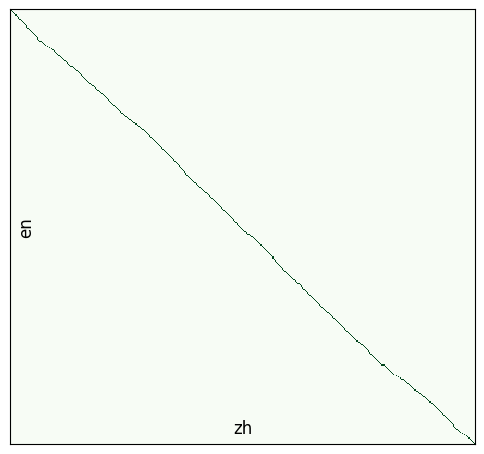

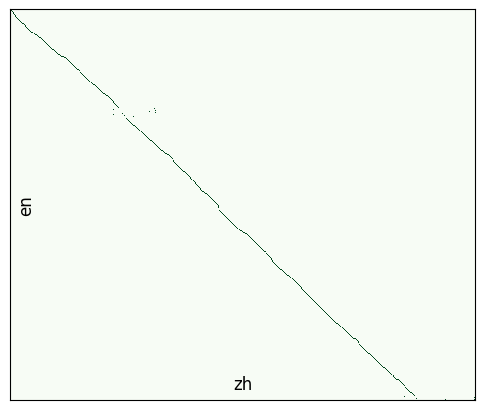

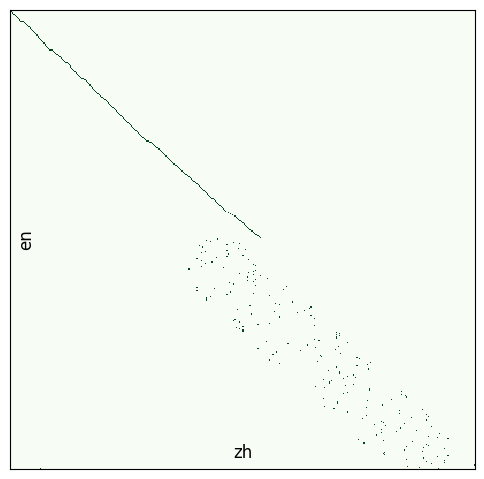

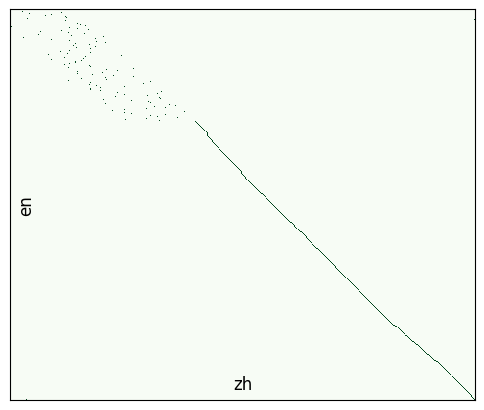

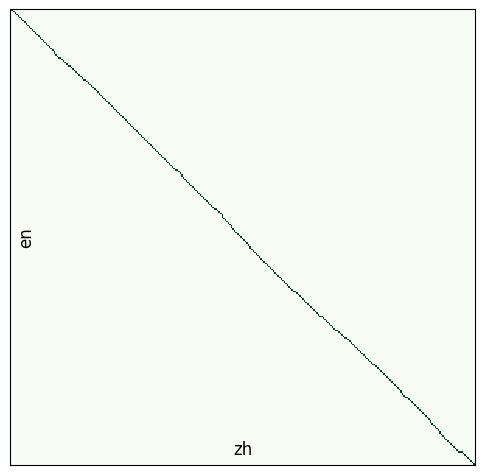

conflicts to solve: 6
total conflicts: 7


100%|██████████| 6/6 [00:00<00:00,  7.38it/s]


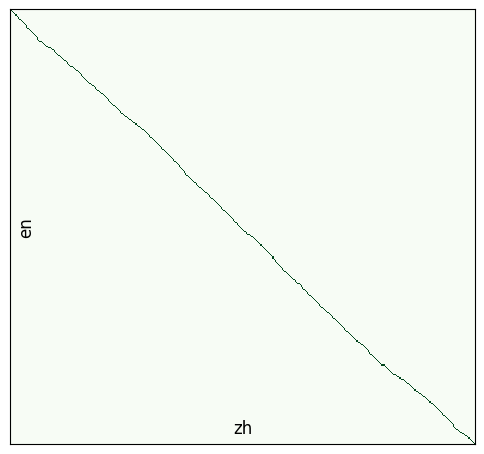

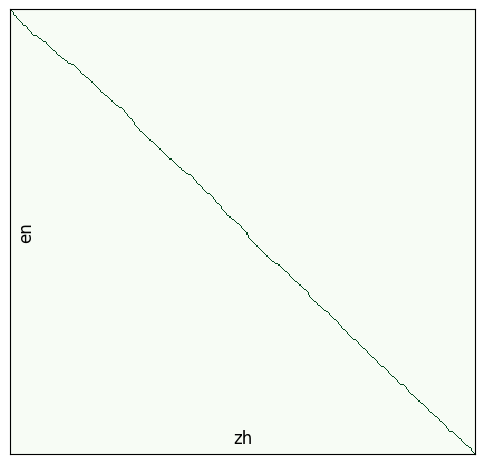

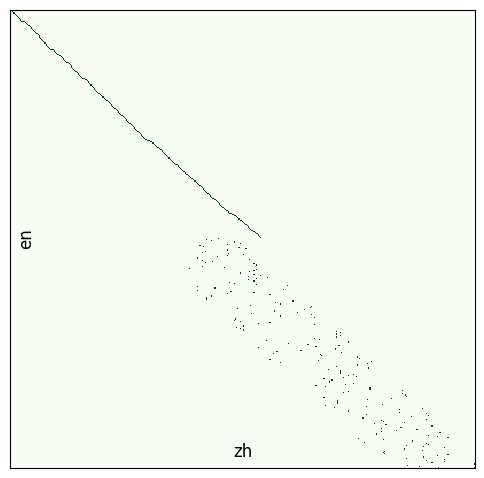

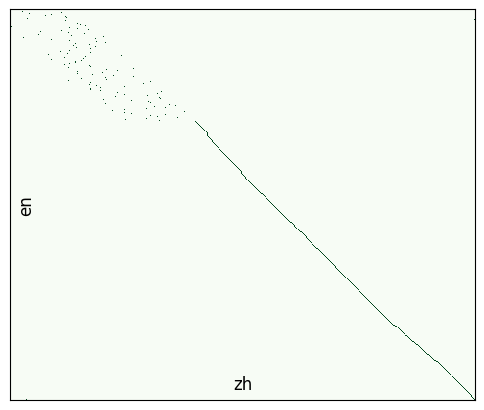

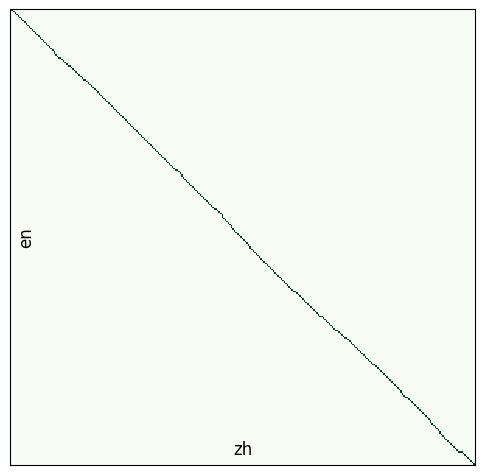

conflicts to solve: 0
total conflicts: 1


0it [00:00, ?it/s]


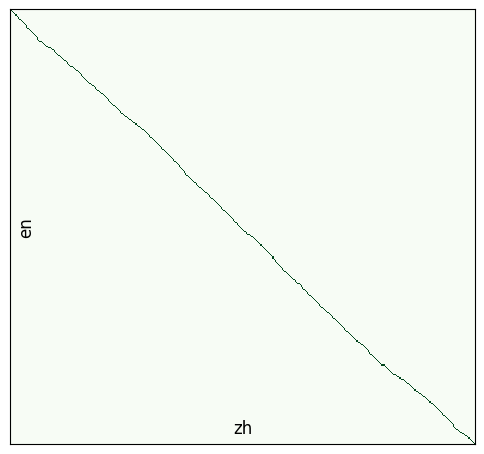

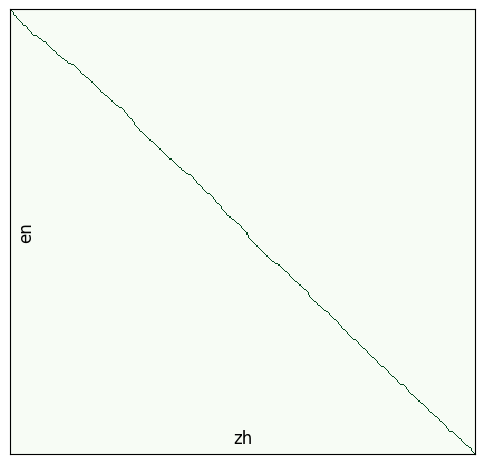

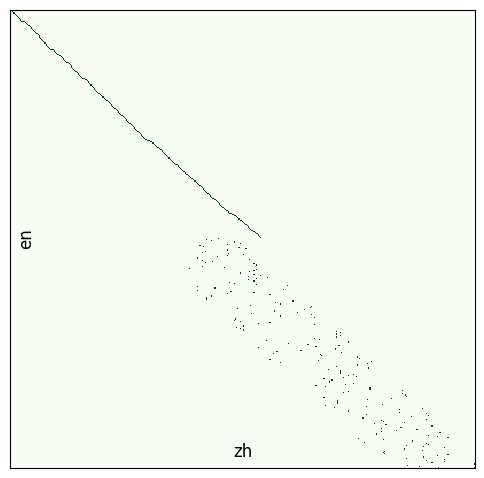

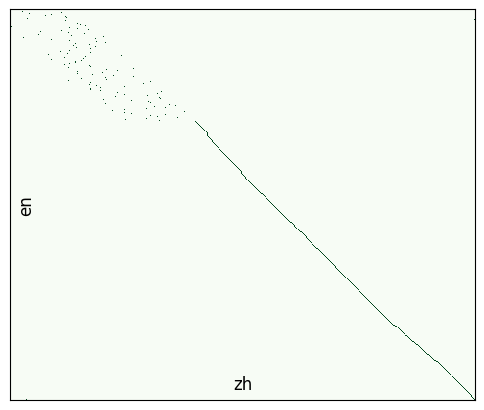

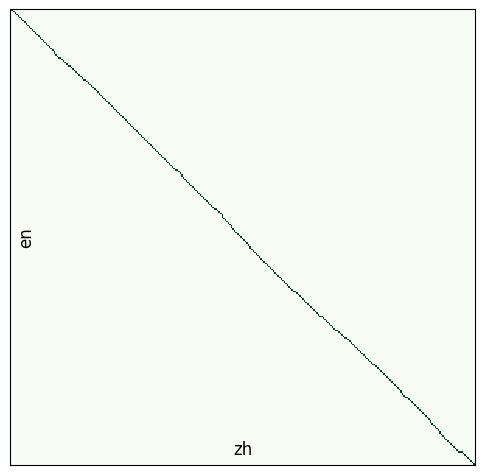

In [129]:
steps = 3
batch_id = -1 #выровнять все доступные батчи

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    vis_helper.visualize_alignment_by_db(db_path, output_path="img_test1.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(600,600), plt_show=True)

    if len(rest) == 0: break

# Parallel book

In [130]:
output_path = "result/harper_lee.html"
paragraphs_from, paragraphs_to, meta = reader.get_paragraphs(db_path)


In [131]:
print(paragraphs_from[9])
print(paragraphs_to[9])

['“If you were my boy I’d take you out and gamble,” he said.', '“But you are your father’s and your mother’s and you are in a lucky boat.”', '“May I get the sardines?', 'I know where I can get four baits too.”', '“I have mine left from today.', 'I put them in salt in the box.”', '“Let me get four fresh ones.”', '“One,” the old man said.', 'His hope and his confidence had never gone.', 'But now they were freshening as when the breeze rises.']
['如果你是我的孩子，我一定会带你出去赌一把，他说。', '可你是你父母的，而且你还跟了一条幸运的船。', '我可以去弄点沙丁鱼吗？', '我还知道从哪儿能弄到四个鱼饵。', '我今天还有剩下的。', '我把它们腌在盒子里。', '让我给你弄四个新鲜的吧。', '一个就好，老人说。', '他的希望和他的自信从未消失。', '不过此刻，它们又重新焕发出来，如同一阵微风吹起。']


Generating the book.

In [132]:
reader.create_book(paragraphs_from, paragraphs_to, meta, output_path, template="simple")

Download the book.

In [133]:
# from google.colab import files

# files.download(output_path)

You can read about the process in more details in the following article.

[How to make a parallel book for language learning. Part 1](https://habr.com/ru/post/586574/)

Thank you. Read the books!



In [134]:
import json
conversation_id = 0
conversations = []
for i in range(len(paragraphs_from)):
    human_text = paragraphs_from[i]
    assistant_text = paragraphs_to[i]
    ht, at = "", ""
    for x in human_text:
      ht += x
    for x in assistant_text:
      at += x

    if assistant_text is None or human_text is None:
        continue
    conversation = {
        "instruction": "请将以下文学文本从中文翻译至英文",
        "input": ht,
        "output": at
    }
    conversations.append(conversation)
    conversation_id += 1

with open("old.jsonl", 'w') as output_file:
    output_file.write("[")
    for conversation in conversations:
        output_file.write(json.dumps(conversation, ensure_ascii=False, indent=True) + ',\n')
    output_file.write("]")

from google.colab import files
files.download("old.jsonl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>